### LEVEL 1: Burst Detection and Population Metrics
        Goals:
                (1) Detect population bursts with RMS-based methods in this sequence:
                        - Bin all spikes into a population firing rate
                        - Smooth to reveal coherent activity
                        - Apply RMS threshold to detect peaks (bursts)
                        - Mark burst windows from rise to fall
                        - Return the smoothed trace, burst peaks, and burst windows
                        - Store time points of start and end indices and peaks of avg (container)
                        - Compute and push burst metrics to DataFrame and CSV/Pickle
                (2) Detect sub-population bursting with unit-wise thresholding (dim and isi methods) 
                        - Map burst classes to 'Sample' column in DataFrame as groups
                        - Compute and store appropriate metrics under each class
                (3) Organize and store the above data for easy import into LEVEL 2 notebook
        

1) Imports

2) Utility functions (Data Management, Integrity Check, etc.)

    def manage_and_save_dataframes(...):
    def reload_dataframes(...):

3) Burst detection & feature computation functions 

4) Plotting functions 

5) Notebook execution workflow:
   
    histogram_data = plot_relative_unit_peak_histograms_grouped_debug(...)

    burst_features_df = compute_burst_features_full(...)

    merged_df = manage_and_save_dataframes(...)

## Plan
Current Style (Combined)

Facet by Dataset
One subplot per dataset, showing its timepoints and treatment status.
Example: 9 datasets → a 3x3 grid of violin plots.
Keeps datasets separate, but allows visual comparison of patterns.

Separate Plots per Dataset
Saves one image per dataset (e.g., 23128c_KOLFMO.png, 23192c_KOLFMO.png, etc.).
Each plot has:
X-axis = Timepoint
Color = Group (Control/Treated)
Y-axis = Burst feature (e.g., BurstRate_per_min)
Zero risk of mixing datasets because each figure is dataset-specific.

functions(metrics, plotting, stats analysis): 
Loop through datasets
Generate violin plots per dataset (one per figure) for the selected burst features
Save them in a folder for easy review

In burst_features_df, each row corresponds to a measurement from one:
Dataset (Dataset column → e.g., "23128c_KOLFMO_D91_175µM_BASELINE_0hr")
Group (Group column → "Control" or "Treated")
Timepoint (Timepoint column → "BASELINE_0hr", "T2_0hr", etc.)
Metric (BurstRate_per_min, MeanBurstDur, etc.)

A dataset, for plotting purposes, is defined by the unique values in the "Dataset" column.
So, for the function:
datasets = burst_features_df["Dataset"].unique() gives all dataset names.
The function loops over these names, creating one figure per dataset.

Inside each figure, we plot:
X-axis = Timepoint
Y-axis = selected metric
Color (hue) = Group (Control vs Treated)
This ensures no pooling across datasets.

Facets vs Separate Figures
Facets: All datasets in one figure, arranged in a grid (like a dashboard).
Useful for comparing datasets visually at a glance.
Separate Figures: Each dataset gets its own PNG file.
Useful for detailed inspection and avoiding visual clutter.



In [39]:
# List all _acqm.zip files that have not been downloaded to ~bioinformatics/data

from burst_analysis.loading import SpikeDataLoader

uuids = [
    "2025-07-05-e-KOLF2.2J_D95_SmitsMidbrain_6OHDA_T2_72hrs/derived/kilosort2",
    "2025-07-27-e-MaxTwo_H9SynGFP_SmitsMidbrain_T2_48hr_72hr_D4_D5_D6/derived/kilosort2",
    "2025-07-27-e-MaxTwo_H9SynGFP_SmitsMidbrain_T2_48hr_72hr_D4_D5_D6/derived/kilosort2",
    "2025-07-27-e-MaxTwo_H9SynGFP_SmitsMidbrain_T2_48hr_72hr_D4_D5_D6/derived/kilosort2",
    "2025-07-27-e-MaxTwo_H9SynGFP_SmitsMidbrain_T2_48hr_72hr_D4_D5_D6/derived/kilosort2",
    "2025-07-27-e-MaxTwo_H9SynGFP_SmitsMidbrain_T2_48hr_72hr_D4_D5_D6/derived/kilosort2",
    "2025-07-27-e-MaxTwo_H9SynGFP_SmitsMidbrain_T2_48hr_72hr_D4_D5_D6/derived/kilosort2",
    "2025-07-27-e-MaxTwo_H9SynGFP_SmitsMidbrain_T2_48hr_72hr_D4_D5_D6/derived/kilosort2",
    "2025-07-27-e-MaxTwo_H9SynGFP_SmitsMidbrain_T2_48hr_72hr_D4_D5_D6/derived/kilosort2",
    "2025-07-27-e-MaxTwo_H9SynGFP_SmitsMidbrain_T2_48hr_72hr_D4_D5_D6/derived/kilosort2",
    "2025-07-27-e-MaxTwo_H9SynGFP_SmitsMidbrain_T2_48hr_72hr_D4_D5_D6/derived/kilosort2"
]

zip_keys = SpikeDataLoader.list_zips_on_s3(uuids)
for key in zip_keys:
    print(key)

KeyboardInterrupt: 

In [54]:
# Download new _acqm.zip files into ~bioinformatics/data

from burst_analysis.loading import SpikeDataLoader
uuids = [
    "2025-07-27-e-MaxTwo_H9SynGFP_SmitsMidbrain_T2_48hr_72hr_D4_D5_D6"
]

SpikeDataLoader.fetch_zips_from_s3(
    uuid_list=uuids,
    local_dir="/Users/main_mac/bioinformatics/data"
)

[DL] ephys/2025-07-27-e-MaxTwo_H9SynGFP_SmitsMidbrain_T2_48hr_72hr_D4_D5_D6/derived/kilosort2/M06943b_H9SynGFP_D45_7272025_6OHDA_T2_48hr_well000_acqm.zip → /Users/main_mac/bioinformatics/data/M06943b_H9SynGFP_D45_7272025_6OHDA_T2_48hr_well000_acqm.zip
[DL] ephys/2025-07-27-e-MaxTwo_H9SynGFP_SmitsMidbrain_T2_48hr_72hr_D4_D5_D6/derived/kilosort2/M06943b_H9SynGFP_D45_7272025_6OHDA_T2_48hr_well001_acqm.zip → /Users/main_mac/bioinformatics/data/M06943b_H9SynGFP_D45_7272025_6OHDA_T2_48hr_well001_acqm.zip


KeyboardInterrupt: 

In [2]:
from pathlib import Path

# Initialize loader with a valid directory
loader = SpikeDataLoader(npz_dir="/Users/main_mac/bioinformatics/data")

# Extract and label files
extracted_files = loader.extract_and_label_zips(
    base_folder=Path("/Users/main_mac/bioinformatics/data"),
    target_subdir="extracted",
    label_parts=(0, 1, 2, 3, 4, 5)
)

# Display extracted file mapping
extracted_files


Renamed qm.npz -> M06943b_H9SynGFP_D45_7272025_6OHDA_T2.npz
Renamed qm.npz -> M06943b_H9SynGFP_D45_7272025_6OHDA_T2.npz
Renamed qm.npz -> M06943b_H9SynGFP_D45_7272025_6OHDA_T2.npz
Renamed qm.npz -> M06943b_H9SynGFP_D45_7272025_6OHDA_T2.npz
Renamed qm.npz -> M06943b_H9SynGFP_D45_7272025_6OHDA_T2.npz
Renamed qm.npz -> M06943b_H9SynGFP_D45_7272025_6OHDA_T2.npz
Extraction complete


{'M06943b_H9SynGFP_D45_7272025_6OHDA_T2': '/Users/main_mac/bioinformatics/data/extracted/M06943b_H9SynGFP_D45_7272025_6OHDA_T2.npz'}

In [3]:
# Extract _acqm.zip files from ~bioinformatics/data into ~bioinformatics/data/extracted/maxone_run1 (run = a collection of samples in round of PD induction)
from pathlib import Path
from burst_analysis.loading import SpikeDataLoader
# Initialize loader
loader = SpikeDataLoader(npz_dir=None)

# Define base folder and target subdirectory
base_folder = Path("bioinformatics/data")

# Run extraction and labeling
extracted_files = loader.extract_and_label_zips(
    base_folder=base_folder,
    target_subdir="extracted",
    label_parts=(0, 1, 2, 3, 4, 5, 6, 7, 8)  # adjust based on filename structure
)

# Display mapping of labels to extracted file paths
extracted_files


No .zip files found in bioinformatics/data


{}

In [56]:
# --- Set up imports and paths ---
import sys
from pathlib import Path
import pandas as pd

# Set the project root so Python can find analysis_libs and others
project_root = Path("~/bioinformatics").expanduser().resolve()
if str(project_root) not in sys.path:
    sys.path.insert(0, str(project_root))

# Define the data directory
data_path = project_root / "data/extracted/maxone_run1"
# Import burst analysis tools
from burst_analysis.loading import SpikeDataLoader
from burst_analysis.detection import BurstDetection
from burst_analysis.plotting import BurstDetectionPlots

In [57]:
# Load 

data_path = Path("~/bioinformatics/data/extracted/maxone_run1").expanduser()
from burst_analysis.loading import SpikeDataLoader
from projects.parkinsons.coordinator import OrchestratorPDx2

orc = OrchestratorPDx2()
print("Datasets loaded:", orc.list_datasets())

Switched to dataset: d0s2_Control
Set d0s2_Control as default dataset.
Datasets loaded: ['d0s2_Control', 'd0s6_Treated', 'd6s2_Control', 'd6s6_Treated']


In [58]:
from projects.parkinsons.coordinator import OrchestratorPDx2
from pathlib import Path

folder = Path("/Users/main_mac/bioinformatics/data/extracted/maxone_run1")
spike_paths = {f.stem: str(f) for f in folder.glob("*.npz")}

orc = OrchestratorPDx2(spike_paths=spike_paths)
print("Datasets loaded:", orc.list_datasets())


Switched to dataset: 24430c_KOLFMO_D92_175µM_T1_24hr
Set '24430c_KOLFMO_D92_175µM_T1_24hr' as default dataset (first available).
Datasets loaded: ['24430c_KOLFMO_D92_175µM_T1_24hr', '24648c_KOLFMO_D86_175µM_T1_D-6', '23178c_KOLFMO_D93_CONTROL_T2_24hr', '23128c_KOLFMO_D92_175µM_T2_0hr', '25168c_KOLFMO_D91_175µM_T1_3hrs', '23128c_KOLFMO_D101_175µM_T2_D10', '25168c_KOLFMO_D86_175µM_T1_D-6', '24430c_KOLFMO_D91_175µM_BASELINE_0hr', '23192c_KOLFMO_D91_175µM_BASELINE_0hr', '23192c_KOLFMO_D98_175µM_T2_D6', '25159c_KOLFMO_D93_CONTROL_T2_24hr', '23128c_KOLFMO_D98_175µM_T2_D6', '24535c_KOLFMO_D92_175µM_T2_0hr', '25168c_KOLFMO_D92_175µM_T1_24hr', '23128c_KOLFMO_D91_175µM_T1_3hrs', '24535c_KOLFMO_D92_175µM_T1_24hr', '24648c_KOLFMO_D98_175µM_T2_D6', '23192c_KOLFMO_D93_175µM_T2_24hr', '23178c_KOLFMO_D101_CONTROL_T2_D10', '24430c_KOLFMO_D92_175µM_T2_0hr', '24648c_KOLFMO_D93_175µM_T2_24hr', '24430c_KOLFMO_D91_175µM_T1_3hrs', '25159c_KOLFMO_D101_CONTROL_T2_D10', '25168c_KOLFMO_D91_175µM_BASELINE_0hr', '

In [59]:
from projects.parkinsons.coordinator import OrchestratorPDx2

orc = OrchestratorPDx2()
print("Orchestrator initialized.")
print("Available dataset keys:", orc.list_datasets())

Switched to dataset: d0s2_Control
Set d0s2_Control as default dataset.
Orchestrator initialized.
Available dataset keys: ['d0s2_Control', 'd0s6_Treated', 'd6s2_Control', 'd6s6_Treated']


In [60]:
datasets = list(orc.spike_data.keys())
print(datasets)

['d0s2_Control', 'd0s6_Treated', 'd6s2_Control', 'd6s6_Treated']


In [61]:
import pandas as pd
import json
from pathlib import Path

csv_path = Path("~/bioinformatics/projects/parkinsons/metrics.csv").expanduser()

def safe_json_load(x):
    """Safely loads JSON strings, returns original if parsing fails."""
    if isinstance(x, str):
        x = x.strip()
        if x.startswith("[") and x.endswith("]"):
            try:
                return json.loads(x)
            except json.JSONDecodeError:
                return x
    return x

# Load existing CSV if available
if csv_path.exists():
    metrics_df = pd.read_csv(csv_path)
    for col in metrics_df.columns:
        if metrics_df[col].dtype == "object":
            metrics_df[col] = metrics_df[col].apply(safe_json_load)
    print(f"Loaded {len(metrics_df)} records from {csv_path}")
else:
    metrics_df = pd.DataFrame()
    print("No saved metrics.csv found — starting fresh.")

Loaded 120 records from /Users/main_mac/bioinformatics/projects/parkinsons/metrics.csv


In [62]:
def append_metrics_record(record):
    global metrics_df

    # Reload CSV if DataFrame empty
    if (metrics_df is None or metrics_df.empty) and csv_path.exists():
        metrics_df = pd.read_csv(csv_path)
        for col in metrics_df.columns:
            if metrics_df[col].dtype == "object":
                metrics_df[col] = metrics_df[col].apply(safe_json_load)

    # Append record
    new_df = pd.DataFrame([record])
    metrics_df = pd.concat([metrics_df, new_df], ignore_index=True)

    # Convert lists to JSON before saving
    df_to_save = metrics_df.copy()
    for col in ["peak_times", "burst_windows"]:
        if col in df_to_save.columns:
            df_to_save[col] = df_to_save[col].apply(lambda x: json.dumps(x) if isinstance(x, (list, tuple)) else x)

    df_to_save.to_csv(csv_path, index=False)
    print(f"Saved {len(metrics_df)} total records to {csv_path}")

In [51]:
# burst features dataframe - adding a sample id column to make UI better 

if 'SampleID' not in burst_features_df.columns:
    burst_features_df['SampleID'] = burst_features_df['Dataset'].str.split('_').str[0]

burst_features_df


Dataset                                 Group    Timepoint      BurstRate_per_min  MeanBurstDur  StdBurstDur  SkewBurstDur  KurtBurstDur  IBI_mean  IBI_std   IBI_CV    IBI_skew  IBI_kurt   BPI  FanoFactor  Entropy_RelPeaks  PeakSpread  MeanLeadWidth  MeanLagWidth  MeanTotalWidth  SkewHistRelPeaks  KurtHistRelPeaks DatasetShort SampleID
0     23128c_KOLFMO_D91_175µM_BASELINE_0hr  Treated  BASELINE_0hr  31.708258          0.233168      0.097144      1.223850       1.223253    1.889844  1.020082  0.539770  2.560212   9.914032  1.0   74.725201  -66.047277        606.640     0.113478       0.119689      0.233168       NaN               NaN                23128c       23128c 
1           23128c_KOLFMO_D92_175µM_T2_0hr  Treated        T2_0hr  23.460313          0.245106      0.203417      2.384797       7.211131    2.488500  1.883243  0.756779  1.719860   3.073204  1.0  313.720830  -30.430281        597.240     0.126245       0.118862      0.245106       NaN               NaN                23128c       23128c 
2          23128c_KOLFMO_D93_175µM_T2_24hr  Treated       T2_24hr  25.883763          0.277889      0.186427      1.549737       3.189574    2.277810  1.549116  0.680090  1.595936   3.414887  1.0  150.944836  -28.625504        624.120     0.130241       0.147648      0.277889       NaN               NaN                23128c       23128c 
3            23128c_KOLFMO_D98_175µM_T2_D6  Treated         T2_D6  47.147600          0.099603      0.047239      1.826903       3.816392    1.273608  0.427283  0.335490  1.719155   4.903047  1.0   21.953042 -207.659300        672.465     0.048299       0.051304      0.099603       NaN               NaN                23128c       23128c 
4     23192c_KOLFMO_D91_175µM_BASELINE_0hr  Treated  BASELINE_0hr  37.268315          0.193280      0.093221      3.858229      25.754711    1.602513  0.812427  0.506970  2.468172  10.641052  1.0   21.754952  -42.780577        602.545     0.082887       0.110393      0.193280       NaN               NaN                23192c       23192c 
5           23192c_KOLFMO_D92_175µM_T2_0hr  Treated        T2_0hr  33.915294          0.107471      0.103173     11.944088     182.263309    1.753971  1.511529  0.861776  3.393789  15.317727  1.0   24.072808  -33.582688        605.120     0.054608       0.052863      0.107471       NaN               NaN                23192c       23192c 
6          23192c_KOLFMO_D93_175µM_T2_24hr  Treated       T2_24hr  34.856720          0.100860      0.047834      2.084297       7.458572    1.718649  1.282282  0.746098  2.254498   5.392399  1.0    5.079472 -203.671858        598.090     0.049742       0.051117      0.100860       NaN               NaN                23192c       23192c 
7            23192c_KOLFMO_D98_175µM_T2_D6  Treated         T2_D6  51.228593          0.079758      0.047400      8.148071     103.058636    1.169564  0.481467  0.411664  4.293760  33.380552  1.0    8.449715  -97.768550        603.495     0.040480       0.039278      0.079758       NaN               NaN                23192c       23192c 
8     24430c_KOLFMO_D91_175µM_BASELINE_0hr  Treated  BASELINE_0hr  40.760937          0.180368      0.084175      1.527083       2.891877    1.473489  0.598955  0.406488  0.957529   0.655801  1.0   31.200684  -79.454314        599.710     0.085490       0.094877      0.180368       NaN               NaN                24430c       24430c 
9           24430c_KOLFMO_D92_175µM_T2_0hr  Treated        T2_0hr  23.604206          0.256920      0.139655      1.141777       1.566574    2.534640  1.774370  0.700048  1.740088   3.423510  1.0   28.468491  -48.826361        598.175     0.130084       0.126835      0.256920       NaN               NaN                24430c       24430c 
10         24430c_KOLFMO_D93_175µM_T2_24hr  Treated       T2_24hr  26.052802          0.243931      0.133997      1.574937       5.463487    2.295611  1.514858  0.659893  1.806065   4.056342  1.0   25.754889  -34.420024        601.450     0.119485     

In [ ]:
'''Data Management - cell organize, save, and reload DataFrames while avoiding duplication or data loss'''

import pandas as pd
import os

def manage_and_save_dataframes(
    burst_features_df=None,
    histogram_data_df=None,
    burst_config_df=None,
    save_dir="data_exports"
):
    """
    Steps:
      Drop duplicates from each dataframe
      Save to CSV files in a dedicated folder
      Optionally merge burst_features with configs on ['Dataset','ConfigID']
      Provide reload functions for future notebook sessions
    """
    
    # --- Ensure save directory exists ---
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    
    # --- Clean duplicates ---
    def clean_df(df):
        if df is not None:
            return df.drop_duplicates().reset_index(drop=True)
        return None
    
    burst_features_df = clean_df(burst_features_df)
    histogram_data_df = clean_df(histogram_data_df)
    burst_config_df = clean_df(burst_config_df)

    # --- Save each dataframe ---
    if burst_features_df is not None:
        burst_features_path = os.path.join(save_dir, "burst_features.csv")
        burst_features_df.to_csv(burst_features_path, index=False)
        print(f"Saved burst features to {burst_features_path} ({len(burst_features_df)} rows)")
    
    if histogram_data_df is not None:
        histogram_path = os.path.join(save_dir, "histogram_data.csv")
        histogram_data_df.to_csv(histogram_path, index=False)
        print(f"Saved histogram data to {histogram_path} ({len(histogram_data_df)} rows)")
    
    if burst_config_df is not None:
        config_path = os.path.join(save_dir, "burst_configurations.csv")
        burst_config_df.to_csv(config_path, index=False)
        print(f"Saved burst configurations to {config_path} ({len(burst_config_df)} rows)")

    # --- Merge features with config if both exist ---
    merged_df = None
    if burst_features_df is not None and burst_config_df is not None:
        merge_keys = ["Dataset", "ConfigID"] if "ConfigID" in burst_config_df.columns else ["Dataset"]
        merged_df = pd.merge(
            burst_features_df,
            burst_config_df,
            on=merge_keys,
            how="left"
        )
        merged_path = os.path.join(save_dir, "merged_burst_features.csv")
        merged_df.to_csv(merged_path, index=False)
        print(f"Saved merged dataframe to {merged_path} ({len(merged_df)} rows)")

    print("All dataframes saved successfully. Use reload_dataframes() to reload them later.")
    
    return merged_df


def reload_dataframes(save_dir="data_exports"):
    """
    Reloads previously saved DataFrames and returns them as a dictionary.
    """
    data = {}
    file_map = {
        "burst_features": "burst_features.csv",
        "histogram_data": "histogram_data.csv",
        "burst_configurations": "burst_configurations.csv",
        "merged": "merged_burst_features.csv"
    }
    for key, fname in file_map.items():
        path = os.path.join(save_dir, fname)
        if os.path.exists(path):
            data[key] = pd.read_csv(path)
            print(f"Loaded {key} ({len(data[key])} rows)")
        else:
            print(f"Missing file: {fname}")
    return data

# Save everything 
merged_df = manage_and_save_dataframes(
    burst_features_df=burst_features_df,
    histogram_data_df=relative_peak_stats_df,  # or histogram df
    burst_config_df=burst_config_df
)

# Reload in a future session
dataframes = reload_dataframes()
burst_features_df = dataframes.get("burst_features")
merged_df = dataframes.get("merged")

'''
Prevents overwriting by saving each table separately.
Automatically drops duplicates before saving.
Merges config info into burst features for easy plotting.
reload without recomputing everything.
Keeps data organized in /data_exports.
'''

In [ ]:
import pandas as pd

def integrity_check_dataframes(main_df=None, burst_df=None, histogram_df=None):
    """
    Detects duplicates (Dataset IDs repeated)
    Warns if some SampleIDs have fewer timepoints than others (possible missing recordings)
    Cross-checks consistency between histogram and burst features dataframes
    Flags redundant rows that could skew plots or stats
    Produces a clean report (passed / issues found)

    Performs integrity checks across multiple dataframes to ensure:
    - No duplicate Dataset IDs
    - No missing timepoints within each SampleID
    - Consistency of SampleIDs across different dataframes
    - No redundant rows that could bias plots or stats
    """

    issues = []

    # --- Check duplicates within each dataframe ---
    for name, df in {
        "Main DF": main_df,
        "Burst Features DF": burst_df,
        "Histogram DF": histogram_df
    }.items():
        if df is not None:
            dupes = df[df.duplicated(subset=["Dataset"])]
            if not dupes.empty:
                issues.append(f"{name} contains {len(dupes)} duplicate Dataset entries.")
            else:
                print(f"No duplicate Dataset IDs found in {name}")

    # --- Check for missing timepoints per SampleID ---
    if main_df is not None and "SampleID" in main_df.columns and "Timepoint" in main_df.columns:
        timepoint_counts = main_df.groupby("SampleID")["Timepoint"].nunique()
        missing_tp = timepoint_counts[timepoint_counts < timepoint_counts.max()]
        if not missing_tp.empty:
            issues.append(f"Some SampleIDs have fewer timepoints: {missing_tp.to_dict()}")
        else:
            print("All SampleIDs have consistent timepoints in Main DF")

    # --- Cross-reference SampleIDs between dataframes ---
    if burst_df is not None and histogram_df is not None:
        burst_ids = set(burst_df["SampleID"].unique())
        hist_ids = set(histogram_df["SampleID"].unique())
        missing_in_burst = hist_ids - burst_ids
        missing_in_hist = burst_ids - hist_ids
        if missing_in_burst:
            issues.append(f" {len(missing_in_burst)} SampleIDs are in Histogram DF but missing in Burst Features DF: {missing_in_burst}")
        if missing_in_hist:
            issues.append(f" {len(missing_in_hist)} SampleIDs are in Burst Features DF but missing in Histogram DF: {missing_in_hist}")
        if not missing_in_burst and not missing_in_hist:
            print("SampleIDs match between Burst Features and Histogram DF")

    # --- Check redundant rows (Dataset + Timepoint duplicates) ---
    for name, df in {
        "Main DF": main_df,
        "Burst Features DF": burst_df,
        "Histogram DF": histogram_df
    }.items():
        if df is not None and {"Dataset", "Timepoint"} <= set(df.columns):
            redund = df[df.duplicated(subset=["Dataset", "Timepoint"])]
            if not redund.empty:
                issues.append(f"{name} has redundant rows for the same Dataset/Timepoint combination.")

    print("\n=== Integrity Check Report ===")
    if issues:
        for issue in issues:
            print(issue)
    else:
        print("All checks passed. Dataframes appear consistent and ready for analysis.")

# example run (replace these with your actual dataframe variables if named differently)
integrity_check_dataframes(
    main_df=burst_features_df,
    burst_df=burst_features_df,
    histogram_df=histogram_data if isinstance(histogram_data, pd.DataFrame) else None
)

In [63]:
from projects.parkinsons.coordinator import OrchestratorPDx2
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import VBox, HBox, FloatSlider, IntSlider, Dropdown, Button, Output

spike_path = Path("~/bioinformatics/data/extracted//maxone_run1").expanduser()
orc = OrchestratorPDx2(spike_path)

bin_size_ms_slider = FloatSlider(value=10, min=1, max=20, step=1, description="BinSize (ms)")
threshold_slider = FloatSlider(min=1, max=5, step=0.1, value=3.0, description="RMSThresh")
edge_slider = FloatSlider(min=0.05, max=0.5, step=0.01, value=0.1, description="EdgeThresh")
gauss_slider = IntSlider(min=1, max=200, step=2, value=100, description="Gaussian")
square_slider = IntSlider(min=1, max=100, step=2, value=20, description="Square")
min_dist_slider = IntSlider(min=100, max=5000, step=50, value=300, description="MinDist")
time_start_slider = IntSlider(min=0, max=1800, step=10, value=0, description="Start(s)")
window_slider = IntSlider(min=10, max=510, step=5, value=120, description="Duration(s)")

dataset_dropdown = Dropdown(options=orc.list_datasets(), value=orc.list_datasets()[2], description='Dataset:')
run_button = Button(description="Update Plot", button_style="success")
out = Output()


Switched to dataset: 23128c_KOLFMO_D101_175µM_T2_D10
Set '23128c_KOLFMO_D101_175µM_T2_D10' as default dataset (first available).


In [64]:
def update_plot(change=None):
    with out:
        out.clear_output()
        try:
            plt.close('all')

            dataset = dataset_dropdown.value
            time_start = time_start_slider.value
            time_window = window_slider.value

            config = {
                "bin_size_ms": bin_size_ms_slider.value,
                "threshold_rms": threshold_slider.value,
                "burst_edge_fraction": edge_slider.value,
                "gauss_win_ms": gauss_slider.value,
                "square_win_ms": square_slider.value,
                "min_dist_ms": min_dist_slider.value,
                "time_start": time_start,
                "time_window": time_window
            }

            time_range = (time_start, time_start + time_window)

            print(f"Selected dataset: {dataset}")
            print(f"Time range: {time_range}")
            print(f"Config: {config}")

            # Run orchestrator
            orc.compute_and_plot_population_bursts(
                dataset_keys=[dataset],
                config=config,
                time_range=time_range,
                save=False
            )

            latest_df = orc.burst_detection_metrics_df
            if latest_df.empty:
                print("No metrics generated.")
                return

            # === Take the full transient row ===
            latest = latest_df[latest_df["Sample"] == dataset].iloc[-1].to_dict()

            if latest.get("duration_s", 0) == 0:
                print("No spikes in selected time window. Try another dataset.")
                return

            # Print key burst summary
            print(f"\nBurst Extraction Summary — {dataset}")
            print(f"Recording duration: {latest['duration_s']:.2f} s")
            print(f"Total spikes: {latest['n_total_spikes']}")
            print(f"Number of neurons: {latest['n_neurons']}")
            print(f"Mean firing rate per neuron: {latest['mean_rate_per_neuron']:.2f} Hz")
            if latest["n_total_bursts"] > 0:
                print(f"Bursts detected: {latest['n_total_bursts']}")
                print(f"Mean burst duration: {latest['mean_burst_dur']:.3f} s")
                print(f"Std of burst durations: {latest['std_burst_dur']:.3f} s")
                print(f"Burst rate: {latest['burst_rate_per_min']:.2f} bursts/min")
                if latest["mean_IBI"]:
                    print(f"Mean inter-burst interval (IBI): {latest['mean_IBI']:.2f} s")

            # Merge transient metrics and config
            record = {**latest, **config, "Sample": dataset}

            # Find match
            global metrics_df
            match_idx = None
            for idx, existing in metrics_df.iterrows():
                if all(existing.get(k) == record[k] for k in ["Sample", "bin_size_ms", "threshold_rms", 
                                                               "burst_edge_fraction", "gauss_win_ms", 
                                                               "square_win_ms", "min_dist_ms", 
                                                               "time_start", "time_window"]):
                    match_idx = idx
                    break

            if match_idx is not None:
                metrics_df.loc[match_idx] = record
                print("Updated existing record.")
            else:
                append_metrics_record(record)
                print("Added new record.")

        except Exception as e:
            import traceback
            traceback.print_exc()
            print(f"Error during update_plot: {e}")

# Hook up the run button
run_button.on_click(update_plot)

ui = VBox([
    HBox([dataset_dropdown, run_button]),
    HBox([bin_size_ms_slider, threshold_slider, edge_slider]),
    HBox([gauss_slider, square_slider, min_dist_slider]),
    HBox([time_start_slider, window_slider]),
    out
])
display(ui)

In [65]:
import pandas as pd

pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', None)     # Show all rows
pd.set_option('display.width', 1000)        # Expand display width
pd.set_option('display.colheader_justify', 'left')  # Align headers left

print(metrics_df.to_string())


    Sample                                   bin_size_ms  threshold_rms  burst_edge_fraction  gauss_win_ms  square_win_ms  min_dist_ms  time_start  time_window  total_spikes  duration_s  n_neurons  mean_rate_per_neuron  n_bursts  mean_burst_duration  std_burst_duration  burst_rate_per_min  mean_ibi  peak_times                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

In [67]:
import pandas as pd

df_check = pd.read_csv(csv_path)
print("Columns in saved CSV:", df_check.columns.tolist())
print("Last saved row:")
display(df_check.tail(1).T)


Columns in saved CSV: ['Sample', 'bin_size_ms', 'threshold_rms', 'burst_edge_fraction', 'gauss_win_ms', 'square_win_ms', 'min_dist_ms', 'time_start', 'time_window', 'total_spikes', 'duration_s', 'n_neurons', 'mean_rate_per_neuron', 'n_bursts', 'mean_burst_duration', 'std_burst_duration', 'burst_rate_per_min', 'mean_ibi', 'peak_times', 'burst_windows', 'n_total_spikes', 'n_total_bursts', 'mean_burst_dur', 'std_burst_dur', 'mean_IBI', 'n_pop_bursts_window', 'avg_peakFR_per_unit_window', 'avg_peakFR_per_unit_bin', 'n_bursts_at_time_0', 'mean_peakFR_at_time_0', 'std_peakFR_at_time_0', 'mean_burst_duration_at_time_0', 'std_burst_duration_at_time_0', 'mean_width_lead', 'std_width_lead', 'mean_width_lag', 'std_width_lag', 'mean_total_width', 'dataset_key']
Last saved row:


119                                               
Sample                                         25168c_KOLFMO_D92_CONTROL_T1_24hr
bin_size_ms                                                                  5.0
threshold_rms                                                                1.7
burst_edge_fraction                                                          0.5
gauss_win_ms                                                                17.0
square_win_ms                                                                5.0
min_dist_ms                                                               1950.0
time_start                                                                   0.0
time_window                                                                 45.0
total_spikes                                                                 NaN
duration_s                                                               600.985
n_neurons                                                                  310.0
mean_rate_per_neuron                                                    2.941123
n_bursts                                                                     NaN
mean_burst_duration                                                          NaN
std_burst_duration                                                           NaN
burst_rate_per_min                                                     14.376399
mean_ibi                                                                     NaN
peak_times                     [1.28, 6.79, 9.965, 12.98, 15.0, 18.195, 21.49...
burst_windows                  [[1.105, 1.56], [6.51, 6.92], [9.88, 10.185], ...
n_total_spikes                                                          547947.0
n_total_bursts                                                             144.0
mean_burst_dur                                                          0.403576
std_burst_dur                                                           0.153819
mean_IBI                                                                4.191678
n_pop_bursts_window                                                         11.0
avg_peakFR_per_unit_window                                            213.114754
avg_peakFR_per_unit_bin                                               213.114754
n_bursts_at_time_0                                                          11.0
mean_peakFR_at_time_0                                                  10.407208
std_peakFR_at_time_0                                                    1.608208
mean_burst_duration_at_time_0                                           0.354545
std_burst_duration_at_time_0                                            0.144276
mean_width_lead                                                         0.142273
std_width_lead                                                          0.105494
mean_width_lag                                                          0.212273
std_width_lag                                                           0.123332
mean_total_width                                                        0.354545
dataset_key                                                                  NaN

In [68]:
import csv

filepath = "Users/main_mac/bioinformatics/projects/parkinsons/metrics.csv"
def load_csv(filepath):
    """Load a CSV file into a list of rows (each row is a list of values)."""
    with open(filepath, newline='', encoding='utf-8') as f:
        reader = csv.reader(f)
        data = list(reader)
    return data
def print_csv(data):
    """Print CSV data as a full table with proper spacing for all columns."""
    # Calculate column widths
    col_widths = [max(len(str(item)) for item in col) for col in zip(*data)]

    # Print each row with spacing
    for row in data:
        print(" | ".join(str(item).ljust(width) for item, width in zip(row, col_widths)))

data = load_csv(csv_path)
print_csv(data)

Sample                                 | bin_size_ms        | threshold_rms | burst_edge_fraction | gauss_win_ms | square_win_ms | min_dist_ms | time_start | time_window | total_spikes | duration_s         | n_neurons | mean_rate_per_neuron | n_bursts | mean_burst_duration | std_burst_duration | burst_rate_per_min | mean_ibi           | peak_times                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

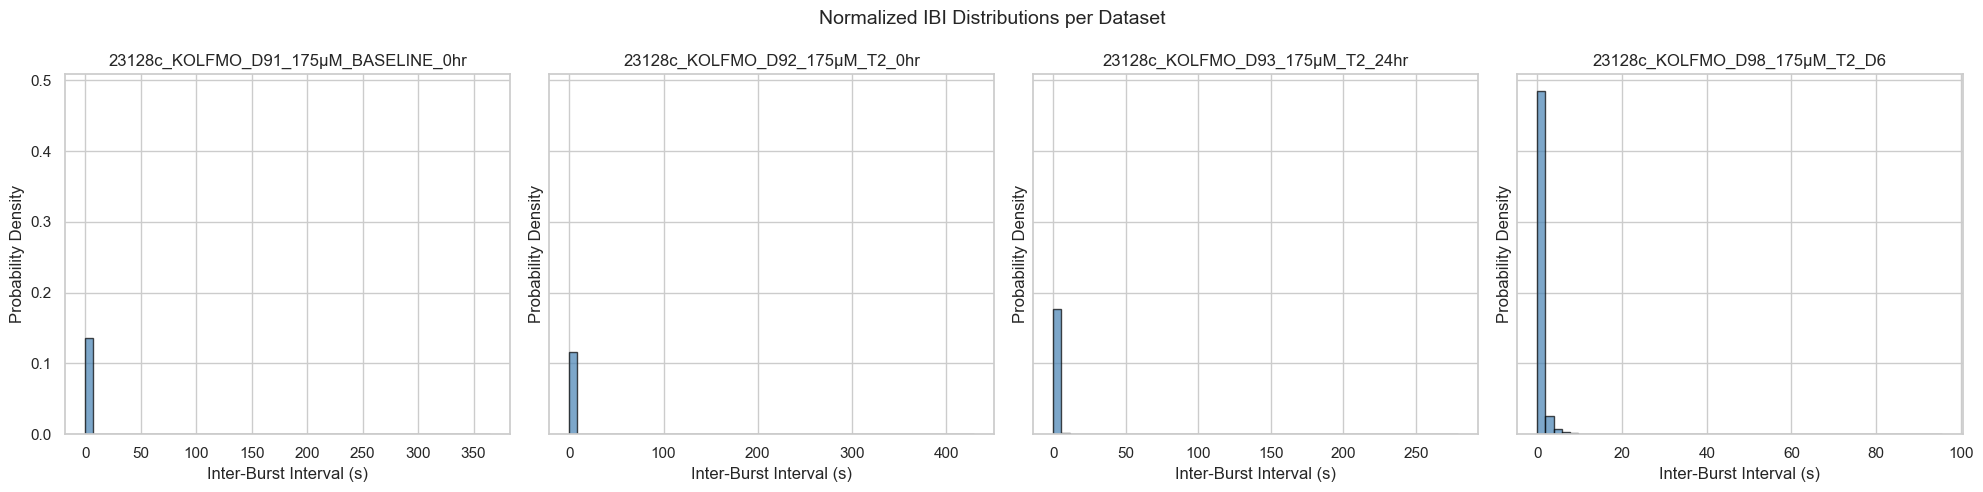

In [69]:
import numpy as np
import matplotlib.pyplot as plt

# ---------------------------
# Config
# ---------------------------
config = {
    "bin_size_ms": 5.0,
    "threshold_rms": 1.7,
    "burst_edge_fraction": 0.5,
    "gauss_win_ms": 17.0,
    "square_win_ms": 5.0,
    "min_dist": 1950.0
}

datasets_to_plot = [
    "23128c_KOLFMO_D91_175µM_BASELINE_0hr",
    "23128c_KOLFMO_D92_175µM_T2_0hr",
    "23128c_KOLFMO_D93_175µM_T2_24hr",
    "23128c_KOLFMO_D98_175µM_T2_D6"
]

# ---------------------------
# Functions
# ---------------------------
def compute_ibi(spike_trains):
    """
    Compute inter-burst intervals (IBIs) from multiple neurons within a dataset.
    Parameters
    ----------
    spike_trains : list of arrays
        Each element is an array of spike times (in seconds) for a single neuron.
    Returns
    -------
    all_ibis : np.ndarray
        Flattened array of all IBIs (s) computed across neurons.
    """
    all_ibis = []
    for spikes in spike_trains:
        spikes = np.sort(np.array(spikes))
        if len(spikes) > 1:
            ibis = np.diff(spikes)
            ibis = ibis[ibis > 0]  # exclude zero or negative intervals
            all_ibis.extend(ibis)
    return np.array(all_ibis)

def plot_adjacent_ibi_distributions(dataset_names, orc, bins=50):
    """
    Computes and plots adjacent IBI distributions (one subplot per dataset).
    """
    num_datasets = len(dataset_names)
    fig, axes = plt.subplots(1, num_datasets, figsize=(5 * num_datasets, 5), sharey=True)

    # Ensure axes is iterable even for a single dataset
    if num_datasets == 1:
        axes = [axes]

    for ax, name in zip(axes, dataset_names):
        spike_trains = orc.spike_data[name].train
        ibis = compute_ibi(spike_trains)

        if len(ibis) == 0:
            ax.set_title(f"{name}\n(No IBIs)")
            ax.set_xlabel("Inter-Burst Interval (s)")
            ax.set_ylabel("Probability Density")
            continue

        ax.hist(ibis, bins=bins, density=True, alpha=0.7, color='steelblue', edgecolor='black')
        ax.set_title(name)
        ax.set_xlabel("Inter-Burst Interval (s)")
        ax.set_ylabel("Probability Density")

    plt.suptitle("Normalized IBI Distributions per Dataset", fontsize=14)
    plt.tight_layout()
    plt.show()


# ---------------------------
# Call plotting function
# ---------------------------
plot_adjacent_ibi_distributions(datasets_to_plot, orc, bins=50)


/var/folders/5b/0knmz8lj0x91l7symv3p4q2m0000gn/T/ipykernel_20616/265589484.py:46: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(ibi_data, labels=labels, showfliers=False)


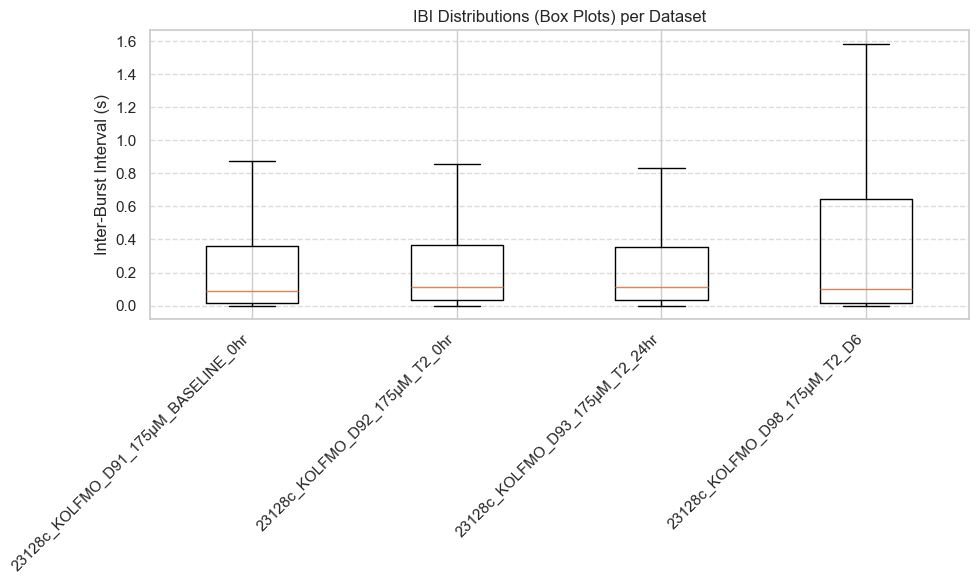

In [70]:
import numpy as np
import matplotlib.pyplot as plt

# ---------------------------
# Config
# ---------------------------
config = {
    "bin_size_ms": 5.0,
    "threshold_rms": 1.7,
    "burst_edge_fraction": 0.5,
    "gauss_win_ms": 17.0,
    "square_win_ms": 5.0,
    "min_dist": 1950.0
}

datasets_to_plot = [
    "23128c_KOLFMO_D91_175µM_BASELINE_0hr",
    "23128c_KOLFMO_D92_175µM_T2_0hr",
    "23128c_KOLFMO_D93_175µM_T2_24hr",
    "23128c_KOLFMO_D98_175µM_T2_D6"
]

# ---------------------------
# Box plot function
# ---------------------------
def plot_ibi_boxplots(dataset_names, orc):
    """
    Computes and plots IBI box plots for multiple datasets.
    Each dataset's IBIs are shown as a separate box.
    """
    ibi_data = []
    labels = []

    for name in dataset_names:
        spike_trains = orc.spike_data[name].train
        ibis = compute_ibi(spike_trains)

        if len(ibis) == 0:
            print(f"Warning: No IBIs found for dataset {name}")
            ibis = [np.nan]  # Placeholder for empty dataset

        ibi_data.append(ibis)
        labels.append(name)

    plt.figure(figsize=(10, 6))
    plt.boxplot(ibi_data, labels=labels, showfliers=False)
    plt.title("IBI Distributions (Box Plots) per Dataset")
    plt.ylabel("Inter-Burst Interval (s)")
    plt.xticks(rotation=45, ha='right')
    plt.grid(True, axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# ---------------------------
# Call function
# ---------------------------
plot_ibi_boxplots(datasets_to_plot, orc)


/var/folders/5b/0knmz8lj0x91l7symv3p4q2m0000gn/T/ipykernel_20616/3537207982.py:53: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(


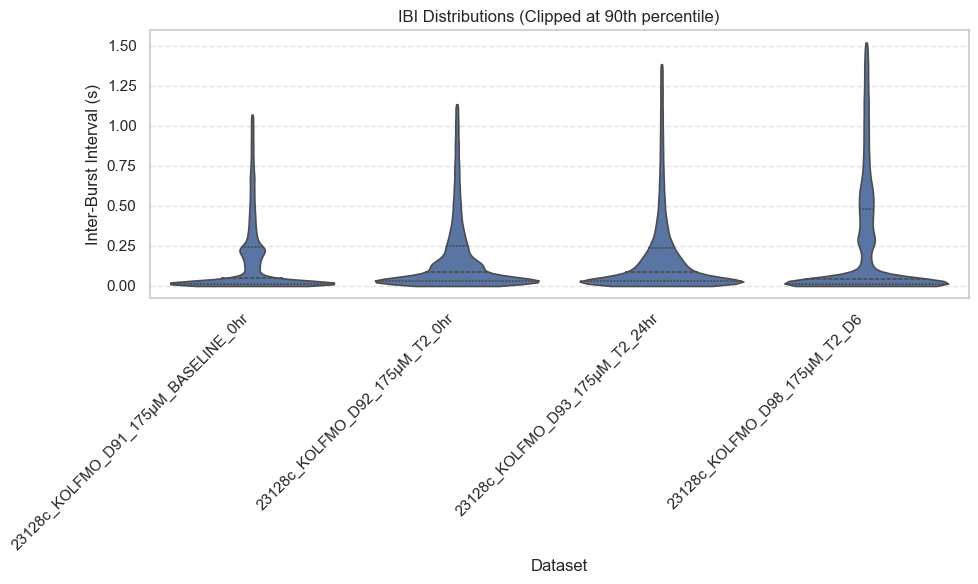

In [71]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# ---------------------------
# Config
# ---------------------------
config = {
    "bin_size_ms": 5.0,
    "threshold_rms": 1.7,
    "burst_edge_fraction": 0.5,
    "gauss_win_ms": 17.0,
    "square_win_ms": 5.0,
    "min_dist": 1950.0
}

datasets_to_plot = [
    "23128c_KOLFMO_D91_175µM_BASELINE_0hr",
    "23128c_KOLFMO_D92_175µM_T2_0hr",
    "23128c_KOLFMO_D93_175µM_T2_24hr",
    "23128c_KOLFMO_D98_175µM_T2_D6"
]

# ---------------------------
# Violin plot with clipping
# ---------------------------
def plot_ibi_violinplots_clipped(dataset_names, orc, clip_percentile=80):
    """
    Computes and plots IBI violin plots for multiple datasets using seaborn.
    Clips outlier IBIs above the specified percentile to avoid axis compression.
    """
    data = []

    for name in dataset_names:
        spike_trains = orc.spike_data[name].train
        ibis = compute_ibi(spike_trains)

        if len(ibis) > 0:
            threshold = np.percentile(ibis, clip_percentile)
            ibis_clipped = ibis[ibis <= threshold]
            data.extend([(name, val) for val in ibis_clipped])
        else:
            print(f"Warning: No IBIs found for dataset {name}")

    if not data:
        print("No IBI data available for plotting.")
        return

    df = pd.DataFrame(data, columns=["Dataset", "IBI (s)"])

    plt.figure(figsize=(10, 6))
    sns.violinplot(
        x="Dataset", 
        y="IBI (s)", 
        data=df, 
        scale="width", 
        cut=0, 
        inner="quartile",
        linewidth=1.2
    )
    plt.title(f"IBI Distributions (Clipped at {clip_percentile}th percentile)")
    plt.xticks(rotation=45, ha='right')
    plt.ylabel("Inter-Burst Interval (s)")
    plt.grid(True, axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

# ---------------------------
# Call function
# ---------------------------
plot_ibi_violinplots_clipped(datasets_to_plot, orc, clip_percentile=90)


/var/folders/5b/0knmz8lj0x91l7symv3p4q2m0000gn/T/ipykernel_20616/1645910158.py:82: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
/var/folders/5b/0knmz8lj0x91l7symv3p4q2m0000gn/T/ipykernel_20616/1645910158.py:82: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(


Saved plot: IBI_Treated_Group_1.png


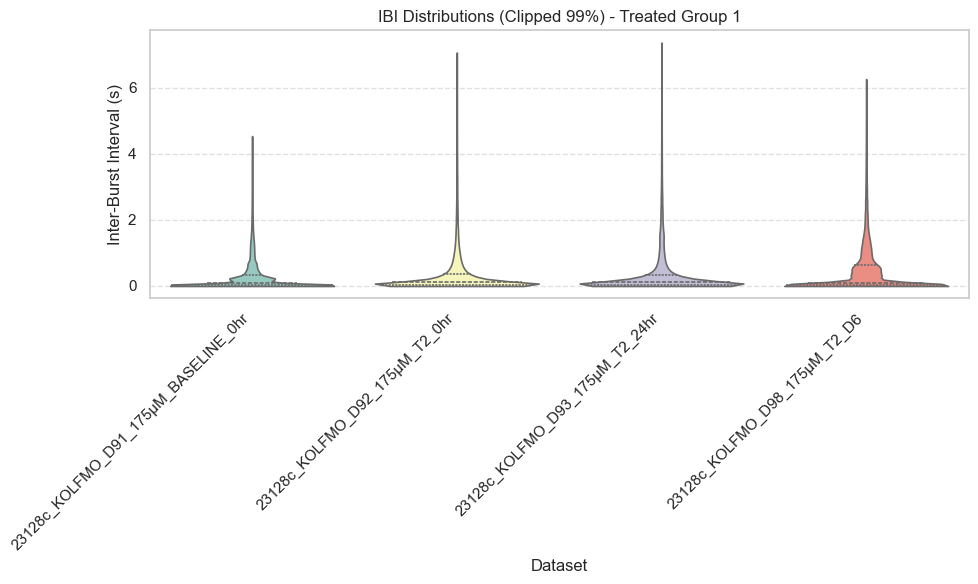

/var/folders/5b/0knmz8lj0x91l7symv3p4q2m0000gn/T/ipykernel_20616/1645910158.py:82: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
/var/folders/5b/0knmz8lj0x91l7symv3p4q2m0000gn/T/ipykernel_20616/1645910158.py:82: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(


Saved plot: IBI_Treated_Group_2.png


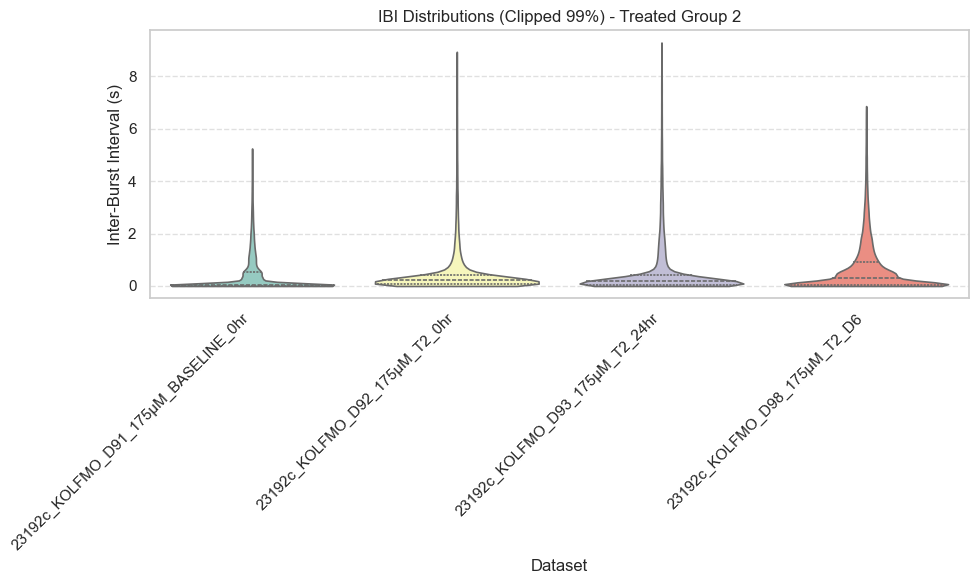

/var/folders/5b/0knmz8lj0x91l7symv3p4q2m0000gn/T/ipykernel_20616/1645910158.py:82: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
/var/folders/5b/0knmz8lj0x91l7symv3p4q2m0000gn/T/ipykernel_20616/1645910158.py:82: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(


Saved plot: IBI_Treated_Group_3.png


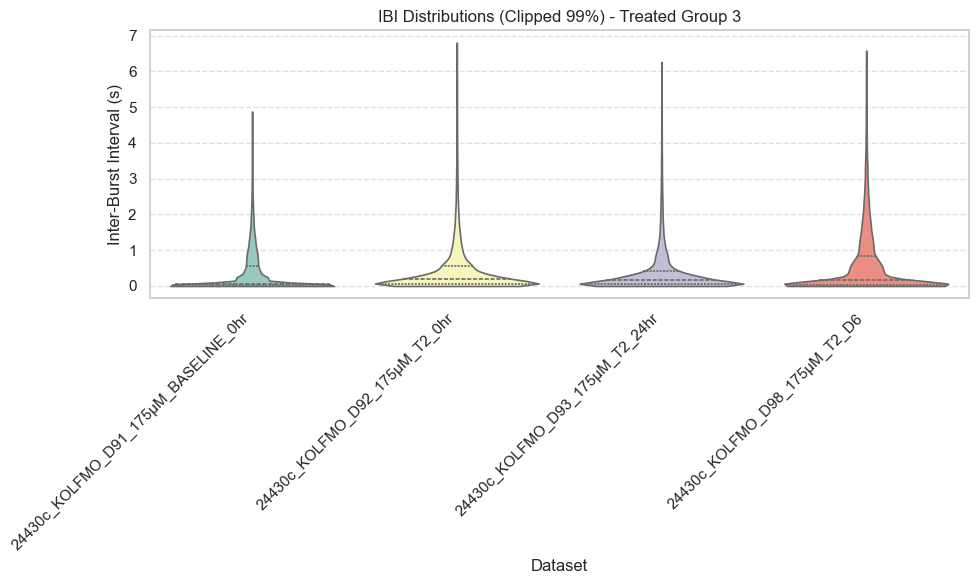

/var/folders/5b/0knmz8lj0x91l7symv3p4q2m0000gn/T/ipykernel_20616/1645910158.py:82: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
/var/folders/5b/0knmz8lj0x91l7symv3p4q2m0000gn/T/ipykernel_20616/1645910158.py:82: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(


Saved plot: IBI_Treated_Group_4.png


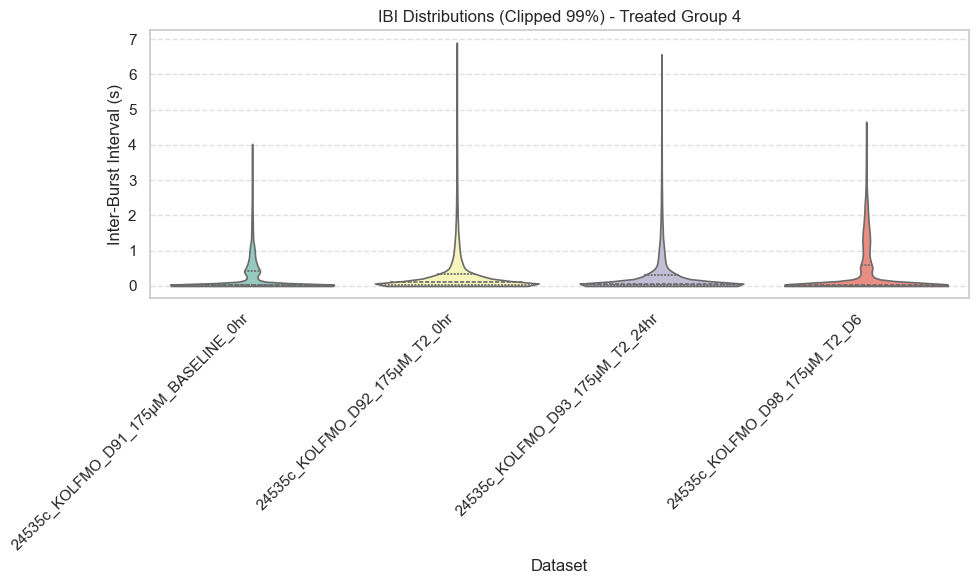

/var/folders/5b/0knmz8lj0x91l7symv3p4q2m0000gn/T/ipykernel_20616/1645910158.py:82: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
/var/folders/5b/0knmz8lj0x91l7symv3p4q2m0000gn/T/ipykernel_20616/1645910158.py:82: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(


Saved plot: IBI_Treated_Group_5.png


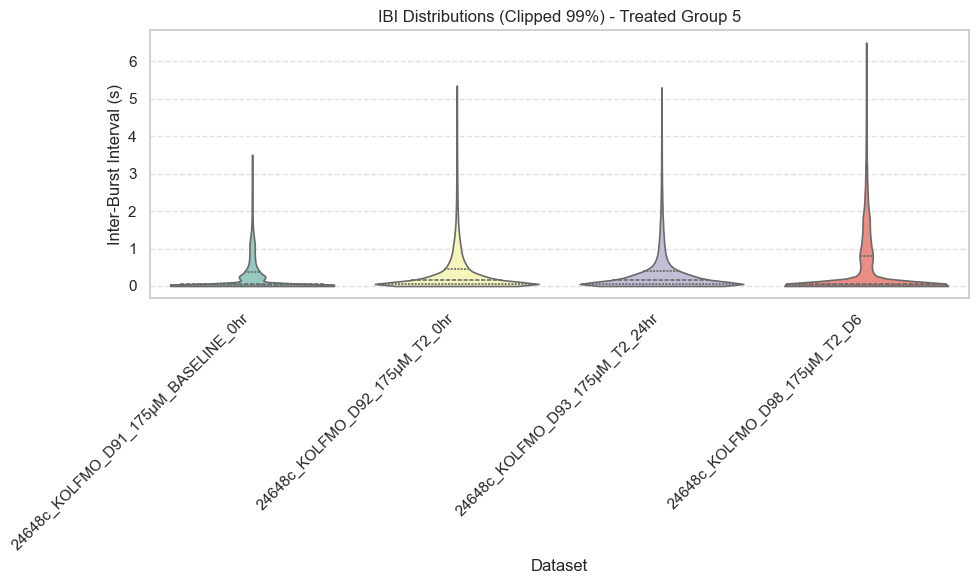

/var/folders/5b/0knmz8lj0x91l7symv3p4q2m0000gn/T/ipykernel_20616/1645910158.py:82: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
/var/folders/5b/0knmz8lj0x91l7symv3p4q2m0000gn/T/ipykernel_20616/1645910158.py:82: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(


Saved plot: IBI_Treated_Group_6.png


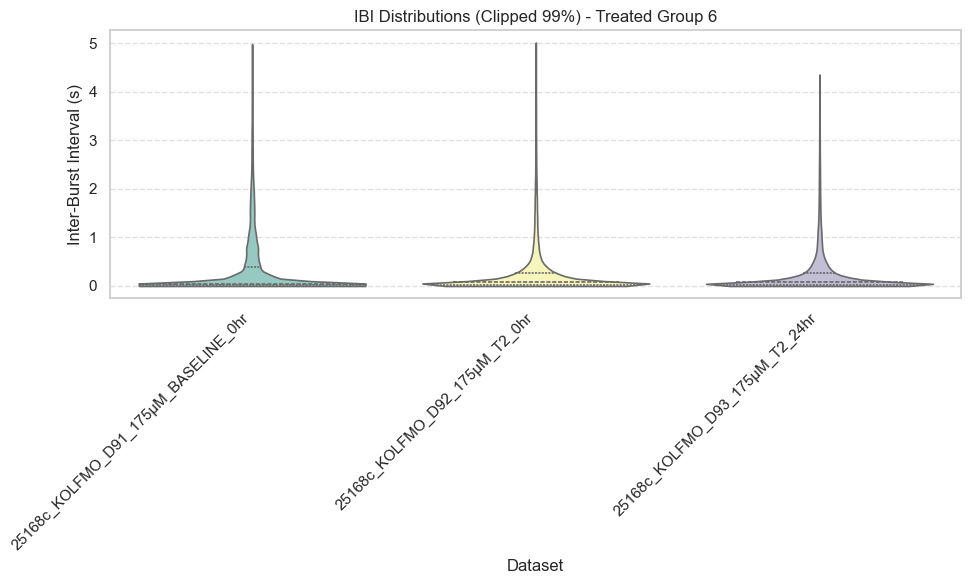

/var/folders/5b/0knmz8lj0x91l7symv3p4q2m0000gn/T/ipykernel_20616/1645910158.py:82: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
/var/folders/5b/0knmz8lj0x91l7symv3p4q2m0000gn/T/ipykernel_20616/1645910158.py:82: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(


Saved plot: IBI_Control_Group_1.png


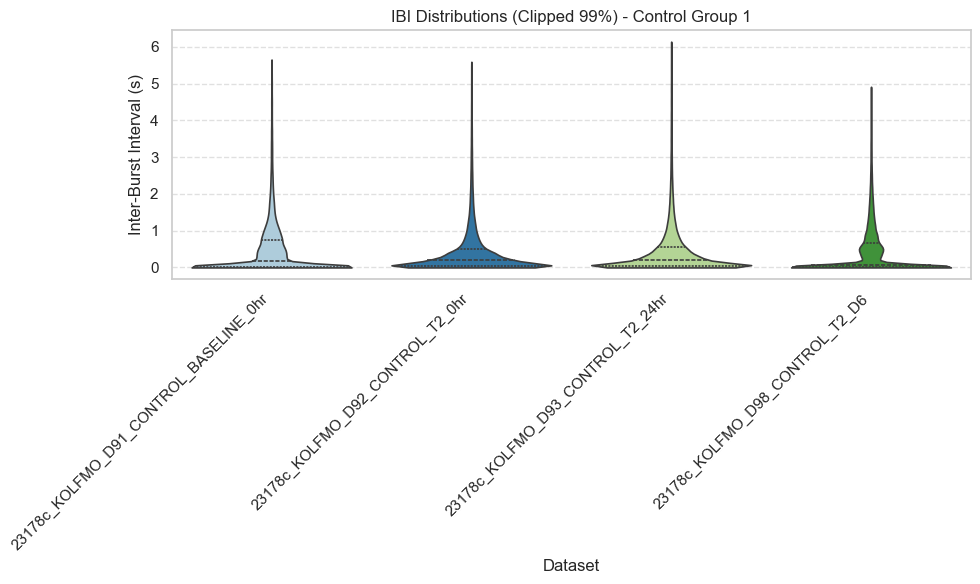

/var/folders/5b/0knmz8lj0x91l7symv3p4q2m0000gn/T/ipykernel_20616/1645910158.py:82: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
/var/folders/5b/0knmz8lj0x91l7symv3p4q2m0000gn/T/ipykernel_20616/1645910158.py:82: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(


Saved plot: IBI_Control_Group_2.png


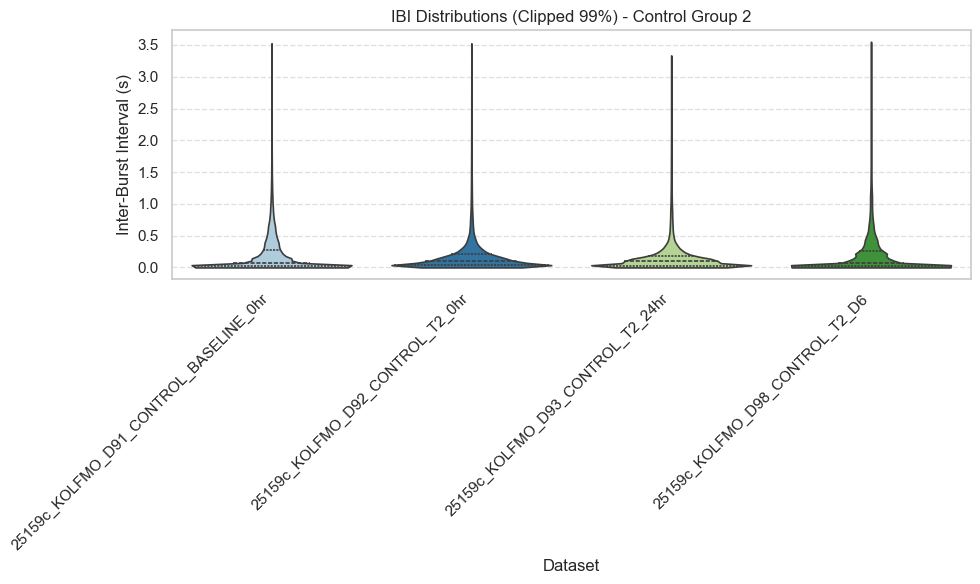

KeyError: '25168c_KOLFMO_D98_CONTROL_T2_D6'

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os


dataset_groups = {
    "Treated": [
        "23128c_KOLFMO_D91_175µM_BASELINE_0hr",
        "23128c_KOLFMO_D92_175µM_T2_0hr",
        "23128c_KOLFMO_D93_175µM_T2_24hr",
        "23128c_KOLFMO_D98_175µM_T2_D6",
        
        "23192c_KOLFMO_D91_175µM_BASELINE_0hr",
        "23192c_KOLFMO_D92_175µM_T2_0hr",
        "23192c_KOLFMO_D93_175µM_T2_24hr",
        "23192c_KOLFMO_D98_175µM_T2_D6",
        
        "24430c_KOLFMO_D91_175µM_BASELINE_0hr",
        "24430c_KOLFMO_D92_175µM_T2_0hr",
        "24430c_KOLFMO_D93_175µM_T2_24hr",
        "24430c_KOLFMO_D98_175µM_T2_D6",
        
        "24535c_KOLFMO_D91_175µM_BASELINE_0hr",
        "24535c_KOLFMO_D92_175µM_T2_0hr",
        "24535c_KOLFMO_D93_175µM_T2_24hr",
        "24535c_KOLFMO_D98_175µM_T2_D6",
        
        "24648c_KOLFMO_D91_175µM_BASELINE_0hr",
        "24648c_KOLFMO_D92_175µM_T2_0hr",
        "24648c_KOLFMO_D93_175µM_T2_24hr",
        "24648c_KOLFMO_D98_175µM_T2_D6",
        
        "25168c_KOLFMO_D91_175µM_BASELINE_0hr",
        "25168c_KOLFMO_D92_175µM_T2_0hr",
        "25168c_KOLFMO_D93_175µM_T2_24hr"
    ],
    "Control": [
        "23178c_KOLFMO_D91_CONTROL_BASELINE_0hr",
        "23178c_KOLFMO_D92_CONTROL_T2_0hr",
        "23178c_KOLFMO_D93_CONTROL_T2_24hr",
        "23178c_KOLFMO_D98_CONTROL_T2_D6",
        
        "25159c_KOLFMO_D91_CONTROL_BASELINE_0hr",
        "25159c_KOLFMO_D92_CONTROL_T2_0hr",
        "25159c_KOLFMO_D93_CONTROL_T2_24hr",
        "25159c_KOLFMO_D98_CONTROL_T2_D6",
        
        "25168c_KOLFMO_D91_175µM_BASELINE_0hr",  
        "25168c_KOLFMO_D92_175µM_T2_0hr",        
        "25168c_KOLFMO_D93_175µM_T2_24hr",
        "25168c_KOLFMO_D98_CONTROL_T2_D6"        
    ]
}

# clippable violin plots with pretty colors

def plot_ibi_violinplots_grouped(dataset_names, orc, group_title="", clip_percentile=99, 
                                 save=False, save_dir="plots", palette="Set2"):
    data = []
    for name in dataset_names:
        spike_trains = orc.spike_data[name].train
        ibis = compute_ibi(spike_trains)
        if len(ibis) > 0:
            threshold = np.percentile(ibis, clip_percentile)
            ibis_clipped = ibis[ibis <= threshold]
            data.extend([(name, val) for val in ibis_clipped])
        else:
            print(f"Warning: No IBIs found for dataset {name}")

    if not data:
        print("No IBI data available for plotting.")
        return

    df = pd.DataFrame(data, columns=["Dataset", "IBI (s)"])

    plt.figure(figsize=(10, 6))
    sns.violinplot(
        x="Dataset",
        y="IBI (s)",
        data=df,
        scale="width",
        cut=0,
        inner="quartile",
        linewidth=1.2,
        palette=palette
    )
    plt.title(f"IBI Distributions (Clipped {clip_percentile}%) - {group_title}")
    plt.xticks(rotation=45, ha='right')
    plt.ylabel("Inter-Burst Interval (s)")
    plt.grid(True, axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()

    
    if save:
        os.makedirs(save_dir, exist_ok=True)
        filename = f"IBI_{group_title.replace(' ', '_')}.png"
        plt.savefig(os.path.join(save_dir, filename), dpi=300)
        print(f"Saved plot: {filename}")

    plt.show()


# split list into N chunks

def chunk_list(lst, n):
    for i in range(0, len(lst), n):
        yield lst[i:i + n]


# generate all the figures

for i, group in enumerate(chunk_list(dataset_groups["Treated"], 4), start=1):
    plot_ibi_violinplots_grouped(group, orc, group_title=f"Treated Group {i}", save=True, palette="Set3")

for i, group in enumerate(chunk_list(dataset_groups["Control"], 4), start=1):
    plot_ibi_violinplots_grouped(group, orc, group_title=f"Control Group {i}", save=True, palette="Paired")


/var/folders/5b/0knmz8lj0x91l7symv3p4q2m0000gn/T/ipykernel_20616/703518035.py:42: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(


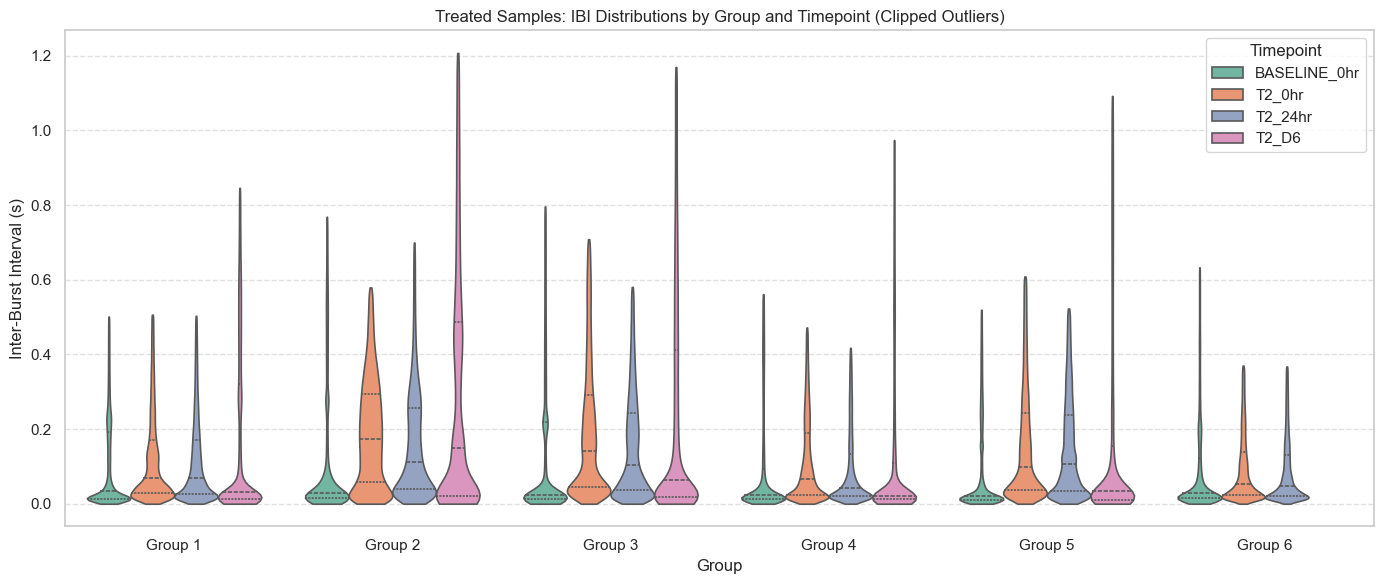

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def plot_all_treated_adjacent(dataset_groups, orc, clip_percentile=99):
    """
    Plots all treated samples in one violin plot figure with blocks of time points per group.
    """
    data = []
    group_labels = []
    time_labels = ["BASELINE_0hr", "T2_0hr", "T2_24hr", "T2_D6"]

    treated_datasets = dataset_groups["Treated"]

    # Split treated datasets into groups of 4 (last group may have 3)
    grouped_datasets = [treated_datasets[i:i+4] for i in range(0, len(treated_datasets), 4)]

    # Collect data with "Group" and "Timepoint" labels
    for group_idx, group in enumerate(grouped_datasets, start=1):
        for ds_name in group:
            spike_trains = orc.spike_data[ds_name].train
            ibis = compute_ibi(spike_trains)
            if len(ibis) > 0:
                threshold = np.percentile(ibis, clip_percentile)
                ibis_clipped = ibis[ibis <= threshold]
                # Extract timepoint label from dataset name
                timepoint = next((t for t in time_labels if t in ds_name), ds_name)
                for val in ibis_clipped:
                    data.append((f"Group {group_idx}", timepoint, val))

    if not data:
        print("No IBI data available for plotting.")
        return

    df = pd.DataFrame(data, columns=["Group", "Timepoint", "IBI (s)"])

    # make sure categories are in order 
    df["Timepoint"] = pd.Categorical(df["Timepoint"], categories=time_labels, ordered=True)

    plt.figure(figsize=(14, 6))
    sns.violinplot(
        x="Group", 
        y="IBI (s)", 
        hue="Timepoint",
        data=df, 
        scale="width", 
        cut=0, 
        inner="quartile",
        linewidth=1.2,
        palette="Set2"
    )

    plt.title("Treated Samples: IBI Distributions by Group and Timepoint (Clipped Outliers)")
    plt.ylabel("Inter-Burst Interval (s)")
    plt.grid(True, axis='y', linestyle='--', alpha=0.6)
    plt.legend(title="Timepoint")
    plt.tight_layout()
    plt.show()

plot_all_treated_adjacent(dataset_groups, orc, clip_percentile=80)


In [74]:
import numpy as np
import matplotlib.pyplot as plt

def extract_burst_metrics(orc, dataset_groups, config=None):
    """
    dataset_groups = {
        "Control": ["MO6359s2_D60_Control_BASELINE_0hr", ...],
        "Treated": ["MO6359s6_D53_175µM_BASELINE_0hr", ...]
    }
    """
    metrics = {group: {} for group in dataset_groups}

    for group, datasets in dataset_groups.items():
        for dataset_key in datasets:
            detector = orc.get_burst_detector(dataset_key, config)
            times, smoothed, peaks, peak_times, bursts, burst_windows = detector.compute_population_rate_and_bursts()

            if len(bursts) == 0 or len(peaks) == 0:
                continue

            # Burst widths (end - start)
            widths = [(end - start) * (times[1] - times[0]) for start, end in burst_windows]

            # IBIs (diff between consecutive peaks)
            ibis = np.diff([times[p] for p in peaks]) if len(peaks) > 1 else []

            metrics[group][dataset_key] = {
                "widths": widths,
                "ibis": ibis
            }

    return metrics


def plot_burst_metrics(metrics, timepoint_order=None):
    """
    metrics = output of extract_burst_metrics
    timepoint_order = ["BASELINE_0hr", "T2_24hr", "T2_72hr", "T2_D6"]
    """
    if timepoint_order is None:
        timepoint_order = ["BASELINE_0hr", "T2_24hr", "T2_72hr", "T2_D6"]

    for metric_type in ["widths", "ibis"]:
        plt.figure(figsize=(8,5))
        for group, datasets in metrics.items():
            means, stds = [], []
            for tp in timepoint_order:
                matched = [v[metric_type] for k,v in datasets.items() if tp in k]
                values = np.concatenate(matched) if matched else []
                means.append(np.mean(values) if len(values) else np.nan)
                stds.append(np.std(values) if len(values) else np.nan)

            plt.errorbar(timepoint_order, means, yerr=stds, marker='o', label=group)

        plt.title(f"Mean {metric_type.capitalize()} Over Time")
        plt.xlabel("Timepoint")
        plt.ylabel("ms")
        plt.legend()
        plt.grid(True)
        plt.show()


In [15]:
print("Available datasets:", orc.list_datasets())


Available datasets: ['23128c_KOLFMO_D101_175µM_T2_D10', '23128c_KOLFMO_D86_175µM_T1_D-6', '23128c_KOLFMO_D91_175µM_BASELINE_0hr', '23128c_KOLFMO_D91_175µM_T1_3hrs', '23128c_KOLFMO_D92_175µM_T2_0hr', '23128c_KOLFMO_D93_175µM_T2_24hr', '23128c_KOLFMO_D98_175µM_T2_D6', '23178c_KOLFMO_D101_CONTROL_T2_D10', '23178c_KOLFMO_D86_Control_T1_D-6', '23178c_KOLFMO_D91_CONTROL_BASELINE_0hr', '23178c_KOLFMO_D91_CONTROL_T1_3hrs', '23178c_KOLFMO_D92_CONTROL_T1_24hr', '23178c_KOLFMO_D92_CONTROL_T2_0hr', '23178c_KOLFMO_D93_CONTROL_T2_24hr', '23178c_KOLFMO_D98_CONTROL_T2_D6', '23192c_KOLFMO_D91_175µM_BASELINE_0hr', '23192c_KOLFMO_D92_175µM_T1_24hr', '23192c_KOLFMO_D92_175µM_T2_0hr', '23192c_KOLFMO_D93_175µM_T2_24hr', '23192c_KOLFMO_D98_175µM_T2_D6', '24430c_KOLFMO_D101_CONTROL_T2_D10', '24430c_KOLFMO_D86_175µM_T1_D-6', '24430c_KOLFMO_D91_175µM_BASELINE_0hr', '24430c_KOLFMO_D91_175µM_T1_3hrs', '24430c_KOLFMO_D92_175µM_T1_24hr', '24430c_KOLFMO_D92_175µM_T2_0hr', '24430c_KOLFMO_D93_175µM_T2_24hr', '24430c_K

In [75]:
config = {
    "bin_size_ms": 5.0,
    "threshold_rms": 1.7,
    "burst_edge_fraction": 0.25,
    "gauss_win_ms": 17.0,
    "square_win_ms": 9.0,
    "min_dist": 3000.0
}


dataset_groups = {
    "Control": [
        "MO6359s2_D53_Control_BASELINE_0hr",
        "MO6359s2_D55_Control_T2_24hr",
        "MO6359s2_D56_Control_T2_48hr",
        "MO6359s2_D57_Control_T2_72hr",
        "MO6359s2_D58_Control_T2_D4",
        "MO6359s2_D59_Control_T2_D5",
        "MO6359s2_D60_Control_T2_D6"
    ],
    "Treated": [
        "MO6359s6_D53_175µM_BASELINE_0hr",
        "MO6359s6_D55_175µM_T2_24hr",
        "MO6359s6_D56_175µM_T2_48hr",
        "MO6359s6_D57_175µM_T2_72hr",
        "MO6359s6_D58_175µM_T2_D4",
        "MO6359s6_D59_175µM_T2_D5",
        "MO6359s6_D60_175µM_T2_D6"
    ]
}

# Extract burst metrics
metrics = extract_burst_metrics(orc, dataset_groups)

# Plot mean ± variability for burst widths and IBIs
plot_burst_metrics(metrics, timepoint_order=["BASELINE_0hr", "T2_24hr", "T2_72hr", "T2_D6"])

ValueError: Dataset 'MO6359s2_D53_Control_BASELINE_0hr' not found.

In [76]:
print(orc.list_datasets())

['23128c_KOLFMO_D101_175µM_T2_D10', '23128c_KOLFMO_D86_175µM_T1_D-6', '23128c_KOLFMO_D91_175µM_BASELINE_0hr', '23128c_KOLFMO_D91_175µM_T1_3hrs', '23128c_KOLFMO_D92_175µM_T2_0hr', '23128c_KOLFMO_D93_175µM_T2_24hr', '23128c_KOLFMO_D98_175µM_T2_D6', '23178c_KOLFMO_D101_CONTROL_T2_D10', '23178c_KOLFMO_D86_Control_T1_D-6', '23178c_KOLFMO_D91_CONTROL_BASELINE_0hr', '23178c_KOLFMO_D91_CONTROL_T1_3hrs', '23178c_KOLFMO_D92_CONTROL_T1_24hr', '23178c_KOLFMO_D92_CONTROL_T2_0hr', '23178c_KOLFMO_D93_CONTROL_T2_24hr', '23178c_KOLFMO_D98_CONTROL_T2_D6', '23192c_KOLFMO_D91_175µM_BASELINE_0hr', '23192c_KOLFMO_D92_175µM_T1_24hr', '23192c_KOLFMO_D92_175µM_T2_0hr', '23192c_KOLFMO_D93_175µM_T2_24hr', '23192c_KOLFMO_D98_175µM_T2_D6', '24430c_KOLFMO_D101_CONTROL_T2_D10', '24430c_KOLFMO_D86_175µM_T1_D-6', '24430c_KOLFMO_D91_175µM_BASELINE_0hr', '24430c_KOLFMO_D91_175µM_T1_3hrs', '24430c_KOLFMO_D92_175µM_T1_24hr', '24430c_KOLFMO_D92_175µM_T2_0hr', '24430c_KOLFMO_D93_175µM_T2_24hr', '24430c_KOLFMO_D98_175µM_T2_D

In [ ]:
def extract_all_burst_widths(orc, dataset_groups, config=None):
    results = {group: {} for group in dataset_groups}

    for group, datasets in dataset_groups.items():
        for dataset_key in datasets:
            detector = orc.get_burst_detector(dataset_key, config)
            _, _, _, _, bursts, _ = detector.compute_population_rate_and_bursts()

            if len(bursts) == 0:
                continue

            # Calculate widths (s)
            bin_size_s = detector.config.get("bin_size_s", 0.01)
            widths = [(end - start) * bin_size_s for start, end in bursts]

            # Timepoint label
            timepoint = "_".join(dataset_key.split("_")[3:])

            if timepoint not in results[group]:
                results[group][timepoint] = []
            results[group][timepoint].extend(widths)

    return results

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def plot_burst_width_violins(data):
    # flatten out the data
    rows = []
    for group, group_data in data.items():
        for tp, values in group_data.items():
            for v in values:
                rows.append((tp, v, group))
    df = pd.DataFrame(rows, columns=["Timepoint", "Burst Width", "Group"])

    plt.figure(figsize=(10, 6))
    sns.violinplot(
        data=df,
        x="Timepoint",
        y="Burst Width",
        hue="Group",
        inner="box",
        dodge=True,
        cut=0,
        scale="width",
        width=0.4,
        split=False  # make them face the same direction
    )

    plt.title("Burst Width Distributions Over Time")
    plt.ylabel("Burst Width (s)")
    plt.xlabel("Timepoint")
    plt.legend(title="Group")
    plt.tight_layout()
    plt.show()

In [ ]:
#MaxTwo Kolf

config = {
    "bin_size_ms": 5.0,
    "threshold_rms": 1.7,
    "burst_edge_fraction": 0.25,
    "gauss_win_ms": 17.0,
    "square_win_ms": 9.0,
    "min_dist": 3000.0
}


dataset_groups = {
    "Control": [
        "MO6359s2_D53_Control_BASELINE_0hr",
        "MO6359s2_D55_Control_T2_24hr",
        "MO6359s2_D56_Control_T2_48hr",
        "MO6359s2_D57_Control_T2_72hr",
        "MO6359s2_D58_Control_T2_D4",
        "MO6359s2_D59_Control_T2_D5",
        "MO6359s2_D60_Control_T2_D6"
    ],
    "Treated": [
        "MO6359s6_D53_175µM_BASELINE_0hr",
        "MO6359s6_D55_175µM_T2_24hr",
        "MO6359s6_D56_175µM_T2_48hr",
        "MO6359s6_D57_175µM_T2_72hr",
        "MO6359s6_D58_175µM_T2_D4",
        "MO6359s6_D59_175µM_T2_D5",
        "MO6359s6_D60_175µM_T2_D6"
    ]
}

burst_widths = extract_all_burst_widths(orc, dataset_groups, config)
plot_burst_width_violins(burst_widths)

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re

def prepare_burst_widths_df(burst_widths):
    rows = []
    for group, datasets in burst_widths.items():
        for dataset_name, widths in datasets.items():
            timepoint = "_".join(dataset_name.split("_")[-2:])
            
            # Extract dataset number (e.g., 23128 from 23128c_KOLFMO...)
            match = re.match(r"(\d{5})", dataset_name)
            dataset_id = match.group(1) if match else dataset_name
            
            for w in widths:
                rows.append({
                    "DatasetID": dataset_id,
                    "Sample": dataset_name,
                    "Timepoint": timepoint,
                    "Burst Width (s)": w
                })
    return pd.DataFrame(rows)


def plot_burst_widths(burst_widths_df, output_dir=None):

    treated_df = burst_widths_df.copy()

    # Create combined labels
    treated_df["Label"] = treated_df["Sample"] + " | " + treated_df["Timepoint"]

    # Get unique labels
    unique_labels = treated_df["Label"].unique()

    # Assign numeric x positions
    label_to_pos = {label: i * 1 for i, label in enumerate(unique_labels)}
    treated_df["Xpos"] = treated_df["Label"].map(label_to_pos)

    # Plot
    plt.figure(figsize=(max(25, len(unique_labels) * 0.6), 8)) # adust spacing
    sns.violinplot(
        x="Xpos",
        y="Burst Width (s)",
        data=treated_df,
        cut=0,
        inner="box",
        bw=0.3
    )

    # Set ticks correctly
    plt.xticks(
        [label_to_pos[l] for l in unique_labels],
        unique_labels,
        rotation=90,
        fontsize=9
    )

    plt.title("Burst Widths -MaxOne Kolf 2.2J Treated", fontsize=18)
    plt.xlabel("Sample | Timepoint", fontsize=14)
    plt.ylabel("Burst Width (s)", fontsize=14)

    plt.tight_layout()
    if output_dir:
        plt.savefig(f"{output_dir}/burst_widths_spaced.png", dpi=300)
    plt.show()


/var/folders/5b/0knmz8lj0x91l7symv3p4q2m0000gn/T/ipykernel_20616/2578601398.py:43: FutureWarning: 

The `bw` parameter is deprecated in favor of `bw_method`/`bw_adjust`.
Setting `bw_method=0.3`, but please see docs for the new parameters
and update your code. This will become an error in seaborn v0.15.0.

  sns.violinplot(


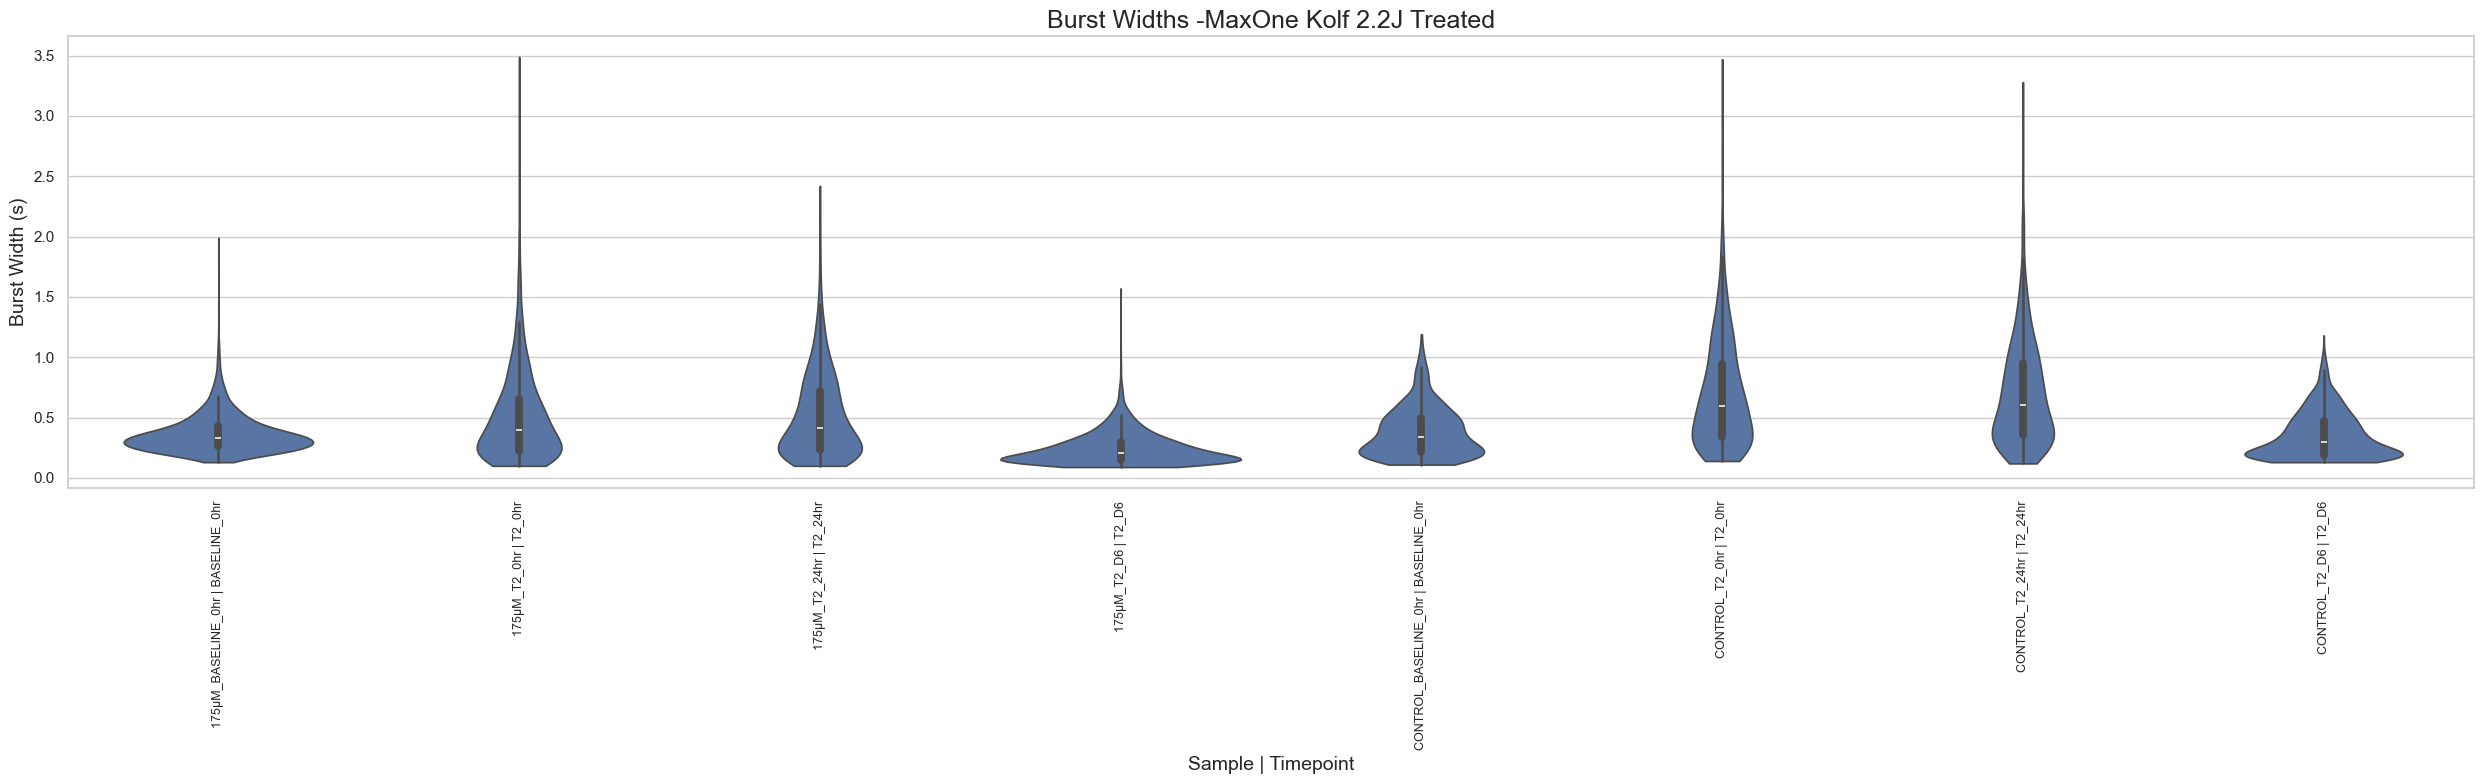

In [82]:
# MaxOne Kolf

config = {
    "bin_size_ms": 5.0,
    "threshold_rms": 1.7,
    "burst_edge_fraction": 0.5,
    "gauss_win_ms": 17.0,
    "square_win_ms": 5.0,
    "min_dist": 1950.0
}

dataset_groups = {
    "Treated": [
        "23128c_KOLFMO_D91_175µM_BASELINE_0hr",
        "23128c_KOLFMO_D92_175µM_T2_0hr",
        "23128c_KOLFMO_D93_175µM_T2_24hr",
        "23128c_KOLFMO_D98_175µM_T2_D6",
        
        "23192c_KOLFMO_D91_175µM_BASELINE_0hr",
        "23192c_KOLFMO_D92_175µM_T2_0hr",
        "23192c_KOLFMO_D93_175µM_T2_24hr",
        "23192c_KOLFMO_D98_175µM_T2_D6",
        
        "24430c_KOLFMO_D91_175µM_BASELINE_0hr",
        "24430c_KOLFMO_D92_175µM_T2_0hr",
        "24430c_KOLFMO_D93_175µM_T2_24hr",
        "24430c_KOLFMO_D98_175µM_T2_D6",
        
        "24535c_KOLFMO_D91_175µM_BASELINE_0hr",
        "24535c_KOLFMO_D92_175µM_T2_0hr",
        "24535c_KOLFMO_D93_175µM_T2_24hr",
        "24535c_KOLFMO_D98_175µM_T2_D6",
        
        "24648c_KOLFMO_D91_175µM_BASELINE_0hr",
        "24648c_KOLFMO_D92_175µM_T2_0hr",
        "24648c_KOLFMO_D93_175µM_T2_24hr",
        "24648c_KOLFMO_D98_175µM_T2_D6",
        
        "25168c_KOLFMO_D91_175µM_BASELINE_0hr",
        "25168c_KOLFMO_D92_175µM_T2_0hr",
        "25168c_KOLFMO_D93_175µM_T2_24hr"
    ],
    "Control": [
        "23178c_KOLFMO_D91_CONTROL_BASELINE_0hr",
        "23178c_KOLFMO_D92_CONTROL_T2_0hr",
        "23178c_KOLFMO_D93_CONTROL_T2_24hr",
        "23178c_KOLFMO_D98_CONTROL_T2_D6",
        
        "25159c_KOLFMO_D91_CONTROL_BASELINE_0hr",
        "25159c_KOLFMO_D92_CONTROL_T2_0hr",
        "25159c_KOLFMO_D93_CONTROL_T2_24hr",
        "25159c_KOLFMO_D98_CONTROL_T2_D6",
        
        "25168c_KOLFMO_D91_175µM_BASELINE_0hr",  
        "25168c_KOLFMO_D92_175µM_T2_0hr",        
        "25168c_KOLFMO_D93_175µM_T2_24hr",
        "25168c_KOLFMO_D98_175µM_T2_D6"        
    ]
}

burst_widths = extract_all_burst_widths(orc, dataset_groups, config)
burst_widths_df = prepare_burst_widths_df(burst_widths)
plot_burst_widths(burst_widths_df)



In [84]:
def extract_all_burst_widths(orc, dataset_groups, config):
    burst_widths = {}
    skipped_datasets = []

    for group, datasets in dataset_groups.items():
        burst_widths[group] = {}
        for dataset_key in datasets:
            try:
                detector = orc.get_burst_detector(dataset_key, config)
                _, _, _, _, bursts, _ = detector.compute_population_rate_and_bursts()

                if len(bursts) == 0:
                    burst_widths[group][dataset_key] = [np.nan]
                else:
                    widths = [b["width"] for b in bursts if "width" in b]
                    burst_widths[group][dataset_key] = widths if widths else [np.nan]
            except Exception as e:
                skipped_datasets.append((dataset_key, str(e)))
                burst_widths[group][dataset_key] = [np.nan]

    if skipped_datasets:
        print("Skipped datasets (errors or not found):")
        for ds, err in skipped_datasets:
            print(f"  - {ds}: {err}")

    return burst_widths

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_burst_width_violins(burst_widths_df, timepoint_order=None):
    """
    Plot burst width distributions as violin plots with placeholders for missing data.
    burst_widths_df = DataFrame with columns ["Group", "Timepoint", "Burst Width (s)"]
    """
    if timepoint_order is None:
        timepoint_order = ["BASELINE_0hr", "T2_0hr", "T2_24hr", "T2_D6"]

    # Ensure all combinations of group/timepoint exist
    groups = burst_widths_df["Group"].unique()
    for tp in timepoint_order:
        for group in groups:
            exists = ((burst_widths_df["Timepoint"] == tp) &
                      (burst_widths_df["Group"] == group)).any()
            if not exists:
                burst_widths_df = pd.concat([
                    burst_widths_df,
                    pd.DataFrame({"Group": [group],
                                  "Timepoint": [tp],
                                  "Burst Width (s)": [np.nan]})
                ], ignore_index=True)

    plt.figure(figsize=(12, 6))
    sns.violinplot(
        x="Timepoint",
        y="Burst Width (s)",
        hue="Group",
        data=burst_widths_df,
        density_norm='width',
        cut=0
    )

    plt.title("Burst Width Distributions Over Time", fontsize=14)
    plt.xlabel("Timepoint", fontsize=12)
    plt.ylabel("Burst Width (s)", fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.legend(title="Group")
    plt.grid(True, axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def extract_all_burst_widths(orc, dataset_groups, config):
    burst_widths = {}
    skipped_datasets = []

    for group, datasets in dataset_groups.items():
        burst_widths[group] = {}
        for dataset_key in datasets:
            try:
                detector = orc.get_burst_detector(dataset_key, config)
                _, _, _, _, bursts, _ = detector.compute_population_rate_and_bursts()

                if len(bursts) == 0:
                    burst_widths[group][dataset_key] = [np.nan]
                else:
                    widths = [b["width"] for b in bursts if "width" in b]
                    burst_widths[group][dataset_key] = widths if widths else [np.nan]
            except Exception as e:
                skipped_datasets.append((dataset_key, str(e)))
                burst_widths[group][dataset_key] = [np.nan]

    if skipped_datasets:
        print("Skipped datasets (errors or not found):")
        for ds, err in skipped_datasets:
            print(f"  - {ds}: {err}")

    return burst_widths

def plot_burst_width_violins(burst_widths_df, timepoint_order=None):
    """
    Plot burst width distributions as violin plots, 
    forcing placeholders for missing data so every panel shows.
    """
    # Clean up labels
    burst_widths_df["Timepoint"] = burst_widths_df["Timepoint"].str.replace(r"^\d+µM_", "", regex=True)

    if timepoint_order is None:
        timepoint_order = sorted(burst_widths_df["Timepoint"].unique())
        
    # Fill missing group-timepoint combos with zero-width placeholder
    groups = burst_widths_df["Group"].unique()
    for tp in timepoint_order:
        for group in groups:
            if not ((burst_widths_df["Timepoint"] == tp) &
                    (burst_widths_df["Group"] == group)).any():
                burst_widths_df = pd.concat([
                    burst_widths_df,
                    pd.DataFrame({
                        "Group": [group],
                        "Timepoint": [tp],
                        "Burst Width (s)": [0.0]  # <-- force a visible placeholder
                    })
                ], ignore_index=True)

    plt.figure(figsize=(12, 6))
    sns.violinplot(
        x="Timepoint",
        y="Burst Width (s)",
        hue="Group",
        data=burst_widths_df,
        density_norm='width',
        cut=0,
        scale="width"
    )

    plt.title("Burst Width Distributions Over Time", fontsize=14)
    plt.xlabel("Timepoint", fontsize=12)
    plt.ylabel("Burst Width (s)", fontsize=12)
    plt.xticks(rotation=0)
    plt.legend(title="Group")
    plt.grid(True, axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()


In [14]:
# MaxOne Kolf

config = {
    "bin_size_ms": 5.0,
    "threshold_rms": 1.7,
    "burst_edge_fraction": 0.5,
    "gauss_win_ms": 17.0,
    "square_win_ms": 5.0,
    "min_dist": 1950.0
}

dataset_groups = {
    "Treated": [
        "23128c_KOLFMO_D91_175µM_BASELINE_0hr",
        "23128c_KOLFMO_D92_175µM_T2_0hr",
        "23128c_KOLFMO_D93_175µM_T2_24hr",
        "23128c_KOLFMO_D98_175µM_T2_D6",
        
        "23192c_KOLFMO_D91_175µM_BASELINE_0hr",
        "23192c_KOLFMO_D92_175µM_T2_0hr",
        "23192c_KOLFMO_D93_175µM_T2_24hr",
        "23192c_KOLFMO_D98_175µM_T2_D6",
        
        "24430c_KOLFMO_D91_175µM_BASELINE_0hr",
        "24430c_KOLFMO_D92_175µM_T2_0hr",
        "24430c_KOLFMO_D93_175µM_T2_24hr",
        "24430c_KOLFMO_D98_175µM_T2_D6",
        
        "24535c_KOLFMO_D91_175µM_BASELINE_0hr",
        "24535c_KOLFMO_D92_175µM_T2_0hr",
        "24535c_KOLFMO_D93_175µM_T2_24hr",
        "24535c_KOLFMO_D98_175µM_T2_D6",
        
        "24648c_KOLFMO_D91_175µM_BASELINE_0hr",
        "24648c_KOLFMO_D92_175µM_T2_0hr",
        "24648c_KOLFMO_D93_175µM_T2_24hr",
        "24648c_KOLFMO_D98_175µM_T2_D6",
        
        "25168c_KOLFMO_D91_175µM_BASELINE_0hr",
        "25168c_KOLFMO_D92_175µM_T2_0hr",
        "25168c_KOLFMO_D93_175µM_T2_24hr"
    ],
    "Control": [
        "23178c_KOLFMO_D91_CONTROL_BASELINE_0hr",
        "23178c_KOLFMO_D92_CONTROL_T2_0hr",
        "23178c_KOLFMO_D93_CONTROL_T2_24hr",
        "23178c_KOLFMO_D98_CONTROL_T2_D6",
        
        "25159c_KOLFMO_D91_CONTROL_BASELINE_0hr",
        "25159c_KOLFMO_D92_CONTROL_T2_0hr",
        "25159c_KOLFMO_D93_CONTROL_T2_24hr",
        "25159c_KOLFMO_D98_CONTROL_T2_D6",
        
        "25168c_KOLFMO_D91_175µM_BASELINE_0hr",  
        "25168c_KOLFMO_D92_175µM_T2_0hr",        
        "25168c_KOLFMO_D93_175µM_T2_24hr",
        "25168c_KOLFMO_D98_CONTROL_T2_D6"        
    ]
}

timepoint_order = ["BASELINE_0hr", "T2_0hr", "T2_24hr", "T2_D6"]

def prepare_burst_widths_df(burst_widths):
    rows = []
    for group, datasets in burst_widths.items():
        for dataset_name, widths in datasets.items():
            for w in widths:
                rows.append({
                    "Group": group,
                    "Dataset": dataset_name,
                    "Timepoint": "_".join(dataset_name.split("_")[-2:]),  # Extract last two parts
                    "Burst Width (s)": w
                })
    return pd.DataFrame(rows)

# Convert first
burst_widths_df = prepare_burst_widths_df(burst_widths)

burst_widths = extract_all_burst_widths(orc, dataset_groups, config)
burst_widths_df = prepare_burst_widths_df(burst_widths)
plot_burst_width_violins(burst_widths_df, timepoint_order)





NameError: name 'burst_widths' is not defined

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def extract_all_burst_widths(orc, dataset_groups, config):
    burst_widths = {}
    skipped_datasets = []

    for group, datasets in dataset_groups.items():
        burst_widths[group] = {}
        for dataset_key in datasets:
            try:
                detector = orc.get_burst_detector(dataset_key, config)
                results = detector.compute_population_rate_and_bursts()

                bursts = results[4] if isinstance(results, (list, tuple)) and len(results) >= 5 else []

                widths = []
                for b in bursts:
                    if isinstance(b, dict) and "width" in b:
                        widths.append(b["width"] / 1000.0)  # ✅ convert ms → sec
                    elif isinstance(b, (list, tuple)) and len(b) >= 2:
                        widths.append(b[1] / 1000.0)  # ✅ convert ms → sec
                
                burst_widths[group][dataset_key] = widths if widths else [np.nan]

            except Exception as e:
                skipped_datasets.append((dataset_key, str(e)))
                burst_widths[group][dataset_key] = [np.nan]

    if skipped_datasets:
        print("Skipped datasets (errors or not found):")
        for ds, err in skipped_datasets:
            print(f"  - {ds}: {err}")

    print("\nBurst counts per dataset:")
    for group, datasets in burst_widths.items():
        for ds, widths in datasets.items():
            valid = [w for w in widths if not np.isnan(w)]
            print(f"{group} | {ds}: {len(valid)} bursts")

    return burst_widths



def prepare_burst_widths_df(burst_widths):
    rows = []
    for group, datasets in burst_widths.items():
        for dataset_name, widths in datasets.items():
            timepoint = "_".join(dataset_name.split("_")[-2:])
            for w in widths:
                rows.append({
                    "Group": group,
                    "Timepoint": timepoint,
                    "Burst Width (s)": w
                })

    # Combine all replicates for same Group + Timepoint
    df = pd.DataFrame(rows)
    df = df.dropna(subset=["Burst Width (s)"])  # remove NaNs

    return df
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

def plot_burst_width_violins_separately(burst_widths_df, output_dir="burst_violin_plots"):
    """
    Creates a separate violin plot for each Dataset-Timepoint combination (36 plots total for 9 datasets × 4 timepoints)
    comparing Treated vs Control.
    """
    os.makedirs(output_dir, exist_ok=True)
    
    datasets = burst_widths_df["Dataset"].unique()
    timepoints = ["BASELINE_0hr", "T2_0hr", "T2_24hr", "T2_D6"]

    for dataset in datasets:
        for tp in timepoints:
            subset = burst_widths_df[
                (burst_widths_df["Dataset"] == dataset) &
                (burst_widths_df["Timepoint"] == tp)
            ]
            
            if subset.empty:
                continue  # Skip if no data for this dataset/timepoint
            
            plt.figure(figsize=(6, 5))
            sns.violinplot(
                x="Group",
                y="Burst Width (s)",
                data=subset,
                density_norm='width',
                cut=0
            )
            
            plt.title(f"{dataset} - {tp}", fontsize=12)
            plt.xlabel("Group", fontsize=10)
            plt.ylabel("Burst Width (s)", fontsize=10)
            plt.grid(True, axis='y', linestyle='--', alpha=0.6)
            plt.tight_layout()
            
            save_path = os.path.join(output_dir, f"{dataset}_{tp}_violin.png")
            plt.savefig(save_path, dpi=150)
            plt.close()
    
    print(f"Generated {len(datasets) * len(timepoints)} plots in '{output_dir}'")



# ===============================
# RUN
# ===============================

config = {
    "bin_size_ms": 5.0,
    "threshold_rms": 1.7,
    "burst_edge_fraction": 0.5,
    "gauss_win_ms": 17.0,
    "square_win_ms": 5.0,
    "min_dist": 1950.0
}

dataset_groups = {
    "Treated": [
        "23128c_KOLFMO_D91_175µM_BASELINE_0hr",
        "23128c_KOLFMO_D92_175µM_T2_0hr",
        "23128c_KOLFMO_D93_175µM_T2_24hr",
        "23128c_KOLFMO_D98_175µM_T2_D6",
        "23192c_KOLFMO_D91_175µM_BASELINE_0hr",
        "23192c_KOLFMO_D92_175µM_T2_0hr",
        "23192c_KOLFMO_D93_175µM_T2_24hr",
        "23192c_KOLFMO_D98_175µM_T2_D6",
        "24430c_KOLFMO_D91_175µM_BASELINE_0hr",
        "24430c_KOLFMO_D92_175µM_T2_0hr",
        "24430c_KOLFMO_D93_175µM_T2_24hr",
        "24430c_KOLFMO_D98_175µM_T2_D6",
        "24535c_KOLFMO_D91_175µM_BASELINE_0hr",
        "24535c_KOLFMO_D92_175µM_T2_0hr",
        "24535c_KOLFMO_D93_175µM_T2_24hr",
        "24535c_KOLFMO_D98_175µM_T2_D6",
        "24648c_KOLFMO_D91_175µM_BASELINE_0hr",
        "24648c_KOLFMO_D92_175µM_T2_0hr",
        "24648c_KOLFMO_D93_175µM_T2_24hr",
        "24648c_KOLFMO_D98_175µM_T2_D6",
        "25168c_KOLFMO_D91_175µM_BASELINE_0hr",
        "25168c_KOLFMO_D92_175µM_T2_0hr",
        "25168c_KOLFMO_D93_175µM_T2_24hr"
    ],
    "Control": [
        "23178c_KOLFMO_D91_CONTROL_BASELINE_0hr",
        "23178c_KOLFMO_D92_CONTROL_T2_0hr",
        "23178c_KOLFMO_D93_CONTROL_T2_24hr",
        "23178c_KOLFMO_D98_CONTROL_T2_D6",
        "25159c_KOLFMO_D91_CONTROL_BASELINE_0hr",
        "25159c_KOLFMO_D92_CONTROL_T2_0hr",
        "25159c_KOLFMO_D93_CONTROL_T2_24hr",
        "25159c_KOLFMO_D98_CONTROL_T2_D6",
        "25168c_KOLFMO_D91_175µM_BASELINE_0hr",
        "25168c_KOLFMO_D92_175µM_T2_0hr",
        "25168c_KOLFMO_D93_175µM_T2_24hr",
        "25168c_KOLFMO_D98_CONTROL_T2_D6"
    ]
}

timepoint_order = ["BASELINE_0hr", "T2_0hr", "T2_24hr", "T2_D6"]

burst_widths = extract_all_burst_widths(orc, dataset_groups, config)
burst_widths_df = prepare_burst_widths_df(burst_widths)
plot_burst_width_violins_separately(burst_widths_df)


Skipped datasets (errors or not found):
  - 25168c_KOLFMO_D98_CONTROL_T2_D6: Dataset '25168c_KOLFMO_D98_CONTROL_T2_D6' not found.

Burst counts per dataset:
Treated | 23128c_KOLFMO_D91_175µM_BASELINE_0hr: 322 bursts
Treated | 23128c_KOLFMO_D92_175µM_T2_0hr: 235 bursts
Treated | 23128c_KOLFMO_D93_175µM_T2_24hr: 270 bursts
Treated | 23128c_KOLFMO_D98_175µM_T2_D6: 529 bursts
Treated | 23192c_KOLFMO_D91_175µM_BASELINE_0hr: 375 bursts
Treated | 23192c_KOLFMO_D92_175µM_T2_0hr: 344 bursts
Treated | 23192c_KOLFMO_D93_175µM_T2_24hr: 349 bursts
Treated | 23192c_KOLFMO_D98_175µM_T2_D6: 516 bursts
Treated | 24430c_KOLFMO_D91_175µM_BASELINE_0hr: 408 bursts
Treated | 24430c_KOLFMO_D92_175µM_T2_0hr: 237 bursts
Treated | 24430c_KOLFMO_D93_175µM_T2_24hr: 262 bursts
Treated | 24430c_KOLFMO_D98_175µM_T2_D6: 432 bursts
Treated | 24535c_KOLFMO_D91_175µM_BASELINE_0hr: 398 bursts
Treated | 24535c_KOLFMO_D92_175µM_T2_0hr: 194 bursts
Treated | 24535c_KOLFMO_D93_175µM_T2_24hr: 231 bursts
Treated | 24535c_KOLFMO

KeyError: 'Dataset'

In [16]:
# MaxOne Kolf

config = {
    "bin_size_ms": 5.0,
    "threshold_rms": 1.7,
    "burst_edge_fraction": 0.5,
    "gauss_win_ms": 17.0,
    "square_win_ms": 5.0,
    "min_dist": 1950.0
}

dataset_groups = {
    "Treated": [
        "23128c_KOLFMO_D91_175µM_BASELINE_0hr",
        "23128c_KOLFMO_D92_175µM_T2_0hr",
        "23128c_KOLFMO_D93_175µM_T2_24hr",
        "23128c_KOLFMO_D98_175µM_T2_D6",
        
        "23192c_KOLFMO_D91_175µM_BASELINE_0hr",
        "23192c_KOLFMO_D92_175µM_T2_0hr",
        "23192c_KOLFMO_D93_175µM_T2_24hr",
        "23192c_KOLFMO_D98_175µM_T2_D6",
        
        "24430c_KOLFMO_D91_175µM_BASELINE_0hr",
        "24430c_KOLFMO_D92_175µM_T2_0hr",
        "24430c_KOLFMO_D93_175µM_T2_24hr",
        "24430c_KOLFMO_D98_175µM_T2_D6",
        
        "24535c_KOLFMO_D91_175µM_BASELINE_0hr",
        "24535c_KOLFMO_D92_175µM_T2_0hr",
        "24535c_KOLFMO_D93_175µM_T2_24hr",
        "24535c_KOLFMO_D98_175µM_T2_D6",
        
        "24648c_KOLFMO_D91_175µM_BASELINE_0hr",
        "24648c_KOLFMO_D92_175µM_T2_0hr",
        "24648c_KOLFMO_D93_175µM_T2_24hr",
        "24648c_KOLFMO_D98_175µM_T2_D6",
        
        "25168c_KOLFMO_D91_175µM_BASELINE_0hr",
        "25168c_KOLFMO_D92_175µM_T2_0hr",
        "25168c_KOLFMO_D93_175µM_T2_24hr"
    ],
    "Control": [
        "23178c_KOLFMO_D91_CONTROL_BASELINE_0hr",
        "23178c_KOLFMO_D92_CONTROL_T2_0hr",
        "23178c_KOLFMO_D93_CONTROL_T2_24hr",
        "23178c_KOLFMO_D98_CONTROL_T2_D6",
        
        "25159c_KOLFMO_D91_CONTROL_BASELINE_0hr",
        "25159c_KOLFMO_D92_CONTROL_T2_0hr",
        "25159c_KOLFMO_D93_CONTROL_T2_24hr",
        "25159c_KOLFMO_D98_CONTROL_T2_D6",
        
        "25168c_KOLFMO_D91_175µM_BASELINE_0hr",  
        "25168c_KOLFMO_D92_175µM_T2_0hr",        
        "25168c_KOLFMO_D93_175µM_T2_24hr",
        "25168c_KOLFMO_D98_CONTROL_T2_D6"        
    ]
}

timepoint_order = ["BASELINE_0hr", "T2_0hr", "T2_24hr", "T2_D6"]

burst_widths = extract_all_burst_widths(orc, dataset_groups, config)


burst_widths = extract_all_burst_widths(orc, dataset_groups, config)
plot_burst_width_violins(burst_widths)

Skipped datasets (errors or not found):
  - 25168c_KOLFMO_D98_CONTROL_T2_D6: Dataset '25168c_KOLFMO_D98_CONTROL_T2_D6' not found.

Burst counts per dataset:
Treated | 23128c_KOLFMO_D91_175µM_BASELINE_0hr: 322 bursts
Treated | 23128c_KOLFMO_D92_175µM_T2_0hr: 235 bursts
Treated | 23128c_KOLFMO_D93_175µM_T2_24hr: 270 bursts
Treated | 23128c_KOLFMO_D98_175µM_T2_D6: 529 bursts
Treated | 23192c_KOLFMO_D91_175µM_BASELINE_0hr: 375 bursts
Treated | 23192c_KOLFMO_D92_175µM_T2_0hr: 344 bursts
Treated | 23192c_KOLFMO_D93_175µM_T2_24hr: 349 bursts
Treated | 23192c_KOLFMO_D98_175µM_T2_D6: 516 bursts
Treated | 24430c_KOLFMO_D91_175µM_BASELINE_0hr: 408 bursts
Treated | 24430c_KOLFMO_D92_175µM_T2_0hr: 237 bursts
Treated | 24430c_KOLFMO_D93_175µM_T2_24hr: 262 bursts
Treated | 24430c_KOLFMO_D98_175µM_T2_D6: 432 bursts
Treated | 24535c_KOLFMO_D91_175µM_BASELINE_0hr: 398 bursts
Treated | 24535c_KOLFMO_D92_175µM_T2_0hr: 194 bursts
Treated | 24535c_KOLFMO_D93_175µM_T2_24hr: 231 bursts
Treated | 24535c_KOLFMO

NameError: name 'plot_burst_width_violins' is not defined

In [85]:
print(list(orc.spike_data.keys()))


['23128c_KOLFMO_D101_175µM_T2_D10', '23128c_KOLFMO_D86_175µM_T1_D-6', '23128c_KOLFMO_D91_175µM_BASELINE_0hr', '23128c_KOLFMO_D91_175µM_T1_3hrs', '23128c_KOLFMO_D92_175µM_T2_0hr', '23128c_KOLFMO_D93_175µM_T2_24hr', '23128c_KOLFMO_D98_175µM_T2_D6', '23178c_KOLFMO_D101_CONTROL_T2_D10', '23178c_KOLFMO_D86_Control_T1_D-6', '23178c_KOLFMO_D91_CONTROL_BASELINE_0hr', '23178c_KOLFMO_D91_CONTROL_T1_3hrs', '23178c_KOLFMO_D92_CONTROL_T1_24hr', '23178c_KOLFMO_D92_CONTROL_T2_0hr', '23178c_KOLFMO_D93_CONTROL_T2_24hr', '23178c_KOLFMO_D98_CONTROL_T2_D6', '23192c_KOLFMO_D91_175µM_BASELINE_0hr', '23192c_KOLFMO_D92_175µM_T1_24hr', '23192c_KOLFMO_D92_175µM_T2_0hr', '23192c_KOLFMO_D93_175µM_T2_24hr', '23192c_KOLFMO_D98_175µM_T2_D6', '24430c_KOLFMO_D101_CONTROL_T2_D10', '24430c_KOLFMO_D86_175µM_T1_D-6', '24430c_KOLFMO_D91_175µM_BASELINE_0hr', '24430c_KOLFMO_D91_175µM_T1_3hrs', '24430c_KOLFMO_D92_175µM_T1_24hr', '24430c_KOLFMO_D92_175µM_T2_0hr', '24430c_KOLFMO_D93_175µM_T2_24hr', '24430c_KOLFMO_D98_175µM_T2_D

Data prepared for plotting:
Group    Timepoint   
Control  BASELINE_0hr    1065
         T2_0hr           580
         T2_24hr          573
         T2_D6           1194
Treated  BASELINE_0hr    2340
         T2_0hr          1501
         T2_24hr         1629
         T2_D6           2214
dtype: int64


/var/folders/5b/0knmz8lj0x91l7symv3p4q2m0000gn/T/ipykernel_20616/1585661970.py:60: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby(["Group", "Timepoint"]).size())


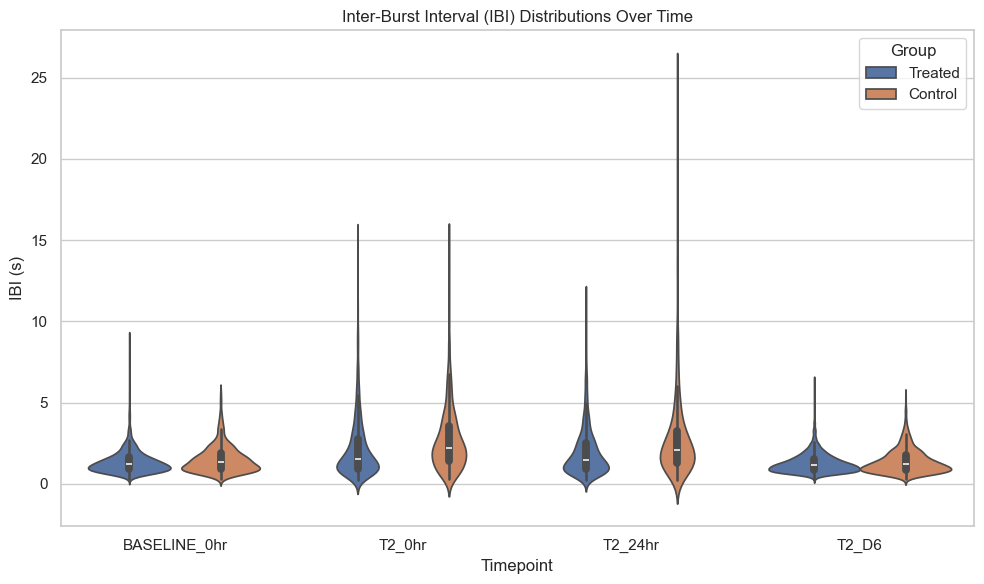

In [86]:
def extract_ibi_metrics(orc, dataset_groups, config=None):
    ibi_metrics = {group: {} for group in dataset_groups}

    for group, datasets in dataset_groups.items():
        for dataset_key in datasets:
            detector = orc.get_burst_detector(dataset_key, config)
            times, smoothed, peaks, peak_times, bursts, burst_windows = detector.compute_population_rate_and_bursts()

            if len(peak_times) < 2:
                continue

            # timepoint parsing
            parts = dataset_key.split("_")
            if "BASELINE" in parts:
                idx = parts.index("BASELINE")
                timepoint = "_".join(parts[idx:idx+2])
            elif "T2" in parts:
                idx = parts.index("T2")
                timepoint = "_".join(parts[idx:idx+2])
            else:
                timepoint = parts[-1]

            ibi_values = []
            for i in range(1, len(burst_windows)):
                ibi = burst_windows[i][0] - burst_windows[i-1][1]
                if ibi > 0:
                    ibi_values.append(ibi)

            if ibi_values:
                ibi_metrics[group].setdefault(timepoint, {"ibi": []})
                ibi_metrics[group][timepoint]["ibi"].extend(ibi_values)

    return ibi_metrics


def plot_ibi_violins(metrics, timepoint_order=None):
    ibi_data = []

    for group, timepoint_data in metrics.items():
        for tp, data in timepoint_data.items():
            for val in data.get("ibi", []):
                ibi_data.append({
                    "Group": group,
                    "Timepoint": tp,
                    "IBI (s)": val
                })

    if not ibi_data:
        print("No IBI data found after processing!")
        return

    df = pd.DataFrame(ibi_data)

    # need to apply timepoint order explicitly for now
    if timepoint_order:
        df["Timepoint"] = pd.Categorical(df["Timepoint"], categories=timepoint_order, ordered=True)

    # non-empty check
    print("Data prepared for plotting:")
    print(df.groupby(["Group", "Timepoint"]).size())

    plt.figure(figsize=(10, 6))
    sns.violinplot(x="Timepoint", y="IBI (s)", hue="Group", data=df, split=False, inner='box')
    plt.title("Inter-Burst Interval (IBI) Distributions Over Time")
    plt.xlabel("Timepoint")
    plt.ylabel("IBI (s)")
    plt.legend(title='Group')
    plt.tight_layout()
    plt.show()

config = {
    "bin_size_ms": 5.0,
    "threshold_rms": 1.7,
    "burst_edge_fraction": 0.5,
    "gauss_win_ms": 17.0,
    "square_win_ms": 5.0,
    "min_dist": 1950.0
}

timepoint_order = ["BASELINE_0hr", "T2_0hr", "T2_24hr", "T2_D6"]

ibi_df = extract_ibi_metrics(orc, dataset_groups, config)
plot_ibi_violins(ibi_df, timepoint_order)


In [91]:
#MaxOne Kolf

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dataset_groups = {
    "Treated": [
        "23128c_KOLFMO_D91_175µM_BASELINE_0hr",
        "23128c_KOLFMO_D92_175µM_T2_0hr",
        "23128c_KOLFMO_D93_175µM_T2_24hr",
        "23128c_KOLFMO_D98_175µM_T2_D6",
        
        "23192c_KOLFMO_D91_175µM_BASELINE_0hr",
        "23192c_KOLFMO_D92_175µM_T2_0hr",
        "23192c_KOLFMO_D93_175µM_T2_24hr",
        "23192c_KOLFMO_D98_175µM_T2_D6",
        
        "24430c_KOLFMO_D91_175µM_BASELINE_0hr",
        "24430c_KOLFMO_D92_175µM_T2_0hr",
        "24430c_KOLFMO_D93_175µM_T2_24hr",
        "24430c_KOLFMO_D98_175µM_T2_D6",
        
        "24535c_KOLFMO_D91_175µM_BASELINE_0hr",
        "24535c_KOLFMO_D92_175µM_T2_0hr",
        "24535c_KOLFMO_D93_175µM_T2_24hr",
        "24535c_KOLFMO_D98_175µM_T2_D6",
        
        "24648c_KOLFMO_D91_175µM_BASELINE_0hr",
        "24648c_KOLFMO_D92_175µM_T2_0hr",
        "24648c_KOLFMO_D93_175µM_T2_24hr",
        "24648c_KOLFMO_D98_175µM_T2_D6",
        
        "25168c_KOLFMO_D91_175µM_BASELINE_0hr",
        "25168c_KOLFMO_D92_175µM_T2_0hr",
        "25168c_KOLFMO_D93_175µM_T2_24hr"
    ],
    "Control": [
        "23178c_KOLFMO_D91_CONTROL_BASELINE_0hr",
        "23178c_KOLFMO_D92_CONTROL_T2_0hr",
        "23178c_KOLFMO_D93_CONTROL_T2_24hr",
        "23178c_KOLFMO_D98_CONTROL_T2_D6",
        
        "25159c_KOLFMO_D91_CONTROL_BASELINE_0hr",
        "25159c_KOLFMO_D92_CONTROL_T2_0hr",
        "25159c_KOLFMO_D93_CONTROL_T2_24hr",
        "25159c_KOLFMO_D98_CONTROL_T2_D6",
        
        "25168c_KOLFMO_D91_175µM_BASELINE_0hr",  
        "25168c_KOLFMO_D92_175µM_T2_0hr",        
        "25168c_KOLFMO_D93_175µM_T2_24hr",
        "25168c_KOLFMO_D98_CONTROL_T2_D6"
    ]
}

config = {
    "bin_size_ms": 5.0,
    "threshold_rms": 1.7,
    "burst_edge_fraction": 0.5,
    "gauss_win_ms": 17.0,
    "square_win_ms": 5.0,
    "min_dist": 1950.0
}

def extract_ibi_metrics_per_dataset(orc, dataset_groups, config):
    ibi_data = []
    for group_name, datasets in dataset_groups.items():
        for dataset in datasets:
            if dataset not in orc:
                continue
            dataset_data = orc[dataset]
            for tp, metrics in dataset_data.items():
                if isinstance(metrics, dict) and "ibi" in metrics:
                    for val in metrics["ibi"]:
                        ibi_data.append({
                            "Dataset": dataset,
                            "Group": group_name,
                            "Timepoint": tp,
                            "IBI (s)": val
                        })
    return pd.DataFrame(ibi_data)

def plot_ibi_violins(df):
    if df.empty:
        return

    plt.figure(figsize=(12, 6))
    sns.violinplot(
        data=df,
        x="Timepoint",
        y="IBI",
        hue="Group",
        inner="box",
        scale="width",
        cut=0,
        linewidth=1
    )

    plt.title("Inter-Burst Interval (IBI) Distributions Over Time", fontsize=16, weight='bold')
    plt.xlabel("Timepoint", fontsize=14)
    plt.ylabel("IBI (s)", fontsize=14)
    plt.xticks(rotation=45)
    plt.legend(title="Group", fontsize=10)
    plt.tight_layout()
    plt.show()

ibi_metrics = extract_ibi_metrics_per_dataset(orc, dataset_groups=dataset_groups, config=config)

plot_ibi_violins(ibi_metrics)

TypeError: argument of type 'OrchestratorPDx2' is not iterable

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_ibi_violins(metrics):
    # Extract the data directly
    timepoints = sorted({tp for g in metrics.values() for tp in g.keys()})
    groups = list(metrics.keys())

    ibi_values = []
    ibi_groups = []
    ibi_timepoints = []

    for group in groups:
        for tp in timepoints:
            if tp in metrics[group]:
                values = metrics[group][tp].get("ibi", [])
                ibi_values.extend(values)
                ibi_groups.extend([group] * len(values))
                ibi_timepoints.extend([tp] * len(values))

    # Plot without dataframe
    plt.figure(figsize=(10, 6))
    sns.violinplot(x=ibi_timepoints, y=ibi_values, hue=ibi_groups, split=False, inner='box')
    plt.title("IBI Distributions Over Time")
    plt.xlabel("Timepoint")
    plt.ylabel("Inter-Burst Interval (s)")
    plt.legend(title='Group')
    plt.tight_layout()
    plt.show()


In [23]:
# MaxTwo Kolf
config = {
    "bin_size_ms": 5.0,
    "threshold_rms": 1.7,
    "burst_edge_fraction": 0.25,
    "gauss_win_ms": 17.0,
    "square_win_ms": 9.0,
    "min_dist": 3000.0
}


dataset_groups = {
    "Control": [
        "MO6359s2_D53_Control_BASELINE_0hr",
        "MO6359s2_D55_Control_T2_24hr",
        "MO6359s2_D56_Control_T2_48hr",
        "MO6359s2_D57_Control_T2_72hr",
        "MO6359s2_D58_Control_T2_D4",
        "MO6359s2_D59_Control_T2_D5",
        "MO6359s2_D60_Control_T2_D6"
    ],
    "Treated": [
        "MO6359s6_D53_175µM_BASELINE_0hr",
        "MO6359s6_D55_175µM_T2_24hr",
        "MO6359s6_D56_175µM_T2_48hr",
        "MO6359s6_D57_175µM_T2_72hr",
        "MO6359s6_D58_175µM_T2_D4",
        "MO6359s6_D59_175µM_T2_D5",
        "MO6359s6_D60_175µM_T2_D6"
    ]
}

ibi_metrics = extract_ibi_metrics(orc, dataset_groups, config)

plot_ibi_violins(ibi_metrics)

ValueError: Dataset 'MO6359s2_D53_Control_BASELINE_0hr' not found.

In [93]:
# MaxOne Kolf

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def extract_ibi_metrics(orc, dataset_groups, config=None):
    ibi_metrics = {group: {} for group in dataset_groups}

    for group, datasets in dataset_groups.items():
        for dataset_key in datasets:
            detector = orc.get_burst_detector(dataset_key, config)
            times, smoothed, peaks, peak_times, bursts, burst_windows = detector.compute_population_rate_and_bursts()

            if len(peak_times) < 2:
                continue

            # Compute IBIs (time between bursts)
            ibi_values = []
            for i in range(1, len(burst_windows)):
                ibi = burst_windows[i][0] - burst_windows[i-1][1]
                if ibi > 0:
                    ibi_values.append(ibi)

            if ibi_values:
                timepoint = dataset_key.split("_")[-1]
                if timepoint not in ibi_metrics[group]:
                    ibi_metrics[group][timepoint] = {"ibi": []}
                ibi_metrics[group][timepoint]["ibi"].extend(ibi_values)

    return ibi_metrics

def plot_ibi_violins(metrics, timepoint_order=None):
    ibi_data = []

    for group, timepoint_data in metrics.items():
        for tp, data in timepoint_data.items():
            if isinstance(data, dict):  # Ensure it's the right type
                for val in data.get("ibi", []):
                    ibi_data.append({
                        "Group": group,
                        "Timepoint": tp,
                        "IBI (s)": val
                    })

    if not ibi_data:
        print("No IBI data found for plotting.")
        return

    df = pd.DataFrame(ibi_data)
    print(f"Plotting {len(df)} IBI values")  # Debug print

    # Use provided timepoint order or default
    if timepoint_order is None:
        timepoint_order = ["BASELINE_0hr", "T2_0hr", "T2_24hr", "T2_D6"]
    
    df["Timepoint"] = pd.Categorical(df["Timepoint"], categories=timepoint_order, ordered=True)

    # Plot
    plt.figure(figsize=(12, 6))
    sns.violinplot(data=df, x="Timepoint", y="IBI (s)", hue="Group", split=False, inner="box")
    plt.title("Inter-Burst Interval (IBI) Distributions Over Time")
    plt.xlabel("Timepoint")
    plt.ylabel("IBI (s)")
    plt.legend(title='Group')
    plt.tight_layout()
    plt.show()

Plotting 11096 IBI values


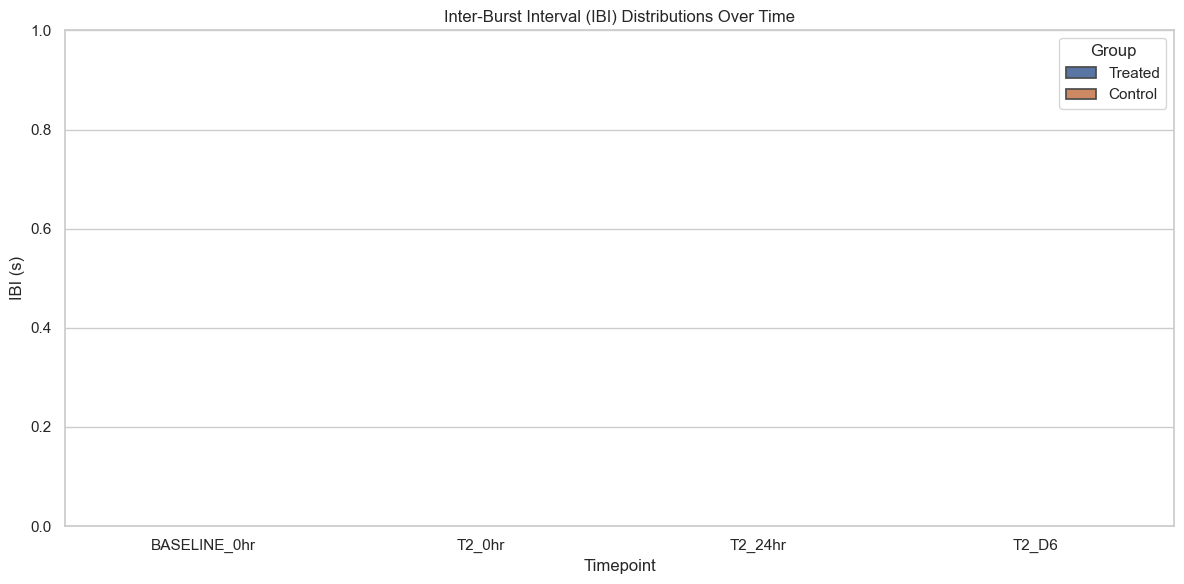

In [95]:
# MaxOne Kolf

config = {
    "bin_size_ms": 5.0,
    "threshold_rms": 1.7,
    "burst_edge_fraction": 0.5,
    "gauss_win_ms": 17.0,
    "square_win_ms": 5.0,
    "min_dist": 1950.0
}

dataset_groups = {
    "Treated": [
        "23128c_KOLFMO_D91_175µM_BASELINE_0hr",
        "23128c_KOLFMO_D92_175µM_T2_0hr",
        "23128c_KOLFMO_D93_175µM_T2_24hr",
        "23128c_KOLFMO_D98_175µM_T2_D6",
        
        "23192c_KOLFMO_D91_175µM_BASELINE_0hr",
        "23192c_KOLFMO_D92_175µM_T2_0hr",
        "23192c_KOLFMO_D93_175µM_T2_24hr",
        "23192c_KOLFMO_D98_175µM_T2_D6",
        
        "24430c_KOLFMO_D91_175µM_BASELINE_0hr",
        "24430c_KOLFMO_D92_175µM_T2_0hr",
        "24430c_KOLFMO_D93_175µM_T2_24hr",
        "24430c_KOLFMO_D98_175µM_T2_D6",
        
        "24535c_KOLFMO_D91_175µM_BASELINE_0hr",
        "24535c_KOLFMO_D92_175µM_T2_0hr",
        "24535c_KOLFMO_D93_175µM_T2_24hr",
        "24535c_KOLFMO_D98_175µM_T2_D6",
        
        "24648c_KOLFMO_D91_175µM_BASELINE_0hr",
        "24648c_KOLFMO_D92_175µM_T2_0hr",
        "24648c_KOLFMO_D93_175µM_T2_24hr",
        "24648c_KOLFMO_D98_175µM_T2_D6",
        
        "25168c_KOLFMO_D91_175µM_BASELINE_0hr",
        "25168c_KOLFMO_D92_175µM_T2_0hr",
        "25168c_KOLFMO_D93_175µM_T2_24hr"
    ],
    "Control": [
        "23178c_KOLFMO_D91_CONTROL_BASELINE_0hr",
        "23178c_KOLFMO_D92_CONTROL_T2_0hr",
        "23178c_KOLFMO_D93_CONTROL_T2_24hr",
        "23178c_KOLFMO_D98_CONTROL_T2_D6",
        
        "25159c_KOLFMO_D91_CONTROL_BASELINE_0hr",
        "25159c_KOLFMO_D92_CONTROL_T2_0hr",
        "25159c_KOLFMO_D93_CONTROL_T2_24hr",
        "25159c_KOLFMO_D98_CONTROL_T2_D6",
        
        "25168c_KOLFMO_D91_175µM_BASELINE_0hr",  
        "25168c_KOLFMO_D92_175µM_T2_0hr",        
        "25168c_KOLFMO_D93_175µM_T2_24hr",
        "25168c_KOLFMO_D98_175µM_T2_D6"        
    ]
}

ibi_df = extract_ibi_metrics(orc, dataset_groups, config)
plot_ibi_violins(ibi_df)

In [96]:
def extract_peak_centered_activity(orc, dataset_groups, config=None, window=5.0):
    all_metrics = {}
    common_times = np.linspace(-window, window, 200)

    for group, datasets in dataset_groups.items():
        all_metrics[group] = {}
        for dataset_key in datasets:
            detector = orc.get_burst_detector(dataset_key, config)
            times, smoothed, peaks, peak_times, bursts, burst_windows = detector.compute_population_rate_and_bursts()
            if len(peaks) == 0:
                continue

            # Align activity around each peak
            aligned_traces = []
            for p in peak_times:
                mask = (times >= p - window) & (times <= p + window)
                if np.any(mask):
                    t_segment = times[mask] - p
                    rate_segment = smoothed[mask]
                    interp = np.interp(common_times, t_segment, rate_segment, left=np.nan, right=np.nan)
                    aligned_traces.append(interp)

            # Extract timepoint from dataset key
            timepoint = next(tp for tp in ["BASELINE_0hr", "T2_0hr", "T2_24hr", "T2_D6"] if tp in dataset_key)
            if timepoint not in all_metrics[group]:
                all_metrics[group][timepoint] = []
            all_metrics[group][timepoint].extend(aligned_traces)

    return common_times, all_metrics

def plot_peak_centered_activity(common_times, peak_metrics):
    fig, axes = plt.subplots(1, 4, figsize=(20, 5), sharey=True)
    timepoints = ["BASELINE_0hr", "T2_0hr", "T2_24hr", "T2_D6"]

    for i, tp in enumerate(timepoints):
        ax = axes[i]
        for group, group_data in peak_metrics.items():
            if tp in group_data and len(group_data[tp]) > 0:
                data = np.nanmean(np.vstack(group_data[tp]), axis=0)
                ax.plot(common_times, data, label=group, linewidth=2)

        ax.axvline(0, color='k', linestyle='--', linewidth=1)
        ax.set_title(tp)
        ax.set_xlabel("Time from burst peak (s)")
        if i == 0:
            ax.set_ylabel("Mean population rate")
        ax.legend()

    plt.tight_layout()
    plt.show()


In [27]:
# MaxTwo Kolf

config = {
    "bin_size_ms": 5.0,
    "threshold_rms": 1.7,
    "burst_edge_fraction": 0.25,
    "gauss_win_ms": 17.0,
    "square_win_ms": 9.0,
    "min_dist": 3000.0
}


dataset_groups = {
    "Control": [
        "MO6359s2_D53_Control_BASELINE_0hr",
        "MO6359s2_D55_Control_T2_24hr",
        "MO6359s2_D56_Control_T2_48hr",
        "MO6359s2_D57_Control_T2_72hr",
        "MO6359s2_D58_Control_T2_D4",
        "MO6359s2_D59_Control_T2_D5",
        "MO6359s2_D60_Control_T2_D6"
    ],
    "Treated": [
        "MO6359s6_D53_175µM_BASELINE_0hr",
        "MO6359s6_D55_175µM_T2_24hr",
        "MO6359s6_D56_175µM_T2_48hr",
        "MO6359s6_D57_175µM_T2_72hr",
        "MO6359s6_D58_175µM_T2_D4",
        "MO6359s6_D59_175µM_T2_D5",
        "MO6359s6_D60_175µM_T2_D6"
    ]
}

common_times, peak_metrics = extract_peak_centered_activity(orc, dataset_groups, config)
plot_peak_centered_activity(common_times, peak_metrics)

ValueError: Dataset 'MO6359s2_D53_Control_BASELINE_0hr' not found.

In [97]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.pyplot as plt
import numpy as np

def plot_peak_centered_activity(common_times, peak_metrics):
    timepoints = ["BASELINE_0hr", "T2_24", "T2_48hr", "T2_72hr", "T2_D4", "T2_D5", "T2_D6"]
    
    # Dynamically create subplots based on number of timepoints
    n_timepoints = len(timepoints)
    fig, axes = plt.subplots(1, n_timepoints, figsize=(4*n_timepoints, 4), sharey=True)
    
    # Ensure axes is always iterable
    if n_timepoints == 1:
        axes = [axes]
    
    for i, tp in enumerate(timepoints):
        ax = axes[i]
        for group, group_data in peak_metrics.items():
            if tp in group_data and len(group_data[tp]) > 0:
                data = np.nanmean(np.vstack(group_data[tp]), axis=0)
                ax.plot(common_times, data, label=group)
        
        ax.axvline(0, color='k', linestyle='--')
        ax.set_title(tp)
        ax.set_xlabel("Time from burst peak (s)")
        if i == 0:
            ax.set_ylabel("Mean population rate")
        ax.legend()
    
    plt.tight_layout()
    plt.show()


In [98]:
# MaxTwo Kolf
config = {
    "bin_size_ms": 5.0,
    "threshold_rms": 1.7,
    "burst_edge_fraction": 0.25,
    "gauss_win_ms": 17.0,
    "square_win_ms": 9.0,
    "min_dist": 3000.0
}


dataset_groups = {
    "Control": [
        "MO6359s2_D53_Control_BASELINE_0hr",
        "MO6359s2_D55_Control_T2_24hr",
        "MO6359s2_D56_Control_T2_48hr",
        "MO6359s2_D57_Control_T2_72hr",
        "MO6359s2_D58_Control_T2_D4",
        "MO6359s2_D59_Control_T2_D5",
        "MO6359s2_D60_Control_T2_D6"
    ],
    "Treated": [
        "MO6359s6_D53_175µM_BASELINE_0hr",
        "MO6359s6_D55_175µM_T2_24hr",
        "MO6359s6_D56_175µM_T2_48hr",
        "MO6359s6_D57_175µM_T2_72hr",
        "MO6359s6_D58_175µM_T2_D4",
        "MO6359s6_D59_175µM_T2_D5",
        "MO6359s6_D60_175µM_T2_D6"
    ]
}

common_times, peak_metrics = extract_peak_centered_activity(orc, dataset_groups, config)
plot_peak_centered_activity(common_times, peak_metrics)

ValueError: Dataset 'MO6359s2_D53_Control_BASELINE_0hr' not found.

In [ ]:
# MaxOne Kolf

import numpy as np
import matplotlib.pyplot as plt

config = {
    "bin_size_ms": 5.0,
    "threshold_rms": 1.7,
    "burst_edge_fraction": 0.5,
    "gauss_win_ms": 17.0,
    "square_win_ms": 5.0,
    "min_dist": 1950.0
}

dataset_groups = {
    "Treated": [
        "23128c_KOLFMO_D91_175µM_BASELINE_0hr",
        "23128c_KOLFMO_D92_175µM_T2_0hr",
        "23128c_KOLFMO_D93_175µM_T2_24hr",
        "23128c_KOLFMO_D98_175µM_T2_D6",
        
        "23192c_KOLFMO_D91_175µM_BASELINE_0hr",
        "23192c_KOLFMO_D92_175µM_T2_0hr",
        "23192c_KOLFMO_D93_175µM_T2_24hr",
        "23192c_KOLFMO_D98_175µM_T2_D6",
        
        "24430c_KOLFMO_D91_175µM_BASELINE_0hr",
        "24430c_KOLFMO_D92_175µM_T2_0hr",
        "24430c_KOLFMO_D93_175µM_T2_24hr",
        "24430c_KOLFMO_D98_175µM_T2_D6",
        
        "24535c_KOLFMO_D91_175µM_BASELINE_0hr",
        "24535c_KOLFMO_D92_175µM_T2_0hr",
        "24535c_KOLFMO_D93_175µM_T2_24hr",
        "24535c_KOLFMO_D98_175µM_T2_D6",
        
        "24648c_KOLFMO_D91_175µM_BASELINE_0hr",
        "24648c_KOLFMO_D92_175µM_T2_0hr",
        "24648c_KOLFMO_D93_175µM_T2_24hr",
        "24648c_KOLFMO_D98_175µM_T2_D6",
        
        "25168c_KOLFMO_D91_175µM_BASELINE_0hr",
        "25168c_KOLFMO_D92_175µM_T2_0hr",
        "25168c_KOLFMO_D93_175µM_T2_24hr"
    ],
    "Control": [
        "23178c_KOLFMO_D91_CONTROL_BASELINE_0hr",
        "23178c_KOLFMO_D92_CONTROL_T2_0hr",
        "23178c_KOLFMO_D93_CONTROL_T2_24hr",
        "23178c_KOLFMO_D98_CONTROL_T2_D6",
        
        "25159c_KOLFMO_D91_CONTROL_BASELINE_0hr",
        "25159c_KOLFMO_D92_CONTROL_T2_0hr",
        "25159c_KOLFMO_D93_CONTROL_T2_24hr",
        "25159c_KOLFMO_D98_CONTROL_T2_D6",
        
        "25168c_KOLFMO_D91_175µM_BASELINE_0hr",  
        "25168c_KOLFMO_D92_175µM_T2_0hr",        
        "25168c_KOLFMO_D93_175µM_T2_24hr",
        "25168c_KOLFMO_D98_175µM_T2_D6"        
    ]
}


# extraction function

def plot_peak_centered_activity_grouped_separate(common_times, peak_metrics, save=False, save_dir="peak_plots"):
    """
    Generates one figure per group, with 3-4 adjacent panels each.
    Displays and optionally saves them one at a time to avoid scaling distortion.
    """
    if save:
        os.makedirs(save_dir, exist_ok=True)

    for group_name, datasets in peak_metrics.items():
        num_datasets = len(datasets)
        if num_datasets == 0:
            print(f"Skipping {group_name}: no data available.")
            continue

        # each figure large enough for 4 panels
        fig, axes = plt.subplots(1, num_datasets, figsize=(5*num_datasets, 5), sharey=True)
        if num_datasets == 1:
            axes = [axes]

        for ax, (dataset_key, traces) in zip(axes, datasets.items()):
            if traces:
                mean_trace = np.nanmean(np.vstack(traces), axis=0)
                ax.plot(common_times, mean_trace, label=dataset_key, linewidth=2)
                ax.axvline(0, color='k', linestyle='--', linewidth=1)
                ax.set_title(dataset_key, fontsize=10)
            else:
                ax.set_title(f"{dataset_key}\n(No bursts detected)", fontsize=10)

            ax.set_xlabel("Time from burst peak (s)")
            ax.set_ylabel("Mean population rate")

        fig.suptitle(f"Peak-Centered Activity — {group_name}", fontsize=14)
        plt.tight_layout()

        
        if save:
            filename = f"PeakCenteredActivity_{group_name.replace(' ', '_')}.png"
            plt.savefig(os.path.join(save_dir, filename), dpi=300)
            print(f"Saved: {filename}")

        plt.show()   


def plot_peak_centered_activity_grouped(common_times, peak_metrics):
    """
    Generates one figure per experimental group.
    Each figure contains 3-4 adjacent panels (subplots),
    one for each dataset (timepoint recording) in that group.
    """
    for group_name, datasets in peak_metrics.items():
        num_datasets = len(datasets)
        if num_datasets == 0:
            print(f"Skipping {group_name}: no data available.")
            continue

        fig, axes = plt.subplots(1, num_datasets, figsize=(5*num_datasets, 5), sharey=True)

        if num_datasets == 1:
            axes = [axes]

        for ax, (dataset_key, traces) in zip(axes, datasets.items()):
            if traces:
                mean_trace = np.nanmean(np.vstack(traces), axis=0)
                ax.plot(common_times, mean_trace, label=dataset_key, linewidth=2)
                ax.axvline(0, color='k', linestyle='--', linewidth=1)
                ax.set_title(dataset_key, fontsize=10)
            else:
                ax.set_title(f"{dataset_key}\n(No bursts detected)", fontsize=10)

            ax.set_xlabel("Time from burst peak (s)")
            ax.set_ylabel("Mean population rate")

        fig.suptitle(f"Peak-Centered Activity — {group_name}", fontsize=14)
        plt.tight_layout()
        plt.show()


common_times, peak_metrics = extract_peak_centered_activity_grouped(
    orc, dataset_groups, config=config, window=5.0
)

plot_peak_centered_activity_grouped_separate(common_times, peak_metrics, save=True)

NameError: name 'extract_peak_centered_activity_grouped' is not defined

In [100]:
import numpy as np
import matplotlib.pyplot as plt

def plot_peak_centered_individual(peak_metrics, common_times):
    """
    Plots all individual peak-centered bursts for Control and Treated groups,
    with mean (solid) and ±1 std (dashed) lines.
    """
    timepoints = ["BASELINE_0hr", "T2_24", "T2_48hr", "T2_72hr", "T2_D4", "T2_D5", "T2_D6"]
    colors = {
        "BASELINE_0hr": "tab:blue",
        "T2_24hr": "tab:orange",
        "T2_72hr": "tab:green",
        "T2_D6": "tab:red"
    }

    fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)
    groups = ["Control", "Treated"]

    for ax, group in zip(axes, groups):
        for tp in timepoints:
            if tp in peak_metrics[group] and len(peak_metrics[group][tp]) > 0:
                bursts = np.vstack(peak_metrics[group][tp])  # shape: (n_bursts, n_timepoints)
                mean_trace = np.nanmean(bursts, axis=0)
                std_trace = np.nanstd(bursts, axis=0)

                # Plot all individual bursts (transparent)
                for burst in bursts:
                    ax.plot(common_times, burst, color=colors[tp], alpha=0.2, linewidth=0.8)

                # Plot mean (solid) and std (dashed)
                ax.plot(common_times, mean_trace, color=colors[tp], label=f"{tp}")
                ax.plot(common_times, mean_trace + std_trace, color=colors[tp], linestyle='--', linewidth=1)
                ax.plot(common_times, mean_trace - std_trace, color=colors[tp], linestyle='--', linewidth=1)

        ax.axvline(0, color='k', linestyle='--', linewidth=1)
        ax.set_title(group)
        ax.set_xlabel("Time from burst peak (s)")
        ax.set_ylabel("Population rate (Hz)")
        ax.legend()

    plt.suptitle("Peak-Centered Population Activity with Individual Bursts ± STD")
    plt.tight_layout()
    plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_peak_centered_individual_split(peak_metrics, common_times):
    """
    Plots all individual peak-centered bursts for Control and Treated in separate panels.
    Adds dashed lines for mean ± std.
    """
    timepoints = ["BASELINE_0hr",  "T2_48hr", "T2_72hr", "T2_D4", "T2_D5", "T2_D6"]
    groups = ["Control", "Treated"]
    colors = {"Control": "blue", "Treated": "red"}

    fig, axes = plt.subplots(len(timepoints), len(groups), figsize=(14, 12), sharex=True, sharey=True)

    for i, tp in enumerate(timepoints):
        for j, group in enumerate(groups):
            ax = axes[i, j]
            bursts = peak_metrics.get(group, {}).get(tp, [])
            if len(bursts) == 0:
                ax.set_title(f"{group} - {tp}\nNo data")
                continue

            bursts = np.vstack(bursts)
            for burst in bursts:
                ax.plot(common_times, burst, color=colors[group], alpha=0.2)

            mean_trace = np.nanmean(bursts, axis=0)
            std_trace = np.nanstd(bursts, axis=0)

            ax.plot(common_times, mean_trace, color=colors[group], linewidth=2)
            ax.plot(common_times, mean_trace + std_trace, color=colors[group], linestyle="--", linewidth=1)
            ax.plot(common_times, mean_trace - std_trace, color=colors[group], linestyle="--", linewidth=1)

            ax.set_title(f"{group} - {tp}")
            if i == len(timepoints) - 1:
                ax.set_xlabel("Time (s, centered on peak)")
            if j == 0:
                ax.set_ylabel("Firing rate (Hz)")

    plt.tight_layout()
    plt.show()
    

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_peak_centered_individual_clean(peak_metrics, common_times):
    """
    Creates a grid of subplots with:
      - Separate panels for each group (Control/Treated) and timepoint
      - All individual bursts (very transparent)
      - Dashed lines for mean ± std
    """
    timepoints = ["BASELINE_0hr", "T2_48hr", "T2_72hr", "T2_D4", "T2_D5", "T2_D6"]
    groups = ["Control", "Treated"]
    colors = {"Control": "blue", "Treated": "red"}

    fig, axes = plt.subplots(len(timepoints), len(groups), figsize=(12, 10), sharex=True, sharey=True)

    for i, tp in enumerate(timepoints):
        for j, group in enumerate(groups):
            ax = axes[i, j]
            bursts = peak_metrics.get(group, {}).get(tp, [])
            if len(bursts) == 0:
                ax.set_title(f"{group} - {tp}\nNo data")
                continue

            bursts = np.vstack(bursts)
            
            # Plot individual bursts with more transparency
            for burst in bursts:
                ax.plot(common_times, burst, color=colors[group], alpha=0.03)

            # Compute mean ± std
            mean_trace = np.nanmean(bursts, axis=0)
            std_trace = np.nanstd(bursts, axis=0)

            # Mean trace
            ax.plot(common_times, mean_trace, color=colors[group], linewidth=2)
            # ±STD as dashed lines
            ax.plot(common_times, mean_trace + std_trace, color=colors[group], linestyle="--", linewidth=1.5)
            ax.plot(common_times, mean_trace - std_trace, color=colors[group], linestyle="--", linewidth=1.5)

            ax.axvline(0, color="black", linestyle="--", linewidth=1)
            ax.set_title(f"{group} - {tp}")
            if i == len(timepoints) - 1:
                ax.set_xlabel("Time (s, centered on peak)")
            if j == 0:
                ax.set_ylabel("Firing rate (Hz)")

    plt.tight_layout()
    plt.show()

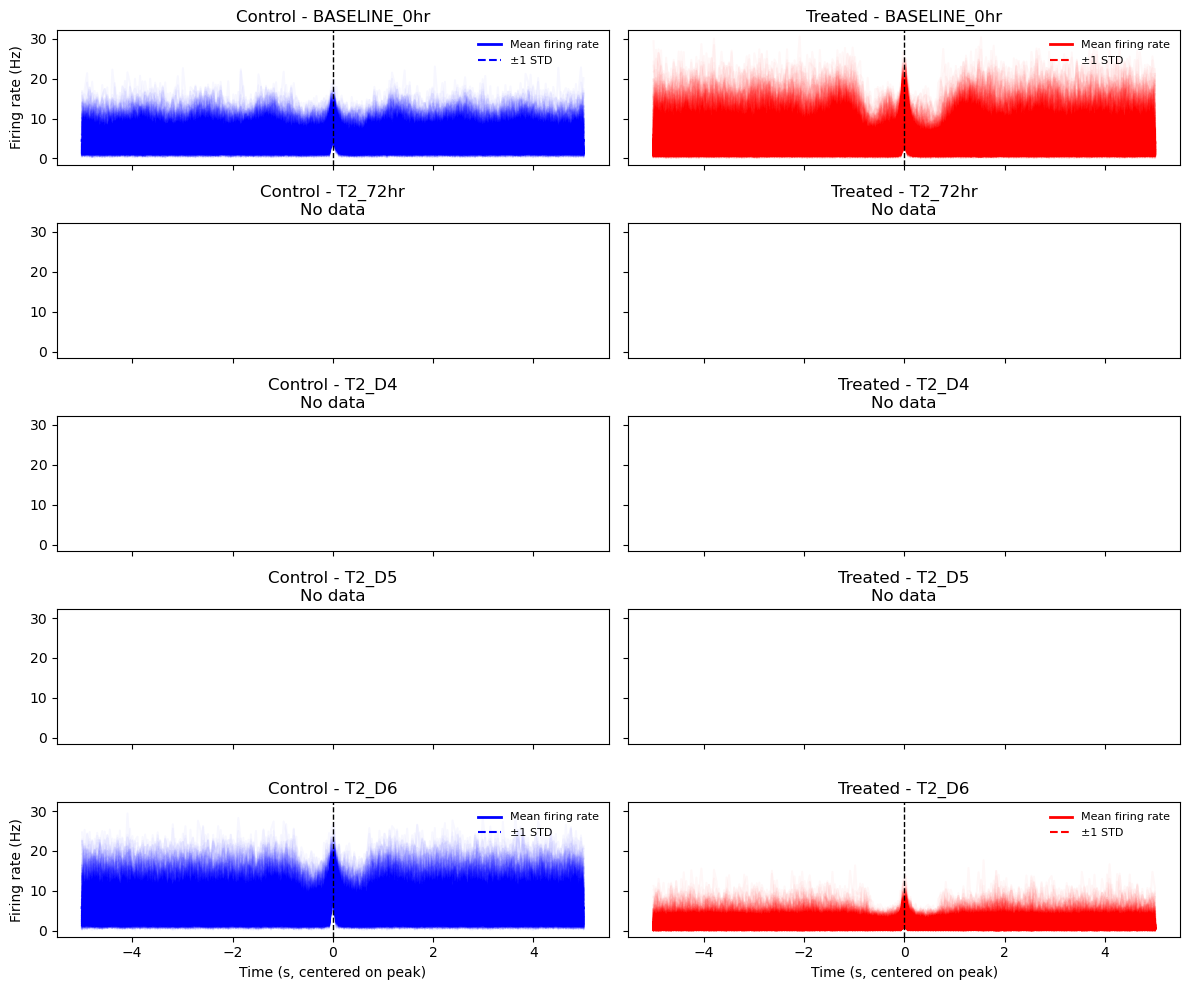

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_peak_centered_individual_with_legends(peak_metrics, common_times):
    """
    Creates subplots with:
      - Individual bursts (transparent)
      - Mean (bold line)
      - ±STD (dashed)
      - Legend inside each subplot
    """
    timepoints = ["BASELINE_0hr",  "T2_72hr", "T2_D4", "T2_D5", "T2_D6"]
    groups = ["Control", "Treated"]
    colors = {"Control": "blue", "Treated": "red"}

    fig, axes = plt.subplots(len(timepoints), len(groups), figsize=(12, 10), sharex=True, sharey=True)

    for i, tp in enumerate(timepoints):
        for j, group in enumerate(groups):
            ax = axes[i, j]
            bursts = peak_metrics.get(group, {}).get(tp, [])
            if len(bursts) == 0:
                ax.set_title(f"{group} - {tp}\nNo data")
                continue

            bursts = np.vstack(bursts)
            
            # lot individual transparent bursts
            for burst in bursts:
                ax.plot(common_times, burst, color=colors[group], alpha=0.03)

            # compute mean ± std
            mean_trace = np.nanmean(bursts, axis=0)
            std_trace = np.nanstd(bursts, axis=0)

            # plot mean in bolded
            mean_line, = ax.plot(common_times, mean_trace, color=colors[group], linewidth=2, label="Mean firing rate")
            # plot ±STD as dashed
            std_upper, = ax.plot(common_times, mean_trace + std_trace, color=colors[group], linestyle="--", linewidth=1.5, label="±1 STD")
            ax.plot(common_times, mean_trace - std_trace, color=colors[group], linestyle="--", linewidth=1.5)

            # mark peak
            ax.axvline(0, color="black", linestyle="--", linewidth=1)

            ax.set_title(f"{group} - {tp}")
            if i == len(timepoints) - 1:
                ax.set_xlabel("Time (s, centered on peak)")
            if j == 0:
                ax.set_ylabel("Firing rate (Hz)")

            # insert legends into subplots
            ax.legend(handles=[mean_line, std_upper], loc="upper right", fontsize=8, frameon=False)

    plt.tight_layout()
    plt.show()

common_times, peak_metrics = extract_peak_centered_activity(orc, dataset_groups, config)

plot_peak_centered_individual_with_legends(peak_metrics, common_times)



In [ ]:
# MaxOne Kolf

config = {
    "bin_size_ms": 5.0,
    "threshold_rms": 1.7,
    "burst_edge_fraction": 0.5,
    "gauss_win_ms": 17.0,
    "square_win_ms": 5.0,
    "min_dist": 1950.0
}

dataset_groups = {
    "Control": [
        "23178c_KOLFMO_D91_CONTROL_BASELINE_0hr",
        "23178c_KOLFMO_D92_CONTROL_T2_0hr",
        "23178c_KOLFMO_D93_CONTROL_T2_24hr",
        "23178c_KOLFMO_D98_CONTROL_T2_D6",
        "25159c_KOLFMO_D91_CONTROL_BASELINE_0hr",
        "25159c_KOLFMO_D92_CONTROL_T2_0hr",
        "25159c_KOLFMO_D93_CONTROL_T2_24hr",
        "25159c_KOLFMO_D98_CONTROL_T2_D6"
    ],
    "Treated": [
        "23128c_KOLFMO_D91_175µM_BASELINE_0hr",
        "23128c_KOLFMO_D92_175µM_T2_0hr",
        "23128c_KOLFMO_D93_175µM_T2_24hr",
        "23128c_KOLFMO_D98_175µM_T2_D6",
        "23192c_KOLFMO_D91_175µM_BASELINE_0hr",
        "23192c_KOLFMO_D92_175µM_T2_0hr",
        "23192c_KOLFMO_D93_175µM_T2_24hr",
        "23192c_KOLFMO_D98_175µM_T2_D6",
        "24430c_KOLFMO_D91_175µM_BASELINE_0hr",
        "24430c_KOLFMO_D92_175µM_T2_0hr",
        "24430c_KOLFMO_D93_175µM_T2_24hr",
        "24430c_KOLFMO_D98_175µM_T2_D6",
        "24535c_KOLFMO_D91_175µM_BASELINE_0hr",
        "24535c_KOLFMO_D92_175µM_T2_0hr",
        "24535c_KOLFMO_D93_175µM_T2_24hr",
        "24535c_KOLFMO_D98_175µM_T2_D6",
        "24648c_KOLFMO_D91_175µM_BASELINE_0hr",
        "24648c_KOLFMO_D92_175µM_T2_0hr",
        "24648c_KOLFMO_D93_175µM_T2_24hr",
        "24648c_KOLFMO_D98_175µM_T2_D6",
        "25168c_KOLFMO_D91_175µM_BASELINE_0hr",
        "25168c_KOLFMO_D92_175µM_T2_0hr",
        "25168c_KOLFMO_D93_175µM_T2_24hr",
        "25168c_KOLFMO_D98_175µM_T2_D6"
    ]
}

timepoint_order = ["BASELINE_0hr", "T2_0hr", "T2_24hr", "T2_D6"]

burst_widths = extract_all_burst_widths(orc, dataset_groups, config)
plot_burst_width_violins(burst_widths)


Burst counts per dataset:
Control | 23178c_KOLFMO_D91_CONTROL_BASELINE_0hr: 346 bursts
Control | 23178c_KOLFMO_D92_CONTROL_T2_0hr: 248 bursts
Control | 23178c_KOLFMO_D93_CONTROL_T2_24hr: 248 bursts
Control | 23178c_KOLFMO_D98_CONTROL_T2_D6: 418 bursts
Control | 25159c_KOLFMO_D91_CONTROL_BASELINE_0hr: 337 bursts
Control | 25159c_KOLFMO_D92_CONTROL_T2_0hr: 168 bursts
Control | 25159c_KOLFMO_D93_CONTROL_T2_24hr: 138 bursts
Control | 25159c_KOLFMO_D98_CONTROL_T2_D6: 420 bursts
Treated | 23128c_KOLFMO_D91_175µM_BASELINE_0hr: 322 bursts
Treated | 23128c_KOLFMO_D92_175µM_T2_0hr: 235 bursts
Treated | 23128c_KOLFMO_D93_175µM_T2_24hr: 270 bursts
Treated | 23128c_KOLFMO_D98_175µM_T2_D6: 529 bursts
Treated | 23192c_KOLFMO_D91_175µM_BASELINE_0hr: 375 bursts
Treated | 23192c_KOLFMO_D92_175µM_T2_0hr: 344 bursts
Treated | 23192c_KOLFMO_D93_175µM_T2_24hr: 349 bursts
Treated | 23192c_KOLFMO_D98_175µM_T2_D6: 516 bursts
Treated | 24430c_KOLFMO_D91_175µM_BASELINE_0hr: 408 bursts
Treated | 24430c_KOLFMO_D9

NameError: name 'plot_burst_width_violins' is not defined

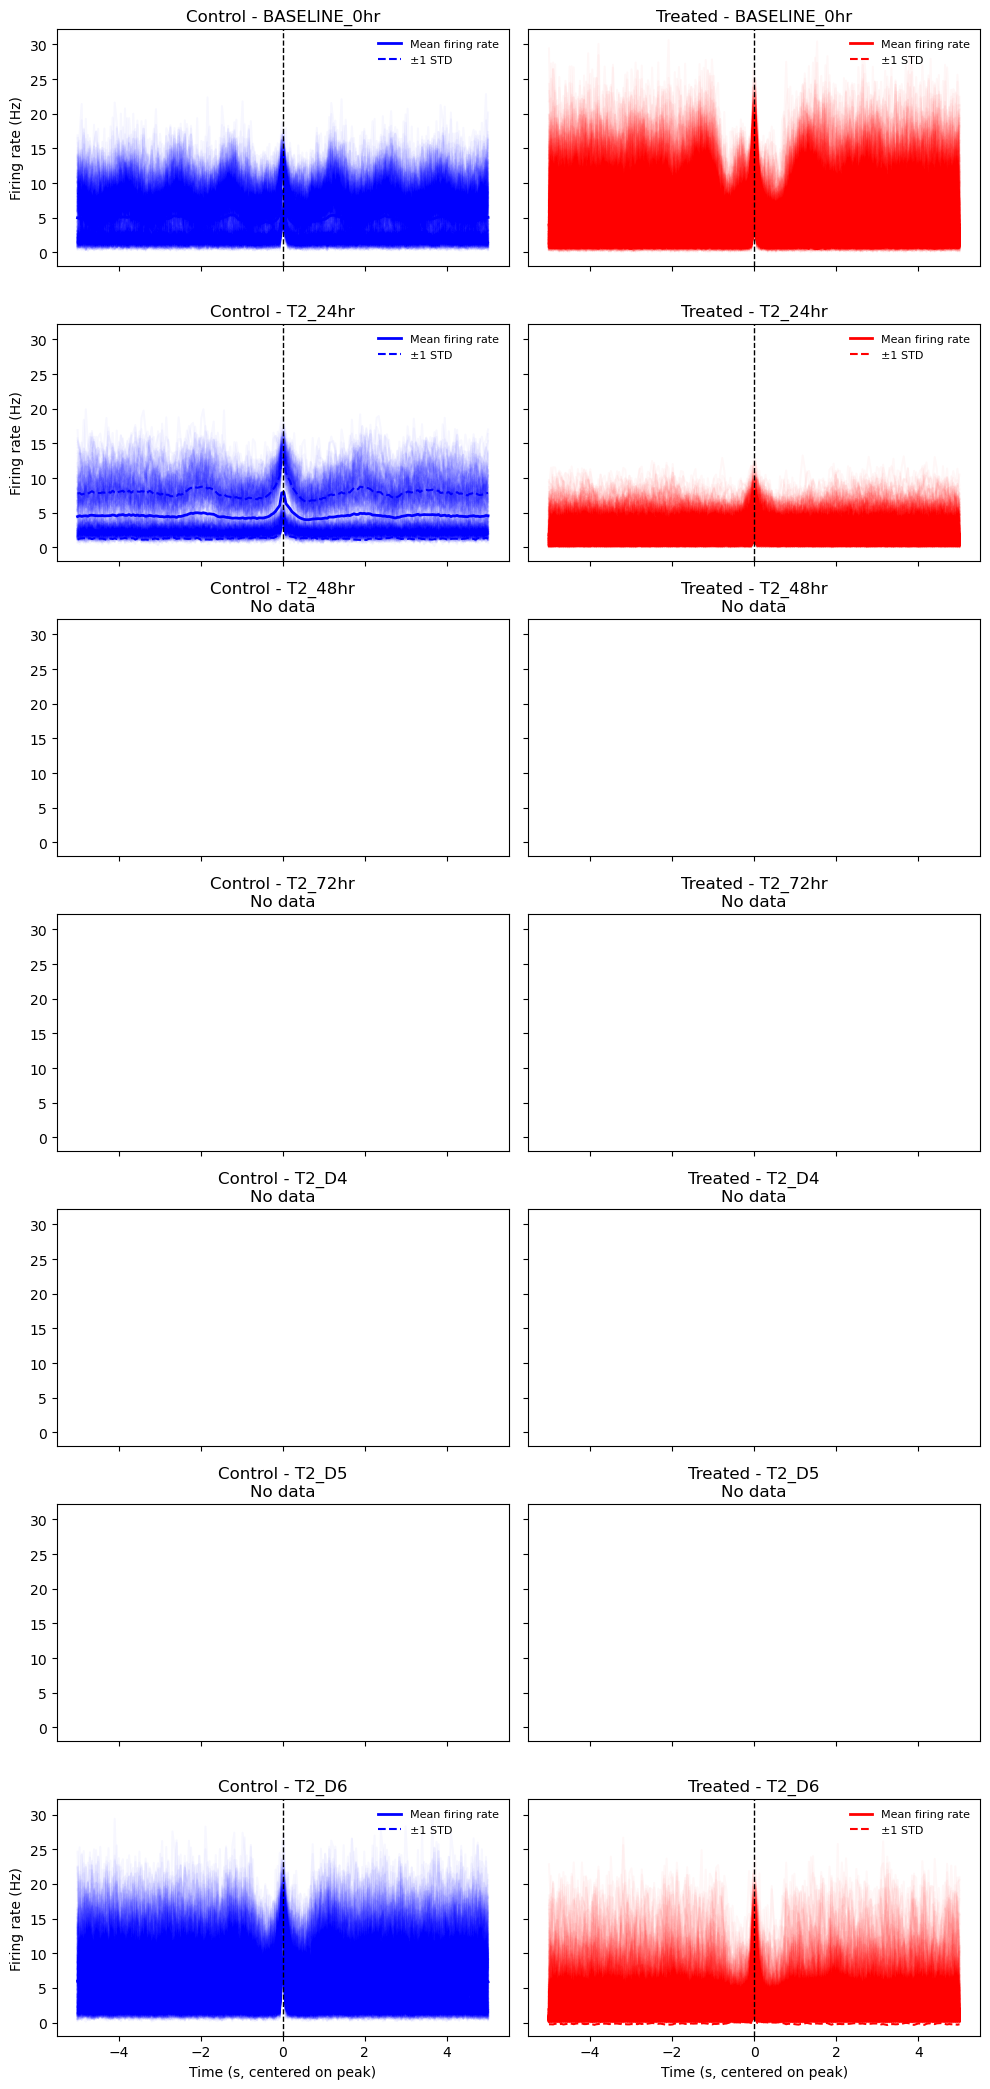

In [35]:
import matplotlib.pyplot as plt
import numpy as np
import math

def plot_peak_centered_individual_with_legends(peak_metrics, common_times):
    """
    Creates subplots with:
      - Individual bursts (transparent)
      - Mean (bold line)
      - ±STD (dashed)
      - Legend inside each subplot
    """
    timepoints = ["BASELINE_0hr", "T2_24hr", "T2_48hr", "T2_72hr", "T2_D4", "T2_D5", "T2_D6"]
    groups = ["Control", "Treated"]
    colors = {"Control": "blue", "Treated": "red"}

    n_timepoints = len(timepoints)
    n_cols = len(groups)
    n_rows = n_timepoints

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 3*n_rows), sharex=True, sharey=True)
    axes = np.array(axes).reshape(n_rows, n_cols)

    for i, tp in enumerate(timepoints):
        for j, group in enumerate(groups):
            ax = axes[i, j]
            bursts = peak_metrics.get(group, {}).get(tp, [])
            if len(bursts) == 0:
                ax.set_title(f"{group} - {tp}\nNo data")
                continue

            bursts = np.vstack(bursts)

            # Plot individual bursts (transparent)
            for burst in bursts:
                ax.plot(common_times, burst, color=colors[group], alpha=0.03)

            # Compute mean ± std
            mean_trace = np.nanmean(bursts, axis=0)
            std_trace = np.nanstd(bursts, axis=0)

            # Plot mean and ±STD
            mean_line, = ax.plot(common_times, mean_trace, color=colors[group], linewidth=2, label="Mean firing rate")
            std_upper, = ax.plot(common_times, mean_trace + std_trace, color=colors[group], linestyle="--", linewidth=1.5, label="±1 STD")
            ax.plot(common_times, mean_trace - std_trace, color=colors[group], linestyle="--", linewidth=1.5)

            # Peak marker
            ax.axvline(0, color="black", linestyle="--", linewidth=1)

            ax.set_title(f"{group} - {tp}")
            if i == n_timepoints - 1:
                ax.set_xlabel("Time (s, centered on peak)")
            if j == 0:
                ax.set_ylabel("Firing rate (Hz)")

            # Legend
            ax.legend(handles=[mean_line, std_upper], loc="upper right", fontsize=8, frameon=False)

    plt.tight_layout()
    plt.show()
common_times, peak_metrics = extract_peak_centered_activity(orc, dataset_groups, config)

plot_peak_centered_individual_with_legends(peak_metrics, common_times)


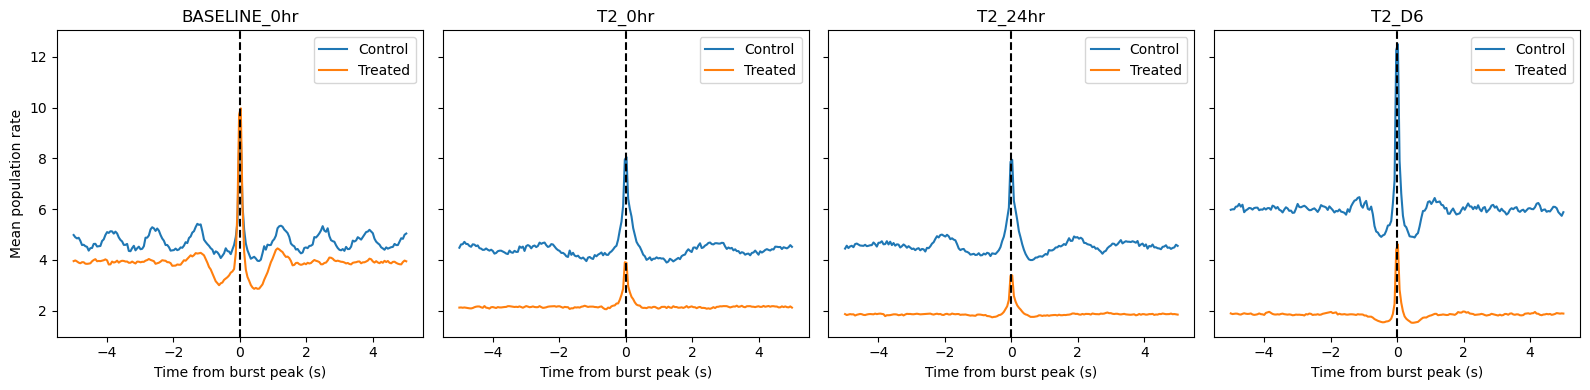

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math

def plot_peak_centered_activity(common_times, peak_metrics):
    timepoints = ["BASELINE_0hr", "T2_0hr", "T2_24hr", "T2_D6"]
    
    n_timepoints = len(timepoints)
    
    # determine number of rows and columns outright
    n_cols = 4 if n_timepoints > 4 else n_timepoints
    n_rows = math.ceil(n_timepoints / n_cols)
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(4*n_cols, 4*n_rows), sharey=True)
    axes = np.array(axes).reshape(-1)  # flatten axes to make indexing easier

    for i, tp in enumerate(timepoints):
        ax = axes[i]
        for group, group_data in peak_metrics.items():
            if tp in group_data and len(group_data[tp]) > 0:
                data = np.nanmean(np.vstack(group_data[tp]), axis=0)
                ax.plot(common_times, data, label=group)
        
        ax.axvline(0, color='k', linestyle='--')
        ax.set_title(tp)
        ax.set_xlabel("Time from burst peak (s)")
        if i % n_cols == 0:
            ax.set_ylabel("Mean population rate")
        ax.legend()
    
    # if timepoints < grid size, hide axes
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()
common_times, peak_metrics = extract_peak_centered_activity(orc, dataset_groups, config)

plot_peak_centered_activity(common_times, peak_metrics)


Saved: PeakCenteredOverlay_Treated.png


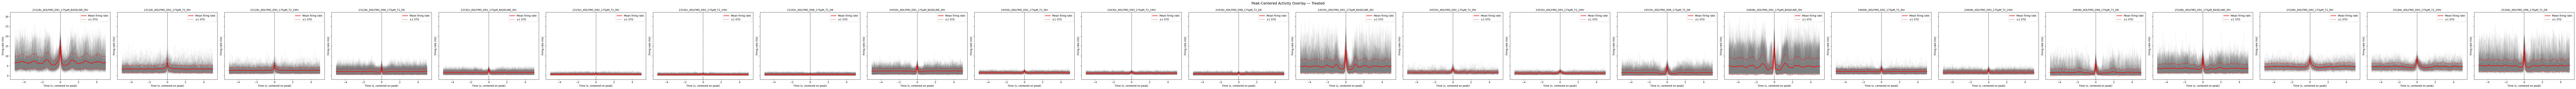

Saved: PeakCenteredOverlay_Control.png


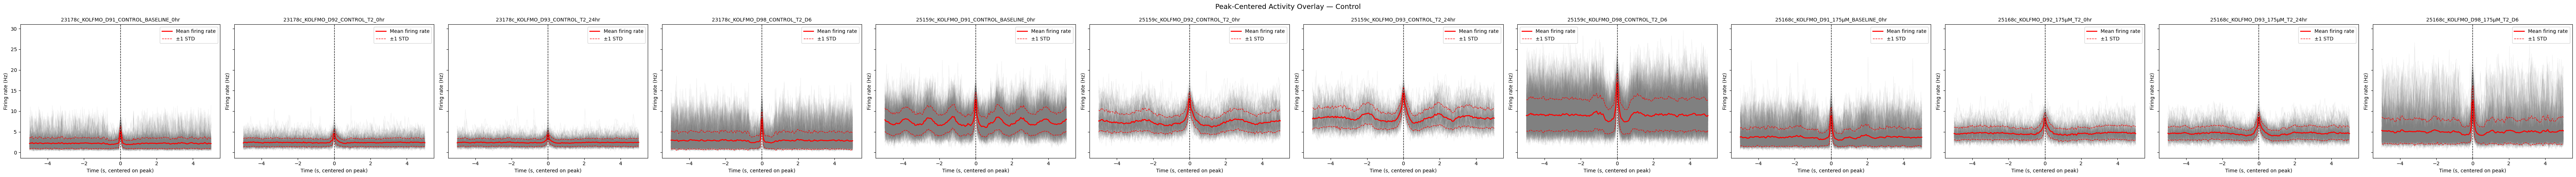

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
import os

config = {
    "bin_size_ms": 5.0,
    "threshold_rms": 1.7,
    "burst_edge_fraction": 0.5,
    "gauss_win_ms": 17.0,
    "square_win_ms": 5.0,
    "min_dist": 1950.0
}

dataset_groups = {
    "Treated": [
        "23128c_KOLFMO_D91_175µM_BASELINE_0hr",
        "23128c_KOLFMO_D92_175µM_T2_0hr",
        "23128c_KOLFMO_D93_175µM_T2_24hr",
        "23128c_KOLFMO_D98_175µM_T2_D6",

        "23192c_KOLFMO_D91_175µM_BASELINE_0hr",
        "23192c_KOLFMO_D92_175µM_T2_0hr",
        "23192c_KOLFMO_D93_175µM_T2_24hr",
        "23192c_KOLFMO_D98_175µM_T2_D6",

        "24430c_KOLFMO_D91_175µM_BASELINE_0hr",
        "24430c_KOLFMO_D92_175µM_T2_0hr",
        "24430c_KOLFMO_D93_175µM_T2_24hr",
        "24430c_KOLFMO_D98_175µM_T2_D6",

        "24535c_KOLFMO_D91_175µM_BASELINE_0hr",
        "24535c_KOLFMO_D92_175µM_T2_0hr",
        "24535c_KOLFMO_D93_175µM_T2_24hr",
        "24535c_KOLFMO_D98_175µM_T2_D6",

        "24648c_KOLFMO_D91_175µM_BASELINE_0hr",
        "24648c_KOLFMO_D92_175µM_T2_0hr",
        "24648c_KOLFMO_D93_175µM_T2_24hr",
        "24648c_KOLFMO_D98_175µM_T2_D6",

        "25168c_KOLFMO_D91_175µM_BASELINE_0hr",
        "25168c_KOLFMO_D92_175µM_T2_0hr",
        "25168c_KOLFMO_D93_175µM_T2_24hr",
        "25168c_KOLFMO_D98_175µM_T2_D6"
    ],
    "Control": [
        "23178c_KOLFMO_D91_CONTROL_BASELINE_0hr",
        "23178c_KOLFMO_D92_CONTROL_T2_0hr",
        "23178c_KOLFMO_D93_CONTROL_T2_24hr",
        "23178c_KOLFMO_D98_CONTROL_T2_D6",

        "25159c_KOLFMO_D91_CONTROL_BASELINE_0hr",
        "25159c_KOLFMO_D92_CONTROL_T2_0hr",
        "25159c_KOLFMO_D93_CONTROL_T2_24hr",
        "25159c_KOLFMO_D98_CONTROL_T2_D6",

        "25168c_KOLFMO_D91_175µM_BASELINE_0hr",
        "25168c_KOLFMO_D92_175µM_T2_0hr",
        "25168c_KOLFMO_D93_175µM_T2_24hr",
        "25168c_KOLFMO_D98_175µM_T2_D6"
    ]
}

def extract_peak_centered_activity_grouped_overlay(orc, dataset_groups, config=None, window=5.0):
    all_metrics = {}
    common_times = np.linspace(-window, window, 200)

    for group_name, datasets in dataset_groups.items():
        all_metrics[group_name] = {}

        for dataset_key in datasets:
            if dataset_key not in orc.spike_data:
                print(f"Skipping missing dataset: {dataset_key}")
                continue

            detector = orc.get_burst_detector(dataset_key, config)
            times, smoothed, peaks, peak_times, bursts, burst_windows = detector.compute_population_rate_and_bursts()
            if len(peaks) == 0:
                print(f"No peaks found for {dataset_key}")
                continue

            aligned_traces = []
            for p in peak_times:
                mask = (times >= p - window) & (times <= p + window)
                if np.any(mask):
                    t_segment = times[mask] - p
                    rate_segment = smoothed[mask]
                    interp = np.interp(common_times, t_segment, rate_segment, left=np.nan, right=np.nan)
                    aligned_traces.append(interp)

            if len(aligned_traces) > 0:
                all_metrics[group_name][dataset_key] = np.vstack(aligned_traces)

    return common_times, all_metrics

def plot_peak_centered_activity_overlay_grouped(common_times, peak_metrics, save=False, save_dir="peak_overlay_plots"):
    if save:
        os.makedirs(save_dir, exist_ok=True)

    for group_name, datasets in peak_metrics.items():
        num_datasets = len(datasets)
        if num_datasets == 0:
            print(f"Skipping {group_name}: no data available.")
            continue

        fig, axes = plt.subplots(1, num_datasets, figsize=(6*num_datasets, 5), sharey=True)
        if num_datasets == 1:
            axes = [axes]

        for ax, (dataset_key, traces) in zip(axes, datasets.items()):
            if traces.shape[0] > 0:
                # Overlay all bursts
                for row in traces:
                    ax.plot(common_times, row, color='gray', alpha=0.1, linewidth=0.8)

                # Mean and std
                mean_trace = np.nanmean(traces, axis=0)
                std_trace = np.nanstd(traces, axis=0)

                ax.plot(common_times, mean_trace, color='red', linewidth=2, label='Mean firing rate')
                ax.plot(common_times, mean_trace + std_trace, color='red', linestyle='--', linewidth=1, label='±1 STD')
                ax.plot(common_times, mean_trace - std_trace, color='red', linestyle='--', linewidth=1)

            ax.axvline(0, color='k', linestyle='--', linewidth=1)
            ax.set_title(dataset_key, fontsize=10)
            ax.set_xlabel("Time (s, centered on peak)")
            ax.set_ylabel("Firing rate (Hz)")
            ax.legend()

        fig.suptitle(f"Peak-Centered Activity Overlay — {group_name}", fontsize=14)
        plt.tight_layout()

        if save:
            filename = f"PeakCenteredOverlay_{group_name.replace(' ', '_')}.png"
            plt.savefig(os.path.join(save_dir, filename), dpi=300)
            print(f"Saved: {filename}")

        plt.show()

common_times, peak_metrics = extract_peak_centered_activity_grouped_overlay(
    orc, dataset_groups, config=config, window=5.0
)

plot_peak_centered_activity_overlay_grouped(common_times, peak_metrics, save=True)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
import os

config = {
    "bin_size_ms": 5.0,
    "threshold_rms": 1.7,
    "burst_edge_fraction": 0.5,
    "gauss_win_ms": 17.0,
    "square_win_ms": 5.0,
    "min_dist": 1950.0
}

dataset_groups = {
    "Treated": [
        "23128c_KOLFMO_D91_175µM_BASELINE_0hr",
        "23128c_KOLFMO_D92_175µM_T2_0hr",
        "23128c_KOLFMO_D93_175µM_T2_24hr",
        "23128c_KOLFMO_D98_175µM_T2_D6",

        "23192c_KOLFMO_D91_175µM_BASELINE_0hr",
        "23192c_KOLFMO_D92_175µM_T2_0hr",
        "23192c_KOLFMO_D93_175µM_T2_24hr",
        "23192c_KOLFMO_D98_175µM_T2_D6",

        "24430c_KOLFMO_D91_175µM_BASELINE_0hr",
        "24430c_KOLFMO_D92_175µM_T2_0hr",
        "24430c_KOLFMO_D93_175µM_T2_24hr",
        "24430c_KOLFMO_D98_175µM_T2_D6",

        "24535c_KOLFMO_D91_175µM_BASELINE_0hr",
        "24535c_KOLFMO_D92_175µM_T2_0hr",
        "24535c_KOLFMO_D93_175µM_T2_24hr",
        "24535c_KOLFMO_D98_175µM_T2_D6",

        "24648c_KOLFMO_D91_175µM_BASELINE_0hr",
        "24648c_KOLFMO_D92_175µM_T2_0hr",
        "24648c_KOLFMO_D93_175µM_T2_24hr",
        "24648c_KOLFMO_D98_175µM_T2_D6",

        "25168c_KOLFMO_D91_175µM_BASELINE_0hr",
        "25168c_KOLFMO_D92_175µM_T2_0hr",
        "25168c_KOLFMO_D93_175µM_T2_24hr",
        "25168c_KOLFMO_D98_175µM_T2_D6"
    ],
    "Control": [
        "23178c_KOLFMO_D91_CONTROL_BASELINE_0hr",
        "23178c_KOLFMO_D92_CONTROL_T2_0hr",
        "23178c_KOLFMO_D93_CONTROL_T2_24hr",
        "23178c_KOLFMO_D98_CONTROL_T2_D6",

        "25159c_KOLFMO_D91_CONTROL_BASELINE_0hr",
        "25159c_KOLFMO_D92_CONTROL_T2_0hr",
        "25159c_KOLFMO_D93_CONTROL_T2_24hr",
        "25159c_KOLFMO_D98_CONTROL_T2_D6",

        "25168c_KOLFMO_D91_175µM_BASELINE_0hr",
        "25168c_KOLFMO_D92_175µM_T2_0hr",
        "25168c_KOLFMO_D93_175µM_T2_24hr",
        "25168c_KOLFMO_D98_175µM_T2_D6"
    ]
}

def extract_peak_centered_activity_grouped_overlay(orc, dataset_groups, config=None, window=5.0):
    all_metrics = {}
    common_times = np.linspace(-window, window, 200)

    for group_name, datasets in dataset_groups.items():
        all_metrics[group_name] = {}

        for dataset_key in datasets:
            if dataset_key not in orc.spike_data:
                print(f"Skipping missing dataset: {dataset_key}")
                continue

            detector = orc.get_burst_detector(dataset_key, config)
            times, smoothed, peaks, peak_times, bursts, burst_windows = detector.compute_population_rate_and_bursts()
            if len(peaks) == 0:
                print(f"No peaks found for {dataset_key}")
                continue

            aligned_traces = []
            for p in peak_times:
                mask = (times >= p - window) & (times <= p + window)
                if np.any(mask):
                    t_segment = times[mask] - p
                    rate_segment = smoothed[mask]
                    interp = np.interp(common_times, t_segment, rate_segment, left=np.nan, right=np.nan)
                    aligned_traces.append(interp)

            if len(aligned_traces) > 0:
                all_metrics[group_name][dataset_key] = np.vstack(aligned_traces)

    return common_times, all_metrics

def plot_peak_centered_activity_overlay_grouped_colored(common_times, peak_metrics, save=False, save_dir="peak_overlay_plots_colored"):
    if save:
        os.makedirs(save_dir, exist_ok=True)

    color_map = {
        "Control": "blue",
        "Treated": "red"
    }

    for group_name, datasets in peak_metrics.items():
        num_datasets = len(datasets)
        if num_datasets == 0:
            print(f"Skipping {group_name}: no data available.")
            continue

        fig, axes = plt.subplots(1, num_datasets, figsize=(6*num_datasets, 5), sharey=True)
        if num_datasets == 1:
            axes = [axes]

        group_color = color_map.get(group_name, "black")
        light_color = (0.7, 0.7, 1.0, 0.05) if group_name == "Control" else (1.0, 0.6, 0.6, 0.05)

        for ax, (dataset_key, traces) in zip(axes, datasets.items()):
            if traces.shape[0] > 0:
                # overlay all bursts with transparent group color
                for row in traces:
                    ax.plot(common_times, row, color=light_color, alpha=0.2, linewidth=0.8)

                # mean and std
                mean_trace = np.nanmean(traces, axis=0)
                std_trace = np.nanstd(traces, axis=0)

                ax.plot(common_times, mean_trace, color=group_color, linewidth=2, label='Mean firing rate')
                ax.plot(common_times, mean_trace + std_trace, color=group_color, linestyle='--', linewidth=1, label='±1 STD')
                ax.plot(common_times, mean_trace - std_trace, color=group_color, linestyle='--', linewidth=1)

            ax.axvline(0, color='k', linestyle='--', linewidth=1)
            ax.set_title(dataset_key, fontsize=10)
            ax.set_xlabel("Time (s, centered on peak)")
            ax.set_ylabel("Firing rate (Hz)")
            ax.legend()

        fig.suptitle(f"Peak-Centered Activity Overlay — {group_name}", fontsize=14)
        plt.tight_layout()

        if save:
            filename = f"PeakCenteredOverlay_{group_name.replace(' ', '_')}.png"
            plt.savefig(os.path.join(save_dir, filename), dpi=300)
            print(f"Saved: {filename}")

        plt.show()

common_times, peak_metrics = extract_peak_centered_activity_grouped_overlay(
    orc, dataset_groups, config=config, window=5.0
)

plot_peak_centered_activity_overlay_grouped_colored(common_times, peak_metrics, save=True)

Skipping missing dataset: 23128c_KOLFMO_D91_175µM_BASELINE_0hr
Skipping missing dataset: 23128c_KOLFMO_D92_175µM_T2_0hr
Skipping missing dataset: 23128c_KOLFMO_D93_175µM_T2_24hr
Skipping missing dataset: 23128c_KOLFMO_D98_175µM_T2_D6
Skipping missing dataset: 23192c_KOLFMO_D91_175µM_BASELINE_0hr
Skipping missing dataset: 23192c_KOLFMO_D92_175µM_T2_0hr
Skipping missing dataset: 23192c_KOLFMO_D93_175µM_T2_24hr
Skipping missing dataset: 23192c_KOLFMO_D98_175µM_T2_D6
Skipping missing dataset: 24430c_KOLFMO_D91_175µM_BASELINE_0hr
Skipping missing dataset: 24430c_KOLFMO_D92_175µM_T2_0hr
Skipping missing dataset: 24430c_KOLFMO_D93_175µM_T2_24hr
Skipping missing dataset: 24430c_KOLFMO_D98_175µM_T2_D6
Skipping missing dataset: 24535c_KOLFMO_D91_175µM_BASELINE_0hr
Skipping missing dataset: 24535c_KOLFMO_D92_175µM_T2_0hr
Skipping missing dataset: 24535c_KOLFMO_D93_175µM_T2_24hr
Skipping missing dataset: 24535c_KOLFMO_D98_175µM_T2_D6
Skipping missing dataset: 24648c_KOLFMO_D91_175µM_BASELINE_0hr
S

In [ ]:
# Relative unit peak times - histogram_data

def plot_relative_unit_peak_times(orc, dataset_groups, config=None, save=False, save_dir="."):
    """
    - Uses orc.run_relative_unit_peak_times()
    - Ignores any extra return values beyond the first three
    - Prints dataset name, N of peaks, and value range
    - Saves to histogram data df
    """

    import matplotlib.pyplot as plt
    import seaborn as sns
    import numpy as np
    import os

    if save and not os.path.exists(save_dir):
        os.makedirs(save_dir)

    hist_data = []

    for group_name, datasets in dataset_groups.items():
        print(f"\n=== Group: {group_name} ===")

        n_datasets = len(datasets)
        fig, axes = plt.subplots(1, n_datasets, figsize=(5*n_datasets, 4), sharey=True)
        if n_datasets == 1:
            axes = [axes]

        for i, dataset_key in enumerate(datasets):
            ax = axes[i]
            try:
                # run analysis with orc
                rel_peaks = orc.run_relative_unit_peak_times(dataset_key, config, plot=False)

                # force conversion to list to avoid unpack errors
                if isinstance(rel_peaks, tuple) or isinstance(rel_peaks, list):
                    rel_peaks = np.array(rel_peaks).flatten()
                else:
                    rel_peaks = np.array([rel_peaks])

                if rel_peaks.size == 0:
                    print(f"{dataset_key}: No relative peaks detected.")
                    ax.set_title(f"{dataset_key}\n(No data)")
                    ax.axis("off")
                    continue

                print(f"{dataset_key}: N={len(rel_peaks)} | Range=({np.min(rel_peaks)} {np.max(rel_peaks)})")

                hist_data.append({
                    "Dataset": dataset_key,
                    "Group": group_name,
                    "RelPeaks": rel_peaks
                })

                sns.histplot(rel_peaks, bins=50, kde=False, ax=ax, color='blue')
                ax.axvline(0, color='red', linestyle='--')
                ax.set_title(dataset_key)
                ax.set_xlabel("Relative Peak Time (ms)")
                ax.set_ylabel("Count")

            except Exception as e:
                print(f"Error processing {dataset_key}: {e}")
                ax.set_title(f"{dataset_key}\n(Error)")
                ax.axis("off")

        plt.suptitle(f"Relative Unit Peak Histograms — {group_name}", fontsize=14)
        plt.tight_layout()

        if save:
            fname = os.path.join(save_dir, f"RelativeUnitPeaks_{group_name}.png")
            plt.savefig(fname, dpi=300)
            print(f"Saved: {fname}")

        plt.show()

    return hist_data


=== Group: Treated ===
23128c_KOLFMO_D91_175µM_BASELINE_0hr: N=8489 | Range=(-405.00000000000114 429.9999999999997)
23128c_KOLFMO_D92_175µM_T2_0hr: N=4690 | Range=(-404.99999999999403 559.9999999999952)
23128c_KOLFMO_D93_175µM_T2_24hr: N=3152 | Range=(-234.99999999999943 7369.999999999997)
23128c_KOLFMO_D98_175µM_T2_D6: N=1932 | Range=(-145.00000000000136 174.99999999999892)
23192c_KOLFMO_D91_175µM_BASELINE_0hr: N=1447 | Range=(-230.00000000000043 664.9999999999991)
23192c_KOLFMO_D92_175µM_T2_0hr: N=847 | Range=(-105.00000000000043 119.99999999999744)
23192c_KOLFMO_D93_175µM_T2_24hr: N=630 | Range=(-109.99999999999943 170.0000000000017)
23192c_KOLFMO_D98_175µM_T2_D6: N=625 | Range=(-100.00000000000009 74.99999999999929)
24430c_KOLFMO_D91_175µM_BASELINE_0hr: N=2312 | Range=(-285.0000000000001 254.999999999999)
24430c_KOLFMO_D92_175µM_T2_0hr: N=2428 | Range=(-559.9999999999987 459.99999999999994)
24430c_KOLFMO_D93_175µM_T2_24hr: N=1556 | Range=(-299.99999999999716 355.000000000004)
2443

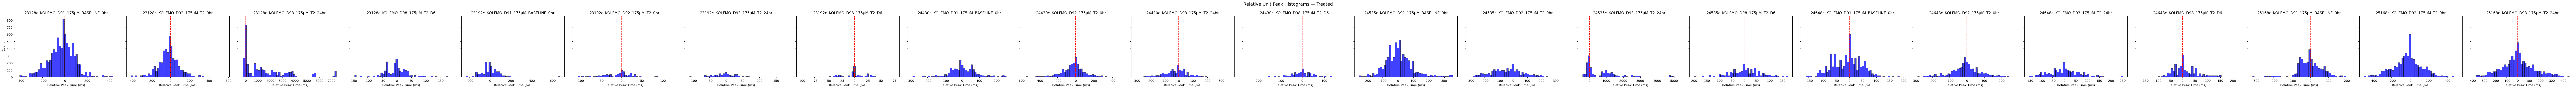


=== Group: Control ===
23178c_KOLFMO_D91_CONTROL_BASELINE_0hr: N=2640 | Range=(-149.99999999999946 205.0000000000054)
23178c_KOLFMO_D92_CONTROL_T2_0hr: N=3564 | Range=(-255.0000000000008 390.00000000000057)
23178c_KOLFMO_D93_CONTROL_T2_24hr: N=3306 | Range=(-289.99999999999915 5335.000000000001)
23178c_KOLFMO_D98_CONTROL_T2_D6: N=2950 | Range=(-150.00000000000034 179.99999999999972)
25159c_KOLFMO_D91_CONTROL_BASELINE_0hr: N=6839 | Range=(-415.0000000000009 214.99999999999986)
25159c_KOLFMO_D92_CONTROL_T2_0hr: N=7645 | Range=(-500.0 650.0000000000057)
25159c_KOLFMO_D93_CONTROL_T2_24hr: N=8515 | Range=(-790.0000000000009 679.9999999999926)
25159c_KOLFMO_D98_CONTROL_T2_D6: N=8383 | Range=(-369.99999999999744 324.99999999999574)
25168c_KOLFMO_D91_175µM_BASELINE_0hr: N=3664 | Range=(-314.9999999999995 194.99999999999673)
25168c_KOLFMO_D92_175µM_T2_0hr: N=5358 | Range=(-495.000000000001 509.999999999998)
25168c_KOLFMO_D93_175µM_T2_24hr: N=5509 | Range=(-364.9999999999949 449.99999999999574)

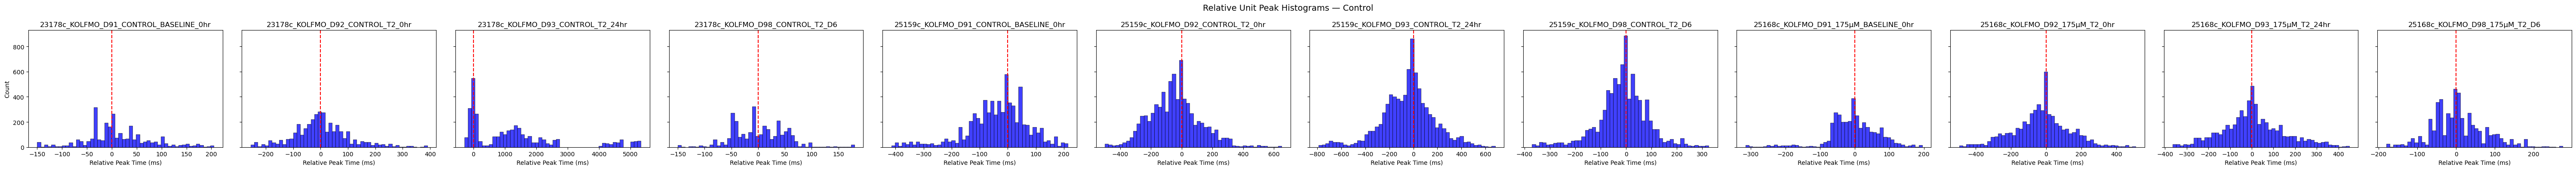

[{'Dataset': '23128c_KOLFMO_D91_175µM_BASELINE_0hr',
  'Group': 'Treated',
  'RelPeaks': array([-100.,    0.,  -90., ...,   60.,   90.,   60.])},
 {'Dataset': '23128c_KOLFMO_D92_175µM_T2_0hr',
  'Group': 'Treated',
  'RelPeaks': array([-25.,  35., -70., ..., -15.,  10.,  45.])},
 {'Dataset': '23128c_KOLFMO_D93_175µM_T2_24hr',
  'Group': 'Treated',
  'RelPeaks': array([ -10.,  -70.,  -90., ..., 1995., 2055., 1680.])},
 {'Dataset': '23128c_KOLFMO_D98_175µM_T2_D6',
  'Group': 'Treated',
  'RelPeaks': array([ 95.,  95., -50., ...,   0.,   0., -40.])},
 {'Dataset': '23192c_KOLFMO_D91_175µM_BASELINE_0hr',
  'Group': 'Treated',
  'RelPeaks': array([   0.,  190., -135., ...,  -35.,    0.,   60.])},
 {'Dataset': '23192c_KOLFMO_D92_175µM_T2_0hr',
  'Group': 'Treated',
  'RelPeaks': array([ -95.,    0.,  -80.,  -25.,  -95.,  -80.,  -95.,   30.,  -55.,
          -95.,   10.,  -55.,  -10.,  -50.,  -25.,    5.,  -95.,    5.,
          -25.,  -95.,    5.,   30.,   30.,   -5.,  -35.,  -15.,  -15.,
   

In [ ]:
# Debugging and cross checking relative unit peak histograms

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

config = {
    "bin_size_ms": 5.0,
    "threshold_rms": 1.7,
    "burst_edge_fraction": 0.5,
    "gauss_win_ms": 17.0,
    "square_win_ms": 5.0,
    "min_dist": 1950.0
}

dataset_groups = {
    "Treated": [
        "23128c_KOLFMO_D91_175µM_BASELINE_0hr",
        "23128c_KOLFMO_D92_175µM_T2_0hr",
        "23128c_KOLFMO_D93_175µM_T2_24hr",
        "23128c_KOLFMO_D98_175µM_T2_D6",

        "23192c_KOLFMO_D91_175µM_BASELINE_0hr",
        "23192c_KOLFMO_D92_175µM_T2_0hr",
        "23192c_KOLFMO_D93_175µM_T2_24hr",
        "23192c_KOLFMO_D98_175µM_T2_D6",

        "24430c_KOLFMO_D91_175µM_BASELINE_0hr",
        "24430c_KOLFMO_D92_175µM_T2_0hr",
        "24430c_KOLFMO_D93_175µM_T2_24hr",
        "24430c_KOLFMO_D98_175µM_T2_D6",

        "24535c_KOLFMO_D91_175µM_BASELINE_0hr",
        "24535c_KOLFMO_D92_175µM_T2_0hr",
        "24535c_KOLFMO_D93_175µM_T2_24hr",
        "24535c_KOLFMO_D98_175µM_T2_D6",

        "24648c_KOLFMO_D91_175µM_BASELINE_0hr",
        "24648c_KOLFMO_D92_175µM_T2_0hr",
        "24648c_KOLFMO_D93_175µM_T2_24hr",
        "24648c_KOLFMO_D98_175µM_T2_D6",

        "25168c_KOLFMO_D91_175µM_BASELINE_0hr",
        "25168c_KOLFMO_D92_175µM_T2_0hr",
        "25168c_KOLFMO_D93_175µM_T2_24hr"
    ],
    "Control": [
        "23178c_KOLFMO_D91_CONTROL_BASELINE_0hr",
        "23178c_KOLFMO_D92_CONTROL_T2_0hr",
        "23178c_KOLFMO_D93_CONTROL_T2_24hr",
        "23178c_KOLFMO_D98_CONTROL_T2_D6",

        "25159c_KOLFMO_D91_CONTROL_BASELINE_0hr",
        "25159c_KOLFMO_D92_CONTROL_T2_0hr",
        "25159c_KOLFMO_D93_CONTROL_T2_24hr",
        "25159c_KOLFMO_D98_CONTROL_T2_D6",

        "25168c_KOLFMO_D91_175µM_BASELINE_0hr",  
        "25168c_KOLFMO_D92_175µM_T2_0hr",        
        "25168c_KOLFMO_D93_175µM_T2_24hr",
        "25168c_KOLFMO_D98_175µM_T2_D6"        
    ]
}

def plot_relative_unit_peak_histograms_grouped_debug(orc, dataset_groups, config=None, save=False, save_dir="."):
    """
    Debugging version of relative unit peak histogram plotting.
    - Uses orchestrator's run_relative_unit_peak_times()
    - Ignores any extra return values beyond the first three
    - Prints dataset name, N of peaks, and value range
    """

    import matplotlib.pyplot as plt
    import seaborn as sns
    import numpy as np
    import os

    if save and not os.path.exists(save_dir):
        os.makedirs(save_dir)

    hist_data = []

    for group_name, datasets in dataset_groups.items():
        print(f"\n=== Group: {group_name} ===")

        n_datasets = len(datasets)
        fig, axes = plt.subplots(1, n_datasets, figsize=(5*n_datasets, 4), sharey=True)
        if n_datasets == 1:
            axes = [axes]

        for i, dataset_key in enumerate(datasets):
            ax = axes[i]
            try:
                # run using orc
                rel_peaks = orc.run_relative_unit_peak_times(dataset_key, config, plot=False)

                # force conversion so i don't get unpacking errors
                if isinstance(rel_peaks, tuple) or isinstance(rel_peaks, list):
                    rel_peaks = np.array(rel_peaks).flatten()
                else:
                    rel_peaks = np.array([rel_peaks])

                if rel_peaks.size == 0:
                    print(f"{dataset_key}: No relative peaks detected.")
                    ax.set_title(f"{dataset_key}\n(No data)")
                    ax.axis("off")
                    continue

                print(f"{dataset_key}: N={len(rel_peaks)} | Range=({np.min(rel_peaks)} {np.max(rel_peaks)})")

                hist_data.append({
                    "Dataset": dataset_key,
                    "Group": group_name,
                    "RelPeaks": rel_peaks
                })

                sns.histplot(rel_peaks, bins=50, kde=False, ax=ax, color='blue')
                ax.axvline(0, color='red', linestyle='--')
                ax.set_title(dataset_key)
                ax.set_xlabel("Relative Peak Time (ms)")
                ax.set_ylabel("Count")

            except Exception as e:
                print(f"Error processing {dataset_key}: {e}")
                ax.set_title(f"{dataset_key}\n(Error)")
                ax.axis("off")

        plt.suptitle(f"Relative Unit Peak Histograms — {group_name}", fontsize=14)
        plt.tight_layout()

        if save:
            fname = os.path.join(save_dir, f"RelativeUnitPeaks_{group_name}.png")
            plt.savefig(fname, dpi=300)
            print(f"Saved: {fname}")

        plt.show()

    return hist_data

plot_relative_unit_peak_histograms_grouped_debug(orc, dataset_groups, config=config, save=True)


=== Group: Treated ===
23128c_KOLFMO_D91_175µM_BASELINE_0hr: N=8489 | Range=(-405.00000000000114 429.9999999999997)
23128c_KOLFMO_D92_175µM_T2_0hr: N=4690 | Range=(-404.99999999999403 559.9999999999952)
23128c_KOLFMO_D93_175µM_T2_24hr: N=3152 | Range=(-234.99999999999943 7369.999999999997)
23128c_KOLFMO_D98_175µM_T2_D6: N=1932 | Range=(-145.00000000000136 174.99999999999892)
23192c_KOLFMO_D91_175µM_BASELINE_0hr: N=1447 | Range=(-230.00000000000043 664.9999999999991)
23192c_KOLFMO_D92_175µM_T2_0hr: N=847 | Range=(-105.00000000000043 119.99999999999744)
23192c_KOLFMO_D93_175µM_T2_24hr: N=630 | Range=(-109.99999999999943 170.0000000000017)
23192c_KOLFMO_D98_175µM_T2_D6: N=625 | Range=(-100.00000000000009 74.99999999999929)
24430c_KOLFMO_D91_175µM_BASELINE_0hr: N=2312 | Range=(-285.0000000000001 254.999999999999)
24430c_KOLFMO_D92_175µM_T2_0hr: N=2428 | Range=(-559.9999999999987 459.99999999999994)
24430c_KOLFMO_D93_175µM_T2_24hr: N=1556 | Range=(-299.99999999999716 355.000000000004)
2443

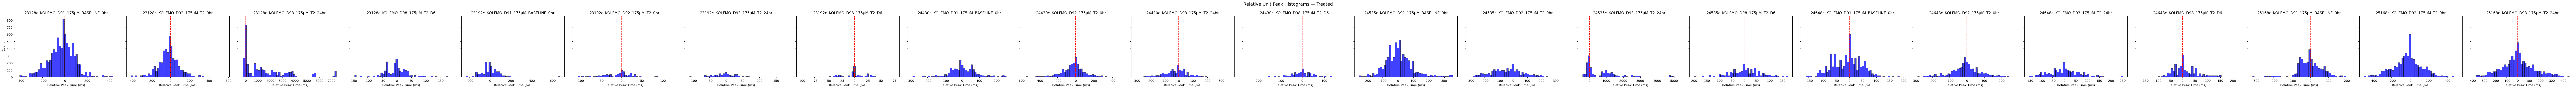


=== Group: Control ===
23178c_KOLFMO_D91_CONTROL_BASELINE_0hr: N=2640 | Range=(-149.99999999999946 205.0000000000054)
23178c_KOLFMO_D92_CONTROL_T2_0hr: N=3564 | Range=(-255.0000000000008 390.00000000000057)
23178c_KOLFMO_D93_CONTROL_T2_24hr: N=3306 | Range=(-289.99999999999915 5335.000000000001)
23178c_KOLFMO_D98_CONTROL_T2_D6: N=2950 | Range=(-150.00000000000034 179.99999999999972)
25159c_KOLFMO_D91_CONTROL_BASELINE_0hr: N=6839 | Range=(-415.0000000000009 214.99999999999986)
25159c_KOLFMO_D92_CONTROL_T2_0hr: N=7645 | Range=(-500.0 650.0000000000057)
25159c_KOLFMO_D93_CONTROL_T2_24hr: N=8515 | Range=(-790.0000000000009 679.9999999999926)
25159c_KOLFMO_D98_CONTROL_T2_D6: N=8383 | Range=(-369.99999999999744 324.99999999999574)
25168c_KOLFMO_D91_175µM_BASELINE_0hr: N=3664 | Range=(-314.9999999999995 194.99999999999673)
25168c_KOLFMO_D92_175µM_T2_0hr: N=5358 | Range=(-495.000000000001 509.999999999998)
25168c_KOLFMO_D93_175µM_T2_24hr: N=5509 | Range=(-364.9999999999949 449.99999999999574)

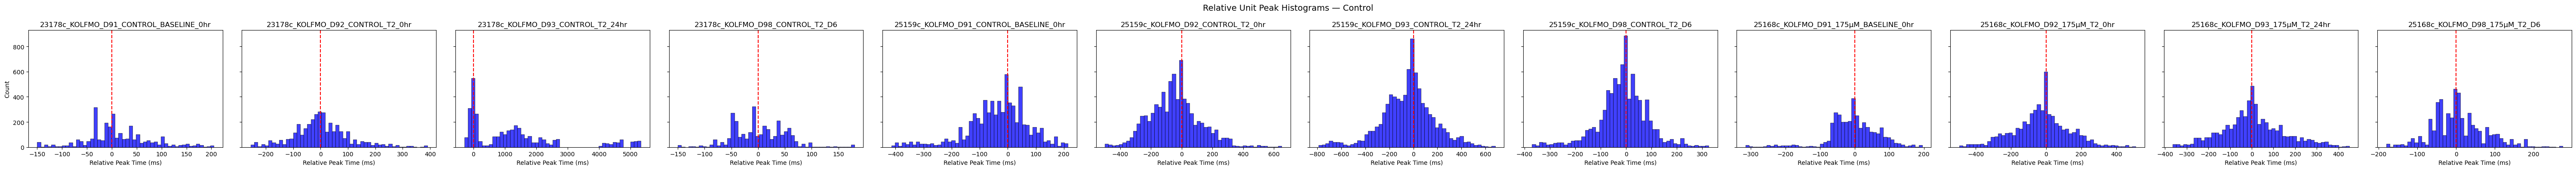

[{'Dataset': '23128c_KOLFMO_D91_175µM_BASELINE_0hr',
  'Group': 'Treated',
  'RelPeaks': array([-100.,    0.,  -90., ...,   60.,   90.,   60.])},
 {'Dataset': '23128c_KOLFMO_D92_175µM_T2_0hr',
  'Group': 'Treated',
  'RelPeaks': array([-25.,  35., -70., ..., -15.,  10.,  45.])},
 {'Dataset': '23128c_KOLFMO_D93_175µM_T2_24hr',
  'Group': 'Treated',
  'RelPeaks': array([ -10.,  -70.,  -90., ..., 1995., 2055., 1680.])},
 {'Dataset': '23128c_KOLFMO_D98_175µM_T2_D6',
  'Group': 'Treated',
  'RelPeaks': array([ 95.,  95., -50., ...,   0.,   0., -40.])},
 {'Dataset': '23192c_KOLFMO_D91_175µM_BASELINE_0hr',
  'Group': 'Treated',
  'RelPeaks': array([   0.,  190., -135., ...,  -35.,    0.,   60.])},
 {'Dataset': '23192c_KOLFMO_D92_175µM_T2_0hr',
  'Group': 'Treated',
  'RelPeaks': array([ -95.,    0.,  -80.,  -25.,  -95.,  -80.,  -95.,   30.,  -55.,
          -95.,   10.,  -55.,  -10.,  -50.,  -25.,    5.,  -95.,    5.,
          -25.,  -95.,    5.,   30.,   30.,   -5.,  -35.,  -15.,  -15.,
   

In [ ]:
# Relative unit peak histograms - same as debugging, but picking sns colors to assign statuses

#MaxOne Kolf

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

config = {
    "bin_size_ms": 5.0,
    "threshold_rms": 1.7,
    "burst_edge_fraction": 0.5,
    "gauss_win_ms": 17.0,
    "square_win_ms": 5.0,
    "min_dist": 1950.0
}

dataset_groups = {
    "Treated": [
        "23128c_KOLFMO_D91_175µM_BASELINE_0hr",
        "23128c_KOLFMO_D92_175µM_T2_0hr",
        "23128c_KOLFMO_D93_175µM_T2_24hr",
        "23128c_KOLFMO_D98_175µM_T2_D6",

        "23192c_KOLFMO_D91_175µM_BASELINE_0hr",
        "23192c_KOLFMO_D92_175µM_T2_0hr",
        "23192c_KOLFMO_D93_175µM_T2_24hr",
        "23192c_KOLFMO_D98_175µM_T2_D6",

        "24430c_KOLFMO_D91_175µM_BASELINE_0hr",
        "24430c_KOLFMO_D92_175µM_T2_0hr",
        "24430c_KOLFMO_D93_175µM_T2_24hr",
        "24430c_KOLFMO_D98_175µM_T2_D6",

        "24535c_KOLFMO_D91_175µM_BASELINE_0hr",
        "24535c_KOLFMO_D92_175µM_T2_0hr",
        "24535c_KOLFMO_D93_175µM_T2_24hr",
        "24535c_KOLFMO_D98_175µM_T2_D6",

        "24648c_KOLFMO_D91_175µM_BASELINE_0hr",
        "24648c_KOLFMO_D92_175µM_T2_0hr",
        "24648c_KOLFMO_D93_175µM_T2_24hr",
        "24648c_KOLFMO_D98_175µM_T2_D6",

        "25168c_KOLFMO_D91_175µM_BASELINE_0hr",
        "25168c_KOLFMO_D92_175µM_T2_0hr",
        "25168c_KOLFMO_D93_175µM_T2_24hr"
    ],
    "Control": [
        "23178c_KOLFMO_D91_CONTROL_BASELINE_0hr",
        "23178c_KOLFMO_D92_CONTROL_T2_0hr",
        "23178c_KOLFMO_D93_CONTROL_T2_24hr",
        "23178c_KOLFMO_D98_CONTROL_T2_D6",

        "25159c_KOLFMO_D91_CONTROL_BASELINE_0hr",
        "25159c_KOLFMO_D92_CONTROL_T2_0hr",
        "25159c_KOLFMO_D93_CONTROL_T2_24hr",
        "25159c_KOLFMO_D98_CONTROL_T2_D6",

        "25168c_KOLFMO_D91_175µM_BASELINE_0hr",  
        "25168c_KOLFMO_D92_175µM_T2_0hr",        
        "25168c_KOLFMO_D93_175µM_T2_24hr",
        "25168c_KOLFMO_D98_175µM_T2_D6"        
    ]
}

def plot_relative_unit_peak_times_grouped_colored(orc, dataset_groups, config=None, save_dir="."):
    """
    Plots histograms of relative unit peak times for datasets grouped by condition.
    Colors are assigned based on timepoint labels for visual consistency.
    """
    import matplotlib.pyplot as plt
    import seaborn as sns
    import numpy as np
    import os

    # come up with a consistent color scheme for each timepoint
    color_map = {
        "BASELINE": "#1f77b4",  # blue
        "T2_0hr": "#2ca02c",    # green
        "T2_24hr": "#ff7f0e",   # orange
        "T2_D6": "#d62728"      # red
    }

    if save_dir and not os.path.exists(save_dir):
        os.makedirs(save_dir)

    hist_data = []

    for group_name, datasets in dataset_groups.items():
        print(f"\n=== Group: {group_name} ===")

        n_datasets = len(datasets)
        fig, axes = plt.subplots(1, n_datasets, figsize=(5*n_datasets, 4), sharey=True)
        if n_datasets == 1:
            axes = [axes]

        for i, dataset_key in enumerate(datasets):
            ax = axes[i]
            try:
                rel_peaks = orc.run_relative_unit_peak_times(dataset_key, config, plot=False)

                if isinstance(rel_peaks, (tuple, list)):
                    rel_peaks = np.array(rel_peaks).flatten()
                else:
                    rel_peaks = np.array([rel_peaks])

                # filter to window
                rel_peaks = rel_peaks[(rel_peaks >= -250) & (rel_peaks <= 350)]

                if rel_peaks.size == 0:
                    print(f"{dataset_key}: No relative peaks detected.")
                    ax.set_title(f"{dataset_key}\n(No data)")
                    ax.axis("off")
                    continue

                # pick color based on dataset label
                color = "#1f77b4"  # default
                for label, c in color_map.items():
                    if label in dataset_key:
                        color = c
                        break

                print(f"{dataset_key}: N={len(rel_peaks)} | Range=({np.min(rel_peaks)} {np.max(rel_peaks)})")

                hist_data.append({
                    "Dataset": dataset_key,
                    "Group": group_name,
                    "RelPeaks": rel_peaks
                })

                bins = np.arange(-250, 351, 10)
                sns.histplot(rel_peaks, bins=bins, kde=False, ax=ax, color=color)
                ax.axvline(0, color='red', linestyle='--')
                ax.set_xlim([-250, 350])
                ax.set_title(dataset_key)
                ax.set_xlabel("Relative Peak Time (ms)")
                ax.set_ylabel("Count")

            except Exception as e:
                print(f"Error processing {dataset_key}: {e}")
                ax.set_title(f"{dataset_key}\n(Error)")
                ax.axis("off")

        plt.suptitle(f"Relative Unit Peak Times — {group_name}", fontsize=14)
        plt.tight_layout()

        if save_dir:
            fname = os.path.join(save_dir, f"RelativeUnitPeaks_{group_name}_colored.png")
            plt.savefig(fname, dpi=300)
            print(f"Saved: {fname}")

        plt.show()

    return hist_data

plot_relative_unit_peak_histograms_grouped_debug(orc, dataset_groups, config=config, save=False)

In [ ]:
# Relative unit peak times--older method of computing. Testing 4 or 5 features and made the following improvements...

'''
(1) Adjusted the time window- clipped relative peak times to [-250, 350] ms
    avoid overlap with IBI scale (which seemed tight at ~1s) to isolate alignment within bursts
    Will apply window uniformly across all panels for clearer interpretations

(2) Maintaining negative values- represents early unit firing relative to population peak

(3) Filtering extreme outliers 

(4) Incorporated KDE overlay to enhance shape visualization

(5) Added export / import to CSV / DF for stats analysis (skewness, kurtosis, synchrony index, width, etc)

May implement: 
    log-scale y-axis for heavy tails
    slightly larger font sizes for clarity
    better use of colors to convey information
'''

hist_data[group][dataset_key] = {
    "values": rel_peaks_filtered,
    "counts": counts,
    "bins": bin_edges
}

def plot_relative_unit_peak_histograms_debug(orc, dataset_groups, config=None, save_dir="."):
    """
    Plots histograms of relative unit peak times for datasets grouped by condition.
    (Older version: centered histograms, fixed binning, clipped window)

    Args:
        orc: Orchestrator object with run_relative_unit_peak_times()
        dataset_groups: dict {group_name: [dataset_keys]}
        config: analysis configuration dict
        save_dir: folder where plots will be saved
    """
    import matplotlib.pyplot as plt
    import seaborn as sns
    import numpy as np
    import os

    if save_dir and not os.path.exists(save_dir):
        os.makedirs(save_dir)

    hist_data = []

    for group_name, datasets in dataset_groups.items():
        print(f"\n=== Group: {group_name} ===")

        n_datasets = len(datasets)
        fig, axes = plt.subplots(1, n_datasets, figsize=(5*n_datasets, 4), sharey=True)
        if n_datasets == 1:
            axes = [axes]

        for i, dataset_key in enumerate(datasets):
            ax = axes[i]
            try:
                rel_peaks = orc.run_relative_unit_peak_times(dataset_key, config, plot=False)

                # convert and flatten
                if isinstance(rel_peaks, (tuple, list)):
                    rel_peaks = np.array(rel_peaks).flatten()
                else:
                    rel_peaks = np.array([rel_peaks])

                # filter to consistent window
                rel_peaks = rel_peaks[(rel_peaks >= -250) & (rel_peaks <= 350)]

                if rel_peaks.size == 0:
                    print(f"{dataset_key}: No relative peaks detected.")
                    ax.set_title(f"{dataset_key}\n(No data)")
                    ax.axis("off")
                    continue

                print(f"{dataset_key}: N={len(rel_peaks)} | Range=({np.min(rel_peaks)} {np.max(rel_peaks)})")

                hist_data.append({
                    "Dataset": dataset_key,
                    "Group": group_name,
                    "RelPeaks": rel_peaks
                })

                # try keeping it fixed at 10 ms bins
                bins = np.arange(-250, 351, 10)
                sns.histplot(rel_peaks, bins=bins, kde=False, ax=ax, color='blue')
                ax.axvline(0, color='red', linestyle='--')
                ax.set_xlim([-250, 350])
                ax.set_title(dataset_key)
                ax.set_xlabel("Relative Peak Time (ms)")
                ax.set_ylabel("Count")

            except Exception as e:
                print(f"Error processing {dataset_key}: {e}")
                ax.set_title(f"{dataset_key}\n(Error)")
                ax.axis("off")

        plt.suptitle(f"Relative Unit Peak Times — {group_name}", fontsize=14)
        plt.tight_layout()

        if save_dir:
            fname = os.path.join(save_dir, f"RelativeUnitPeaks_{group_name}.png")
            plt.savefig(fname, dpi=300)
            print(f"Saved: {fname}")

        plt.show()

    return hist_data
plot_relative_unit_peak_histograms_debug(orc, dataset_groups, config=config, save=False)


=== Group: Treated ===
✅ Saved plot: relative_peak_histograms_colored/RelativeUnitPeaks_Treated.png


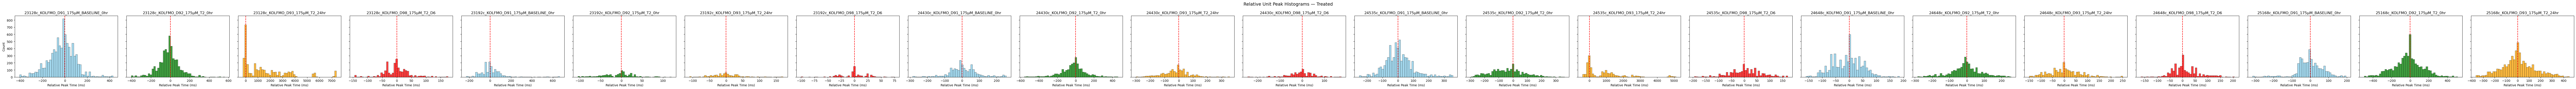


=== Group: Control ===
✅ Saved plot: relative_peak_histograms_colored/RelativeUnitPeaks_Control.png


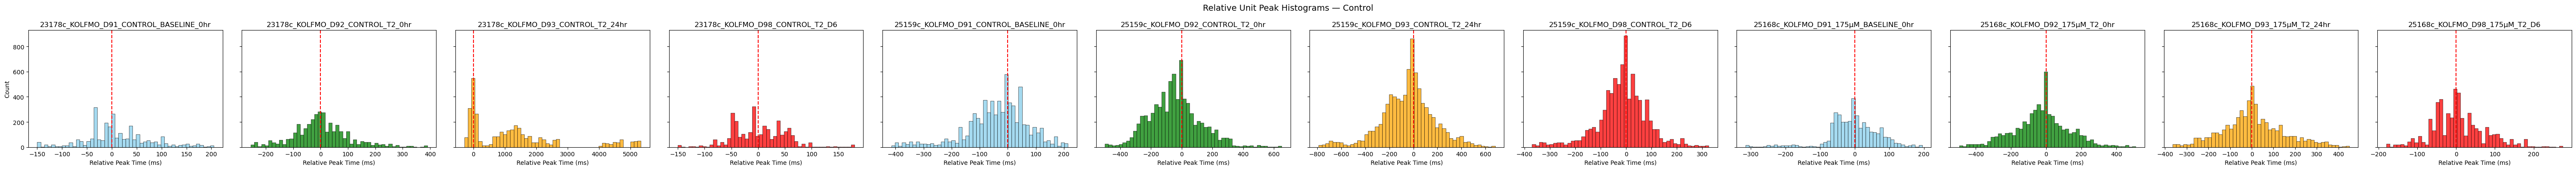

✅ Saved stats table: relative_peak_histograms_colored/relative_peak_stats_summary.csv


Group    Dataset                                N_Peaks  Mean         Std          Skew      Kurtosis   Width 
0  Treated  23128c_KOLFMO_D91_175µM_BASELINE_0hr  8489      -27.676405   117.351271 -0.050691   1.068413   835.0
1  Treated        23128c_KOLFMO_D92_175µM_T2_0hr  4690      -19.685501   112.302669  0.121540   2.253752   965.0
2  Treated       23128c_KOLFMO_D93_175µM_T2_24hr  3152     1496.662437  1810.152724  1.423594   1.686625  7605.0
3  Treated         23128c_KOLFMO_D98_175µM_T2_D6  1932       -2.272257    46.140229  0.230393   2.477446   320.0
4  Treated  23192c_KOLFMO_D91_175µM_BASELINE_0hr  1447       11.123013   120.281862  2.565599  10.851470   895.0

In [ ]:
# Adding statistical methods to the relative unit peak histograms dataframe

def run_relative_peak_analysis(orc, dataset_groups, config, save_dir="relative_peak_histograms_colored"):
    """
    Combined function:
        1. Plots relative peak histograms (colored by condition)
        2. Captures histogram data
        3. Computes summary stats
        4. Saves both plots and stats CSV
    """

    import matplotlib.pyplot as plt
    import seaborn as sns
    import numpy as np
    import os
    import pandas as pd

    # make save directory just in case
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)

    # make color mapping consistent
    color_map = {
        "BASELINE": "skyblue",
        "0hr": "green",
        "24hr": "orange",
        "D6": "red"
    }

    histogram_data = []
    stats_records = []

    for group_name, datasets in dataset_groups.items():
        print(f"\n=== Group: {group_name} ===")

        n_datasets = len(datasets)
        fig, axes = plt.subplots(1, n_datasets, figsize=(5 * n_datasets, 4), sharey=True)
        if n_datasets == 1:
            axes = [axes]

        for i, dataset_key in enumerate(datasets):
            ax = axes[i]
            try:
                rel_peaks = orc.run_relative_unit_peak_times(dataset_key, config, plot=False)

                # flatten output
                if isinstance(rel_peaks, tuple) or isinstance(rel_peaks, list):
                    rel_peaks = np.array(rel_peaks).flatten()
                else:
                    rel_peaks = np.array([rel_peaks])

                if rel_peaks.size == 0:
                    print(f"{dataset_key}: No relative peaks detected.")
                    ax.set_title(f"{dataset_key}\n(No data)")
                    ax.axis("off")
                    continue

                # timepoint keyword determines color
                color = "gray"
                for key, col in color_map.items():
                    if key.lower() in dataset_key.lower():
                        color = col
                        break

    
                sns.histplot(rel_peaks, bins=50, kde=False, ax=ax, color=color)
                ax.axvline(0, color='red', linestyle='--')
                ax.set_title(dataset_key)
                ax.set_xlabel("Relative Peak Time (ms)")
                ax.set_ylabel("Count")

                # aave histogram data
                histogram_data.append({
                    "Dataset": dataset_key,
                    "Group": group_name,
                    "RelPeaks": rel_peaks
                })

                # compute stats
                stats_records.append({
                    "Group": group_name,
                    "Dataset": dataset_key,
                    "N_Peaks": len(rel_peaks),
                    "Mean": np.mean(rel_peaks),
                    "Std": np.std(rel_peaks),
                    "Skew": pd.Series(rel_peaks).skew(),
                    "Kurtosis": pd.Series(rel_peaks).kurtosis(),
                    "Width": np.max(rel_peaks) - np.min(rel_peaks)
                })

            except Exception as e:
                print(f"Error processing {dataset_key}: {e}")
                ax.set_title(f"{dataset_key}\n(Error)")
                ax.axis("off")

        plt.suptitle(f"Relative Unit Peak Histograms — {group_name}", fontsize=14)
        plt.tight_layout()

        fname = os.path.join(save_dir, f"RelativeUnitPeaks_{group_name}.png")
        plt.savefig(fname, dpi=300)
        print(f"Saved plot: {fname}")

        plt.show()

    # convert stats to dataframe --> save
    relative_peak_stats_df = pd.DataFrame(stats_records)
    stats_path = os.path.join(save_dir, "relative_peak_stats_summary.csv")
    relative_peak_stats_df.to_csv(stats_path, index=False)
    print(f"Saved stats table: {stats_path}")

    return histogram_data, relative_peak_stats_df

histogram_data, relative_peak_stats_df = run_relative_peak_analysis(
    orc, dataset_groups, config, save_dir="relative_peak_histograms_colored"
)

display(relative_peak_stats_df.head())

In [ ]:
# More stats for the relative unit peaks

import pandas as pd
from scipy.stats import skew, kurtosis
import numpy as np

def compute_relative_peak_stats(hist_data):
    stats_records = []

    for entry in hist_data:  # iterate over list instead of .items()
        dataset_key = entry["Dataset"]
        group = entry["Group"]
        values = np.array(entry["RelPeaks"], dtype=float)

        if len(values) == 0:
            continue

        # define core descriptive stats 
        mean_val = np.mean(values)
        median_val = np.median(values)
        std_val = np.std(values)
        skew_val = skew(values)
        kurt_val = kurtosis(values)

        # define synchrony index
        synchrony_index = 1 / std_val if std_val > 0 else np.nan

        # define width
        width_val = np.percentile(values, 95) - np.percentile(values, 5)

        # save row
        stats_records.append({
            "Group": group,
            "Dataset": dataset_key,
            "N": len(values),
            "Mean": mean_val,
            "Median": median_val,
            "Std": std_val,
            "Skewness": skew_val,
            "Kurtosis": kurt_val,
            "SynchronyIndex": synchrony_index,
            "Width": width_val
        })

    return pd.DataFrame(stats_records)

# run computation
relative_peak_stats_df = compute_relative_peak_stats(histogram_data)

display(relative_peak_stats_df.head())

# save to csv
relative_peak_stats_df.to_csv("relative_peak_stats_summary.csv", index=False)
print("Stats summary saved to 'relative_peak_stats_summary.csv'")

Group    Dataset                                N     Mean         Median  Std          Skewness  Kurtosis   SynchronyIndex  Width 
0  Treated  23128c_KOLFMO_D91_175µM_BASELINE_0hr  8489   -27.676405  -15.0    117.351271 -0.050682   1.067077  0.008521         365.0
1  Treated        23128c_KOLFMO_D92_175µM_T2_0hr  4690   -19.685501  -15.0    112.302669  0.121501   2.250071  0.008905         360.0
2  Treated       23128c_KOLFMO_D93_175µM_T2_24hr  3152  1496.662437  920.0   1810.152724  1.422917   1.682048  0.000552        5680.0
3  Treated         23128c_KOLFMO_D98_175µM_T2_D6  1932    -2.272257    0.0     46.140229  0.230214   2.467935  0.021673         145.0
4  Treated  23192c_KOLFMO_D91_175µM_BASELINE_0hr  1447    11.123013    0.0    120.281862  2.562939  10.809866  0.008314         300.0

Stats summary saved to 'relative_peak_stats_summary.csv'


In [ ]:
# Creating / computing a full burst features dataframe for 360 analysis and data viz 

import numpy as np
import pandas as pd
import scipy.stats as stats

def compute_burst_features_full(orc, dataset_groups, config, histogram_data=None):
    """
    Compute comprehensive burst features for all datasets.
    Optimized to avoid timeouts from spike counting.
    """
    results = []
    bin_size = config.get("bin_size_ms", 5.0) / 1000.0

    for group_name, datasets in dataset_groups.items():
        for dataset_key in datasets:
            try:
                detector = orc.get_burst_detector(dataset_key, config)
                times, smoothed, peaks, peak_times, bursts, burst_windows = detector.compute_population_rate_and_bursts()

                sd = orc.spike_data[dataset_key]
                all_units = sd.train
                n_neurons = len(all_units)
                duration_s = times[-1] - times[0] if len(times) > 1 else np.nan

                if not bursts or len(bursts) == 0:
                    print(f"No bursts detected in {dataset_key}")
                    results.append({"Dataset": dataset_key, "Group": group_name, "Timepoint": next((tp for tp in ["BASELINE_0hr","T2_0hr","T2_24hr","T2_D6"] if tp in dataset_key), "Unknown")})
                    continue
                
                # Burst Duration Stats
                
                durations = [(e - s) * bin_size for s, e in bursts]
                mean_dur = np.mean(durations) if durations else np.nan
                std_dur = np.std(durations) if durations else np.nan
                skew_dur = stats.skew(durations) if len(durations) > 2 else np.nan
                kurt_dur = stats.kurtosis(durations) if len(durations) > 3 else np.nan

                # Burst Rate
                
                burst_rate = (len(bursts) / (duration_s / 60)) if duration_s > 0 else np.nan

                # IBIs
                
                ibis = np.diff([times[p] for p in peaks]) if len(peaks) > 1 else []
                ibi_mean = np.mean(ibis) if len(ibis) > 0 else np.nan
                ibi_std = np.std(ibis) if len(ibis) > 0 else np.nan
                ibi_cv = (ibi_std / ibi_mean) if len(ibis) > 1 and ibi_mean > 0 else np.nan
                ibi_skew = stats.skew(ibis) if len(ibis) > 2 else np.nan
                ibi_kurt = stats.kurtosis(ibis) if len(ibis) > 3 else np.nan

                
                # Burst Participation Index (BPI)
                
                participating_units = 0
                for unit in all_units:
                    if any(np.any((unit >= times[s]) & (unit <= times[e])) for s, e in bursts):
                        participating_units += 1
                BPI = participating_units / max(n_neurons, 1)

                
                # Fano Factor (optimized spike counts)
                
                spike_counts_per_burst = []
                for s, e in bursts:
                    s_t, e_t = times[s], times[e]
                    count = sum(np.sum((unit >= s_t) & (unit <= e_t)) for unit in all_units)
                    spike_counts_per_burst.append(count)
                Fano = (np.var(spike_counts_per_burst) / np.mean(spike_counts_per_burst)) \
                    if spike_counts_per_burst and np.mean(spike_counts_per_burst) > 0 else np.nan

                
                # Entropy of relative peak times
                
                rel_peaks = []
                for unit in all_units:
                    aligned = []
                    for s, e in bursts:
                        burst_spikes = unit[(unit >= times[s]) & (unit <= times[e])]
                        if burst_spikes.size > 0:
                            center = times[s] + (times[e] - times[s]) / 2
                            aligned.append(np.mean(burst_spikes) - center)
                    rel_peaks.extend(aligned)
                if len(rel_peaks) > 1:
                    hist, _ = np.histogram(rel_peaks, bins=30, density=True)
                    hist = hist[hist > 0]
                    entropy = -np.sum(hist * np.log(hist)) if len(hist) > 0 else np.nan
                else:
                    entropy = np.nan

                
                # Peak Spread
                
                peak_spread = np.ptp(peak_times) if len(peak_times) > 1 else np.nan

                
                # Width Metrics
                
                lead_widths, lag_widths, total_widths = [], [], []
                for s, e in bursts:
                    burst_peak_times = [times[p] for p in peaks if s <= p <= e]
                    if burst_peak_times:
                        center = np.median(burst_peak_times)
                        lead_widths.append(center - times[s])
                        lag_widths.append(times[e] - center)
                        total_widths.append((e - s) * bin_size)
                mean_lead = np.nanmean(lead_widths) if lead_widths else np.nan
                mean_lag = np.nanmean(lag_widths) if lag_widths else np.nan
                mean_total = np.nanmean(total_widths) if total_widths else np.nan

                
                # Histogram shape stats 
                
                skew_hist = np.nan
                kurt_hist = np.nan
                if histogram_data and dataset_key in histogram_data:
                    hist_vals = histogram_data[dataset_key]
                    if len(hist_vals) > 3:
                        skew_hist = stats.skew(hist_vals)
                        kurt_hist = stats.kurtosis(hist_vals)

                
                # save all metrics for stats analysis and viz
                
                results.append({
                    "Dataset": dataset_key,
                    "Group": group_name,
                    "Timepoint": next((tp for tp in ["BASELINE_0hr","T2_0hr","T2_24hr","T2_D6"] if tp in dataset_key), "Unknown"),
                    "BurstRate_per_min": burst_rate,
                    "MeanBurstDur": mean_dur,
                    "StdBurstDur": std_dur,
                    "SkewBurstDur": skew_dur,
                    "KurtBurstDur": kurt_dur,
                    "IBI_mean": ibi_mean,
                    "IBI_std": ibi_std,
                    "IBI_CV": ibi_cv,
                    "IBI_skew": ibi_skew,
                    "IBI_kurt": ibi_kurt,
                    "BPI": BPI,
                    "FanoFactor": Fano,
                    "Entropy_RelPeaks": entropy,
                    "PeakSpread": peak_spread,
                    "MeanLeadWidth": mean_lead,
                    "MeanLagWidth": mean_lag,
                    "MeanTotalWidth": mean_total,
                    "SkewHistRelPeaks": skew_hist,
                    "KurtHistRelPeaks": kurt_hist
                })

            except Exception as e:
                print(f"Error computing features for {dataset_key}: {e}")

    return pd.DataFrame(results)

burst_features_df = compute_burst_features_full(orc, dataset_groups, config, histogram_data)

display(burst_features_df.head())

# don't forget to save to csv !!!
burst_features_df.to_csv("burst_features_full_summary.csv", index=False)
print("Full burst feature table saved to 'burst_features_full_summary.csv'")


Dataset                               Group    Timepoint      BurstRate_per_min  MeanBurstDur  StdBurstDur  SkewBurstDur  KurtBurstDur  IBI_mean  IBI_std   IBI_CV    IBI_skew  IBI_kurt   BPI  FanoFactor  Entropy_RelPeaks  PeakSpread  MeanLeadWidth  MeanLagWidth  MeanTotalWidth  SkewHistRelPeaks  KurtHistRelPeaks
0  23128c_KOLFMO_D91_175µM_BASELINE_0hr  Treated  BASELINE_0hr  31.708258          0.233168      0.097144     1.223850       1.223253     1.889844  1.020082  0.539770  2.560212   9.914032  1.0   74.725201  -66.047277        606.640     0.113478       0.119689      0.233168       NaN               NaN              
1        23128c_KOLFMO_D92_175µM_T2_0hr  Treated        T2_0hr  23.460313          0.245106      0.203417     2.384797       7.211131     2.488500  1.883243  0.756779  1.719860   3.073204  1.0  313.720830  -30.430281        597.240     0.126245       0.118862      0.245106       NaN               NaN              
2       23128c_KOLFMO_D93_175µM_T2_24hr  Treated       T2_24hr  25.883763          0.277889      0.186427     1.549737       3.189574     2.277810  1.549116  0.680090  1.595936   3.414887  1.0  150.944836  -28.625504        624.120     0.130241       0.147648      0.277889       NaN               NaN              
3         23128c_KOLFMO_D98_175µM_T2_D6  Treated         T2_D6  47.147600          0.099603      0.047239     1.826903       3.816392     1.273608  0.427283  0.335490  1.719155   4.903047  1.0   21.953042 -207.659300        672.465     0.048299       0.051304      0.099603       NaN               NaN              
4  23192c_KOLFMO_D91_175µM_BASELINE_0hr  Treated  BASELINE_0hr  37.268315          0.193280      0.093221     3.858229      25.754711     1.602513  0.812427  0.506970  2.468172  10.641052  1.0   21.754952  -42.780577        602.545     0.082887       0.110393      0.193280       NaN               NaN

Full burst feature table saved to 'burst_features_full_summary.csv'


# Burst Feature Visualization

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import os

def plot_burst_features_by_sample_id(burst_features_df, 
                                   metrics=None, 
                                   save_dir="/Users/main_mac/bioinformatics/results/burst_feature_violinplots"):
    """
    Generates violin plots for each dataset
    
    Parameters:
    burst_features_df : pd.DataFrame
        Must contain columns: ['Dataset', 'Group', 'Timepoint', <metrics>...]
    metrics : list of str
        Metrics to plot. If None, all numeric columns except Dataset, Group, Timepoint are plotted.
    save_dir : str
        Directory where plots will be saved.

    How it works:
    Loop 1: Each unique dataset (like "23128c_KOLFMO_D91_175µM_BASELINE_0hr")
    Loop 2: Each feature metric (BurstRate_per_min, MeanBurstDur, etc.)

    Output:
    One PNG file per dataset per metric.
    X-axis = Timepoint
    Y-axis = Metric
    Color = Group (Control/Treated)
    Plots saved to burst_feature_violinplots/
    """
    os.makedirs(save_dir, exist_ok=True)
    
    # --- Detect metrics automatically if not given ---
    exclude_cols = ["Dataset", "Group", "Timepoint"]
    if metrics is None:
        metrics = [col for col in burst_features_df.columns if col not in exclude_cols]
    
    # --- Extract Sample ID (prefix before first underscore) ---
    burst_features_df = burst_features_df.copy()
    burst_features_df["SampleID"] = burst_features_df["Dataset"].str.split("_").str[0]
    
    # --- Loop over unique Sample IDs ---
    sample_ids = burst_features_df["SampleID"].unique()
    
    for sample_id in sample_ids:
        sample_data = burst_features_df[burst_features_df["SampleID"] == sample_id]
        
        for metric in metrics:
            if metric not in sample_data.columns:
                print(f"Skipping '{metric}' (not in dataframe).")
                continue
            
            plt.figure(figsize=(8, 5))
            sns.violinplot(
                data=sample_data,
                x="Timepoint",
                y=metric,
                hue="Group",
                split=True,
                inner="point",
                palette="Set2"
            )
            plt.title(f"{metric} — Sample {sample_id}")
            plt.ylabel(metric)
            plt.xlabel("Timepoint")
            plt.legend(title="Group")
            plt.tight_layout()
            
            fname = os.path.join(save_dir, f"{sample_id}_{metric}_violinplot.png")
            plt.savefig(fname, dpi=300)
            plt.close()
            print(f"Saved plot: {fname}")

    print("All violin plots saved per Sample ID.")

In [ ]:
# plot metrics

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# load feature summary
df = pd.read_csv("burst_features_full_summary.csv")

# create save folder
save_dir = "burst_feature_plots_fixed"
os.makedirs(save_dir, exist_ok=True)

metrics = [
    "BurstRate_per_min", "MeanBurstDur", "StdBurstDur", "SkewBurstDur", "KurtBurstDur",
    "IBI_mean", "IBI_std", "IBI_CV", "IBI_skew", "IBI_kurt",
    "BPI", "FanoFactor", "Entropy_RelPeaks",
    "PeakSpread", "MeanLeadWidth", "MeanLagWidth", "MeanTotalWidth",
    "SkewHistRelPeaks", "KurtHistRelPeaks"
]

sns.set(style="whitegrid", palette="muted", context="talk")

for metric in metrics:
    if metric not in df.columns:
        print(f"Skipping {metric} (not found in dataframe)")
        continue

    # drop NaNs and check data availability
    data = df.dropna(subset=[metric, "Group", "Timepoint"])
    if data.empty or data["Group"].nunique() < 1 or data["Timepoint"].nunique() < 1:
        print(f"Skipping {metric} (insufficient data)")
        continue

    
    # Box Plot
    
    plt.figure(figsize=(12, 6))
    ax = sns.boxplot(x="Timepoint", y=metric, hue="Group", data=data, showfliers=False, dodge=True)
    sns.stripplot(x="Timepoint", y=metric, hue="Group", data=data,
                  dodge=True, jitter=True, alpha=0.4, linewidth=0.5, palette="dark:.3", legend=False)

    plt.title(f"{metric} by Group and Timepoint")
    plt.xticks(rotation=30)

    # make sure no duplicate legends or crash
    handles, labels = ax.get_legend_handles_labels()
    unique = dict(zip(labels, handles))
    plt.legend(unique.values(), unique.keys())
    plt.tight_layout()
    plt.savefig(os.path.join(save_dir, f"Boxplot_{metric}.png"), dpi=300)
    plt.close()

    # Violin Plot
    plt.figure(figsize=(12, 6))
    ax = sns.violinplot(x="Timepoint", y=metric, hue="Group", data=data, split=True, inner="quartile")
    plt.title(f"{metric} by Group and Timepoint (Violin Plot)")
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.savefig(os.path.join(save_dir, f"Violin_{metric}.png"), dpi=300)
    plt.close()

    print(f"Saved boxplot and violin plot for {metric}")

print("All fixed feature plots saved in:", save_dir)

Saved boxplot and violin plot for BurstRate_per_min
Saved boxplot and violin plot for MeanBurstDur
Saved boxplot and violin plot for StdBurstDur
Saved boxplot and violin plot for SkewBurstDur
Saved boxplot and violin plot for KurtBurstDur
Saved boxplot and violin plot for IBI_mean
Saved boxplot and violin plot for IBI_std
Saved boxplot and violin plot for IBI_CV
Saved boxplot and violin plot for IBI_skew
Saved boxplot and violin plot for IBI_kurt
Saved boxplot and violin plot for BPI
Saved boxplot and violin plot for FanoFactor
Saved boxplot and violin plot for Entropy_RelPeaks
Saved boxplot and violin plot for PeakSpread
Saved boxplot and violin plot for MeanLeadWidth
Saved boxplot and violin plot for MeanLagWidth
Saved boxplot and violin plot for MeanTotalWidth
Skipping SkewHistRelPeaks (insufficient data)
Skipping KurtHistRelPeaks (insufficient data)
All fixed feature plots saved in: burst_feature_plots_fixed


In [ ]:
# Facet Grid Scatter / Linear Regression 

import os
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def plot_sample_progression_facetgrid(burst_features_df, metric="BurstRate_per_min", save_dir="sample_progression_plots"):
    """
    Plots scatter+line plots showing metric progression across timepoints for each Sample ID.
    - One facet per unique Sample ID.
    - Different colors for Control vs Treated.
    - Uses currently loaded burst_features_df.
    """

    # Ensure output folder
    os.makedirs(save_dir, exist_ok=True)

    # Extract SampleID from Dataset column (before first "_")
    burst_features_df = burst_features_df.copy()
    burst_features_df["SampleID"] = burst_features_df["Dataset"].apply(lambda x: x.split("_")[0])

    # Check if metric exists
    if metric not in burst_features_df.columns:
        print(f"Metric '{metric}' not found in dataframe.")
        print("Available columns:", list(burst_features_df.columns))
        return

    # Define order of timepoints if known
    time_order = ["BASELINE_0hr", "T1_3hr", "T2_0hr", "T2_24hr", "T2_D6"]
    burst_features_df["Timepoint"] = pd.Categorical(
        burst_features_df["Timepoint"], 
        categories=time_order, 
        ordered=True
    )

    # Create FacetGrid
    g = sns.FacetGrid(
        burst_features_df,
        col="SampleID", col_wrap=3,
        hue="Group",
        sharey=False,
        height=4,
        aspect=1.2
    )

    # Scatter + line plot
    g.map_dataframe(sns.scatterplot, x="Timepoint", y=metric, style="Group", s=80)
    g.map_dataframe(sns.lineplot, x="Timepoint", y=metric, linewidth=1.5)

    # Adjust legend and titles
    g.add_legend()
    g.set_titles("{col_name}")
    g.set_axis_labels("Timepoint", metric)

    plt.subplots_adjust(top=0.9)
    g.fig.suptitle(f"Progression of {metric} across timepoints", fontsize=16)

    # Save figure
    save_path = os.path.join(save_dir, f"{metric}_sample_progression.png")
    plt.savefig(save_path, dpi=300)
    plt.show()

    print(f"Saved facet grid plot to {save_path}")

plot_sample_progression_facetgrid(
    burst_features_df,
    metric="BurstRate_per_min"
)
# replace "BurstRate_per_min" with any column from burst_features_df (such as "MeanBurstDur", "IBI_mean", "SkewHistRelPeaks" etc)

In [ ]:
# Facet Grid Multi Plot

import seaborn as sns
import matplotlib.pyplot as plt
import os

def plot_sample_progression_facetgrid_multi(df, metrics=None, save_dir="sample_progression_plots"):
    """
    Generates FacetGrid line plots for multiple burst feature metrics over time for each sample.
    
    Parameters:
        df (pd.DataFrame): Burst features dataframe with columns:
                           ['Dataset', 'Group', 'Timepoint', <metrics>...]
        metrics (list): List of metric column names to plot.
        save_dir (str): Directory where plots will be saved.
    """
    if metrics is None:
        print("No metrics specified. Nothing plotted.")
        return

    os.makedirs(save_dir, exist_ok=True)
    
    # Extract Sample ID from Dataset name (everything before first underscore)
    df['SampleID'] = df['Dataset'].apply(lambda x: x.split('_')[0])
    
    for metric in metrics:
        if metric not in df.columns:
            print(f"Skipping '{metric}' (column not found in dataframe).")
            continue
        
        # Create facet grid by sample
        g = sns.FacetGrid(
            df, 
            col="SampleID", 
            hue="Group", 
            col_wrap=3, 
            height=3.5, 
            sharey=False
        )
        g.map(sns.lineplot, "Timepoint", metric, marker="o")
        g.add_legend()
        g.set_titles(col_template="{col_name}")
        g.fig.suptitle(f"Progression of {metric} per Sample", y=1.05)
        g.set_xticklabels(rotation=45)
        
        plt.tight_layout()
        save_path = os.path.join(save_dir, f"{metric}_facetgrid.png")
        plt.savefig(save_path, dpi=300, bbox_inches="tight")
        plt.close()
        print(f"Saved: {save_path}")

# Loop through several metrics and plot them all

metrics_to_plot = ["BurstRate_per_min", "MeanBurstDur", "IBI_mean"]
plot_sample_progression_facetgrid_multi(burst_features_df, metrics=metrics_to_plot)

In [ ]:
# Ex. only include datasets from two specific sample IDs
subset_df = burst_features_df[
    burst_features_df['SampleID'].isin(['23128c', '24535c'])
]

plot_sample_progression_facetgrid_multi(subset_df, metrics=["BurstRate_per_min", "IBI_mean"])

In [ ]:
# Ex select by specific time points

subset_df = burst_features_df[
    (burst_features_df['SampleID'].isin(['23128c', '24535c'])) &
    (burst_features_df['Timepoint'].isin(['BASELINE_0hr', 'T2_24hr']))
]

In [ ]:
# select all treated samples
treated_df = burst_features_df[burst_features_df['Group'] == 'Treated']

In [ ]:
# combine groups and timepoints

treated_subset = burst_features_df[
    (burst_features_df['Group'] == 'Treated') &
    (burst_features_df['Timepoint'].isin(['T2_24hr', 'T2_D6']))
]


In [ ]:
# Ex. filter by condition or group

subset_df = burst_features_df[burst_features_df['Group'] == 'Control']
plot_sample_progression_facetgrid_multi(subset_df, metrics=["BurstRate_per_min"])

In [ ]:
# Filter at dataset dictionary level

selected_datasets = {
    "Control": [
        "23128c_KOLFMO_D91_Control_BASELINE_0hr",
        "23128c_KOLFMO_D92_Control_T2_0hr"
    ],
    "Treated": [
        "23128c_KOLFMO_D91_175µM_BASELINE_0hr",
        "23128c_KOLFMO_D92_175µM_T2_0hr"
    ]
}
burst_features_subset_df = compute_burst_features_full(orc, selected_datasets, config, histogram_data)
plot_sample_progression_facetgrid_multi(burst_features_subset_df, metrics=["BurstRate_per_min"])

In [ ]:
# filter at dataset dictionary level - another way of writing it

selected_datasets = {k: v for k, v in dataset_groups.items() if k == "Treated"}
burst_features_subset_df = compute_burst_features_full(orc, selected_datasets, config, histogram_data)
plot_sample_progression_facetgrid_multi(burst_features_subset_df, metrics=["BurstRate_per_min"])

In [ ]:
# Perform 2-way ANOVA and Tukey's if appropriate

import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import os

# load previously saved burst features table
df = pd.read_csv("burst_features_full_summary.csv")

# create save folder for stats results
stats_dir = "burst_feature_stats"
os.makedirs(stats_dir, exist_ok=True)

metrics = [
    "BurstRate_per_min", "MeanBurstDur", "StdBurstDur", "SkewBurstDur", "KurtBurstDur",
    "IBI_mean", "IBI_std", "IBI_CV", "IBI_skew", "IBI_kurt",
    "BPI", "FanoFactor", "Entropy_RelPeaks",
    "PeakSpread", "MeanLeadWidth", "MeanLagWidth", "MeanTotalWidth",
    "SkewHistRelPeaks", "KurtHistRelPeaks"
]

anova_results = []
tukey_results_all = []

for metric in metrics:
    if metric not in df.columns:
        continue

    try:
        # drop NaNs
        data = df.dropna(subset=[metric])

        # perform two-way ANOVA
        model = ols(f"{metric} ~ C(Group) * C(Timepoint)", data=data).fit()
        anova_table = sm.stats.anova_lm(model, typ=2)

        # save ANOVA results
        anova_table["Metric"] = metric
        anova_table["Effect"] = anova_table.index
        anova_results.append(anova_table.reset_index(drop=True))

        # if group effect or interaction is significant, run tukey's HSD
        if (anova_table["PR(>F)"] < 0.05).any():
            tukey = pairwise_tukeyhsd(data[metric], data["Group"] + "_" + data["Timepoint"])
            tukey_df = pd.DataFrame(data=tukey.summary().data[1:], columns=tukey.summary().data[0])
            tukey_df["Metric"] = metric
            tukey_results_all.append(tukey_df)

    except Exception as e:
        print(f"Error in ANOVA for {metric}: {e}")

# combine and save the results
if anova_results:
    anova_df = pd.concat(anova_results, ignore_index=True)
    anova_df.to_csv(os.path.join(stats_dir, "ANOVA_results.csv"), index=False)
    print("ANOVA results saved to ANOVA_results.csv")

if tukey_results_all:
    tukey_df = pd.concat(tukey_results_all, ignore_index=True)
    tukey_df.to_csv(os.path.join(stats_dir, "Tukey_posthoc_results.csv"), index=False)
    print("Tukey post-hoc results saved to Tukey_posthoc_results.csv")


/opt/anaconda3/envs/brain/lib/python3.10/site-packages/statsmodels/sandbox/stats/multicomp.py:1300: RuntimeWarning: invalid value encountered in divide
  st_range = np.abs(meandiffs) / std_pairs #studentized range statistic


⚠️ Error in ANOVA for SkewHistRelPeaks: negative dimensions are not allowed
⚠️ Error in ANOVA for KurtHistRelPeaks: negative dimensions are not allowed
✅ ANOVA results saved to ANOVA_results.csv
✅ Tukey post-hoc results saved to Tukey_posthoc_results.csv


In [ ]:
# test to see if ANOVA test works

import statsmodels.api as sm
from statsmodels.formula.api import ols
import pandas as pd

# create test dataset
data = pd.DataFrame({
    "Group": ["A"] * 5 + ["B"] * 5 + ["C"] * 5,
    "Value": [5, 6, 5, 7, 6, 8, 9, 7, 8, 9, 5, 6, 5, 4, 6]
})

# fit simple one-way ANOVA model
model = ols("Value ~ C(Group)", data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print("Statsmodels ANOVA test ran successfully:\n")
print(anova_table)

✅ Statsmodels ANOVA test ran successfully:

          sum_sq  df    F     PR(>F)  
C(Group)  25.2     2.0  18.0  0.000244
Residual   8.4    12.0   NaN       NaN


In [ ]:
# eta squared and 2-way ANOVA with post-hoc

import pandas as pd
import os 
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

def compute_eta_squared(aov_table):
    """Compute η² effect size from ANOVA table."""
    eta_sq = {}
    ss_total = aov_table["sum_sq"].sum()
    for idx, row in aov_table.iterrows():
        eta_sq[idx] = row["sum_sq"] / ss_total if ss_total > 0 else np.nan
    return eta_sq

def run_two_way_anova_with_posthoc(burst_features_df, metrics=None, save_dir=None):
    if metrics is None:
        metrics = [
            "BurstRate_per_min",
            "MeanBurstDur",
            "AvgPeakFR_per_unit_window",
            "BPI",
            "IBI_CV",
            "PeakSpread",
            "Entropy_RelPeaks"
        ]
    
    results_summary = []

    for metric in metrics:
        try:
            # prepare data
            df = burst_features_df.dropna(subset=[metric])
            if df[metric].nunique() <= 1:
                print(f"Skipping {metric}: no variability")
                continue

            # fit two-way ANOVA model
            model = ols(f"{metric} ~ C(Group) * C(Timepoint)", data=df).fit()
            aov_table = anova_lm(model, typ=2)
            eta_sq = compute_eta_squared(aov_table)

            # store ANOVA results
            for factor in aov_table.index:
                if factor == "Residual": 
                    continue
                results_summary.append({
                    "Feature": metric,
                    "Effect": factor,
                    "p_value": aov_table.loc[factor, "PR(>F)"],
                    "eta_squared": eta_sq.get(factor, np.nan),
                    "F_value": aov_table.loc[factor, "F"]
                })

            # post-hoc Tukey tests (Group × Timepoint)
            df["Condition"] = df["Group"] + "_" + df["Timepoint"]
            tukey = pairwise_tukeyhsd(df[metric], df["Condition"], alpha=0.05)

            # get Tukey results
            tukey_df = pd.DataFrame(data=tukey.summary().data[1:], columns=tukey.summary().data[0])
            tukey_df["Feature"] = metric
            tukey_df["Test"] = "TukeyHSD"
            if save_dir:
                os.makedirs(save_dir, exist_ok=True)
                tukey_df.to_csv(f"{save_dir}/TukeyHSD_{metric}.csv", index=False)

        except Exception as e:
            print(f"Error in ANOVA for {metric}: {e}")
    
    results_df = pd.DataFrame(results_summary)
    if save_dir:
        results_df.to_csv(f"{save_dir}/ANOVA_summary_results.csv", index=False)
    
    return results_df

anova_results = run_two_way_anova_with_posthoc(burst_features_df, save_dir="anova_posthoc_results")
display(anova_results.sort_values("p_value").head(20))

Error in ANOVA for AvgPeakFR_per_unit_window: ['AvgPeakFR_per_unit_window']
Skipping BPI: no variability


Feature            Effect                  p_value       eta_squared  F_value  
1   BurstRate_per_min           C(Timepoint)  9.886744e-08  0.668623     23.733381
7              IBI_CV           C(Timepoint)  1.972369e-07  0.667312     22.079637
13   Entropy_RelPeaks           C(Timepoint)  4.679261e-04  0.453984      8.250618
4        MeanBurstDur           C(Timepoint)  1.101457e-03  0.372862      7.150661
0   BurstRate_per_min               C(Group)  1.011259e-02  0.071845      7.650623
3        MeanBurstDur               C(Group)  2.321101e-02  0.100671      5.791928
10         PeakSpread           C(Timepoint)  4.730478e-02  0.247539      3.014267
8              IBI_CV  C(Group):C(Timepoint)  1.466738e-01  0.058684      1.941690
12   Entropy_RelPeaks               C(Group)  2.686626e-01  0.023395      1.275551
5        MeanBurstDur  C(Group):C(Timepoint)  3.676154e-01  0.057173      1.096446
6              IBI_CV               C(Group)  6.596027e-01  0.001998      0.198355
14   Entropy_RelPeaks  C(Group):C(Timepoint)  6.867613e-01  0.027403      0.498015
2   BurstRate_per_min  C(Group):C(Timepoint)  8.869804e-01  0.005982      0.212320
11         PeakSpread  C(Group):C(Timepoint)  9.222982e-01  0.013139      0.159995
9          PeakSpread               C(Group)  9.290955e-01  0.000221      0.008067

✅ Saved: burst_feature_visualizations/violinplots/BurstRate_per_min_violinplot.png


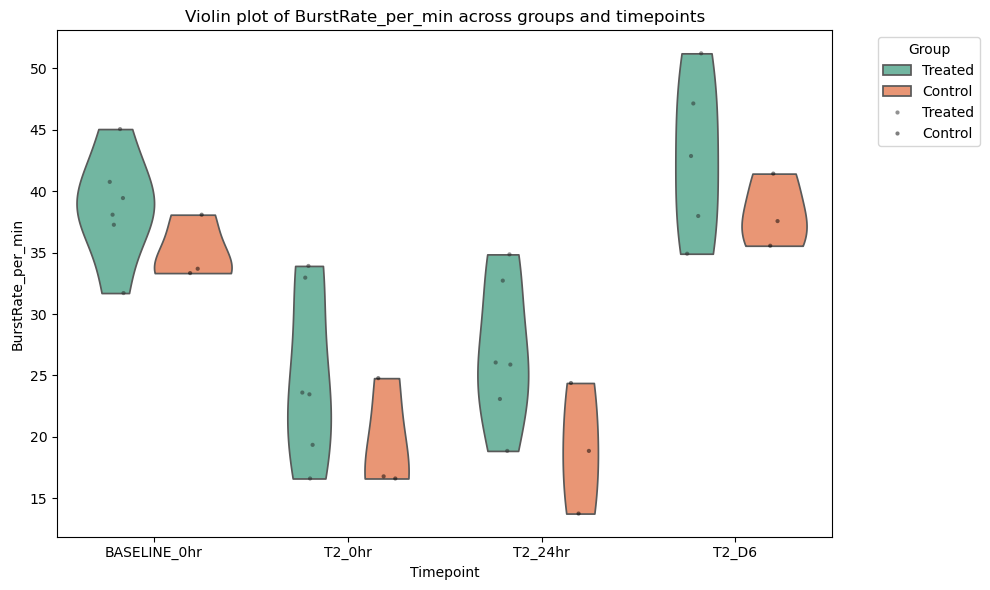

✅ Saved: burst_feature_visualizations/violinplots/MeanBurstDur_violinplot.png


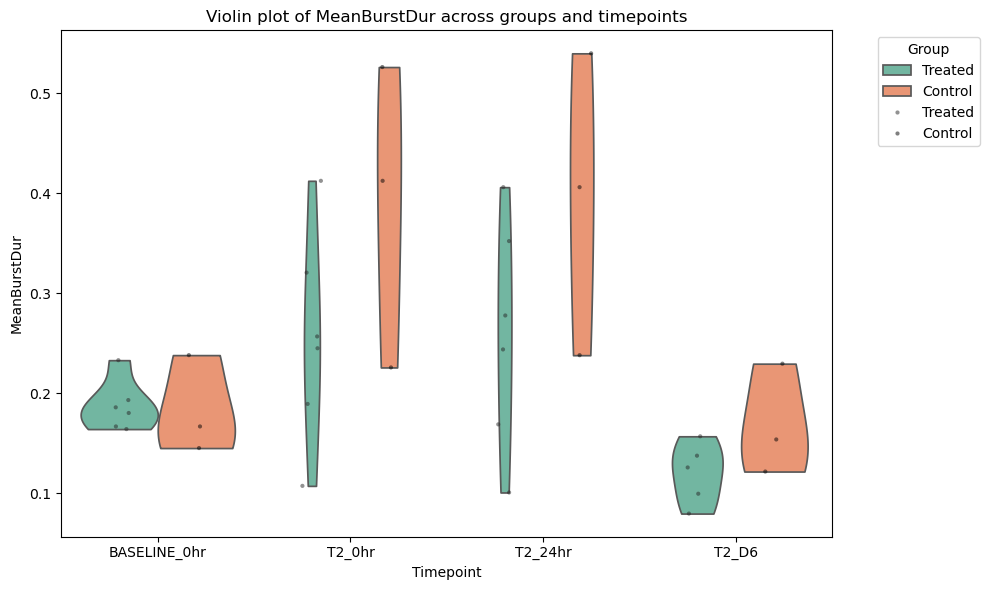

✅ Saved: burst_feature_visualizations/violinplots/StdBurstDur_violinplot.png


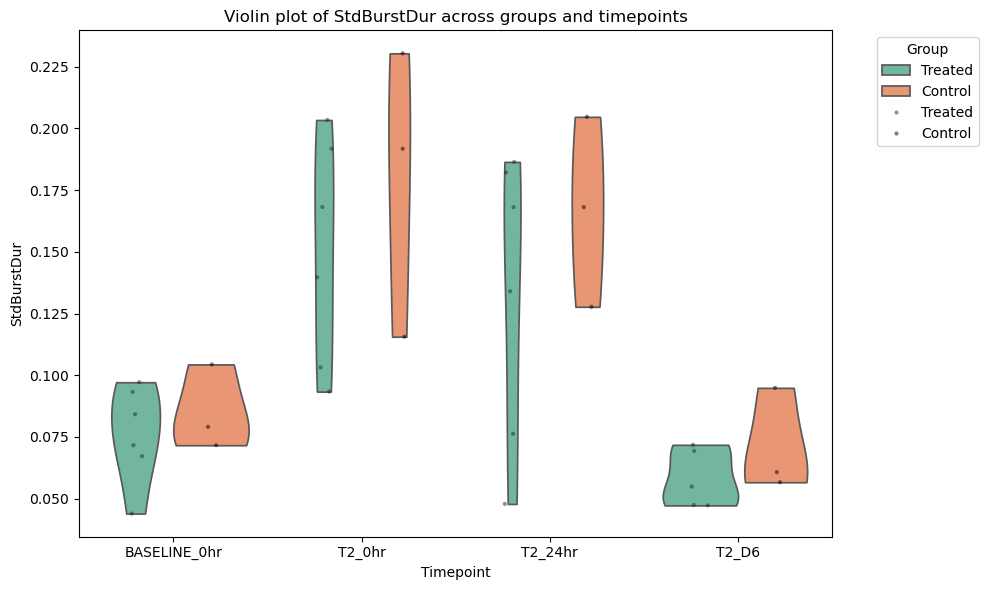

✅ Saved: burst_feature_visualizations/violinplots/SkewHistRelPeaks_violinplot.png


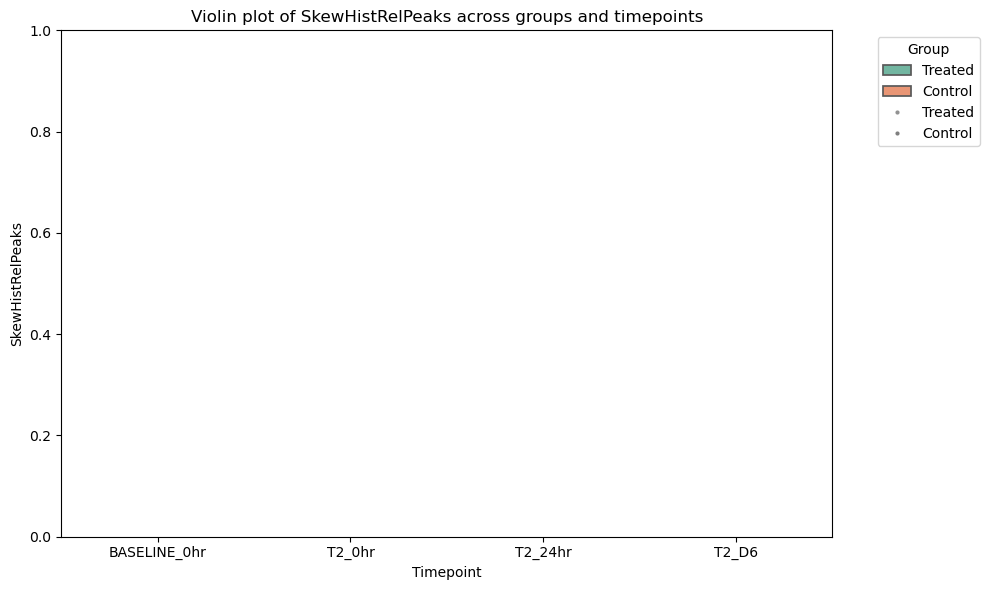

✅ Saved: burst_feature_visualizations/violinplots/KurtHistRelPeaks_violinplot.png


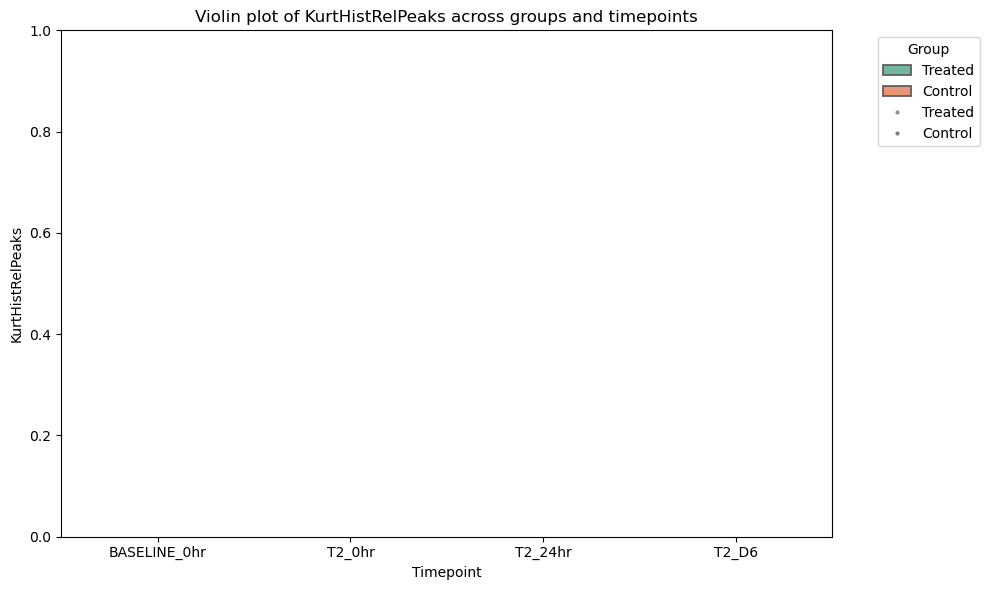

✅ Saved: burst_feature_visualizations/violinplots/BPI_violinplot.png


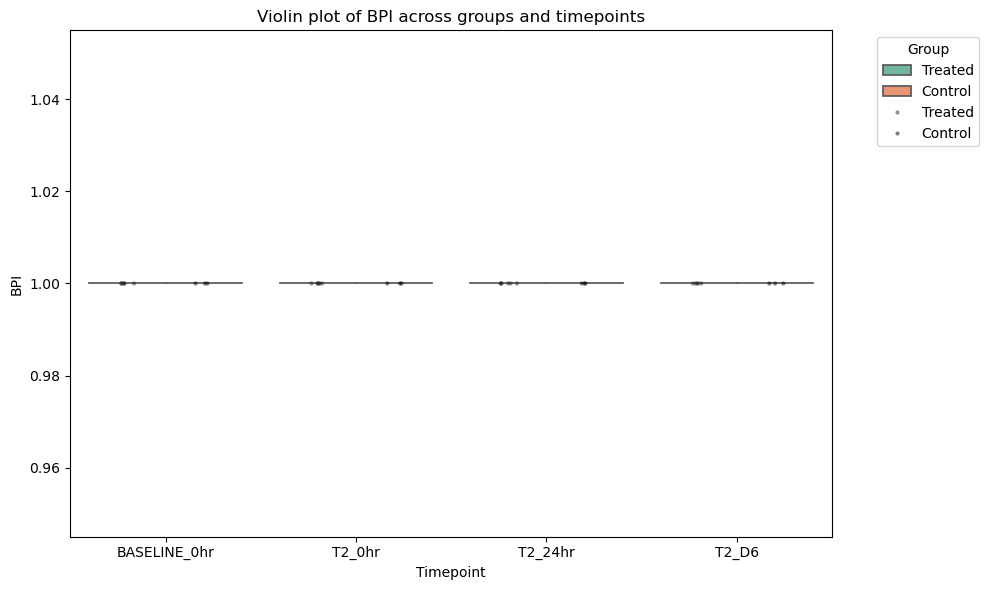

✅ Saved: burst_feature_visualizations/violinplots/FanoFactor_violinplot.png


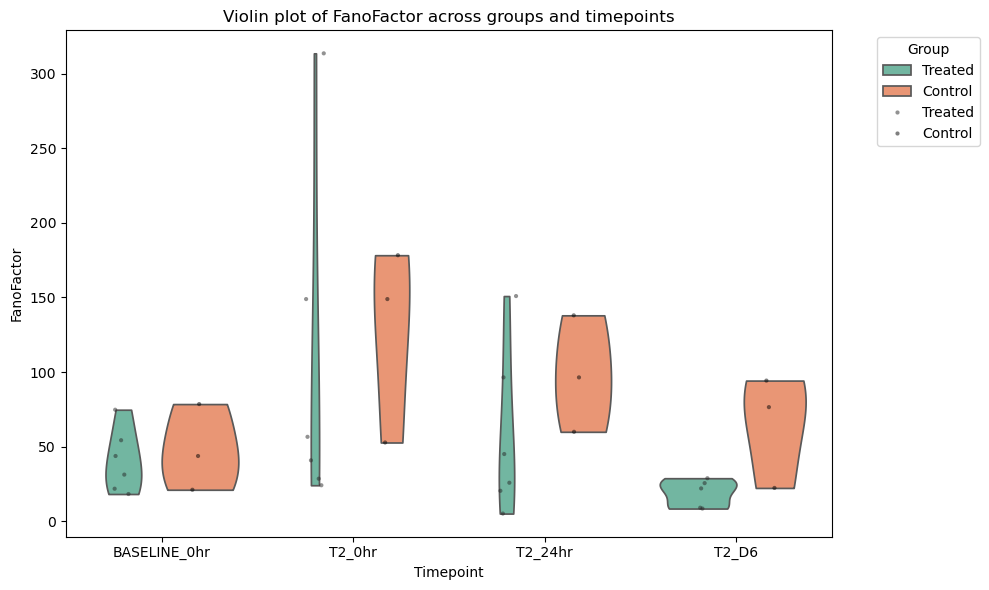

✅ Saved: burst_feature_visualizations/violinplots/Entropy_RelPeaks_violinplot.png


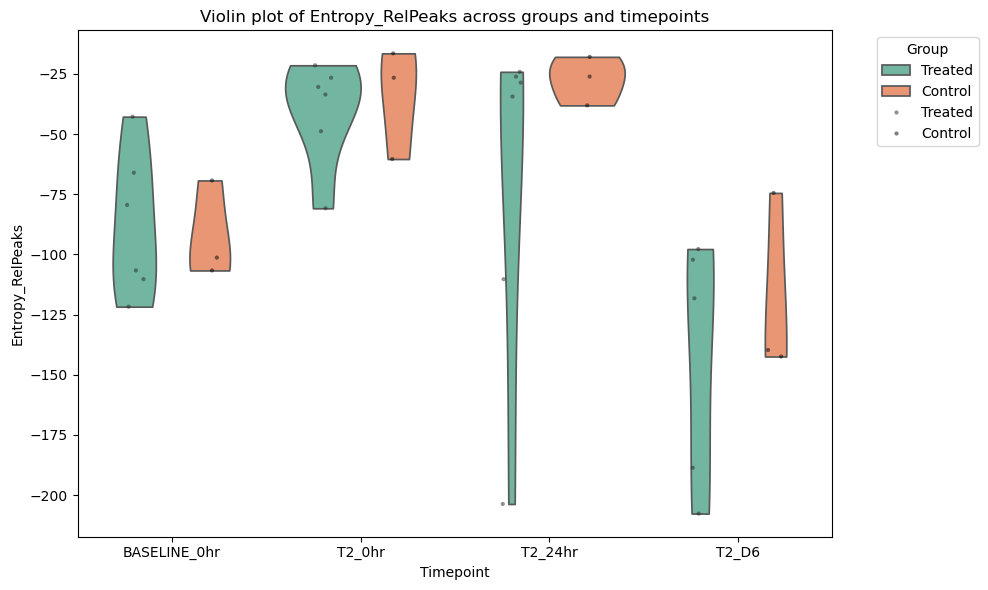

✅ Saved: burst_feature_visualizations/violinplots/PeakSpread_violinplot.png


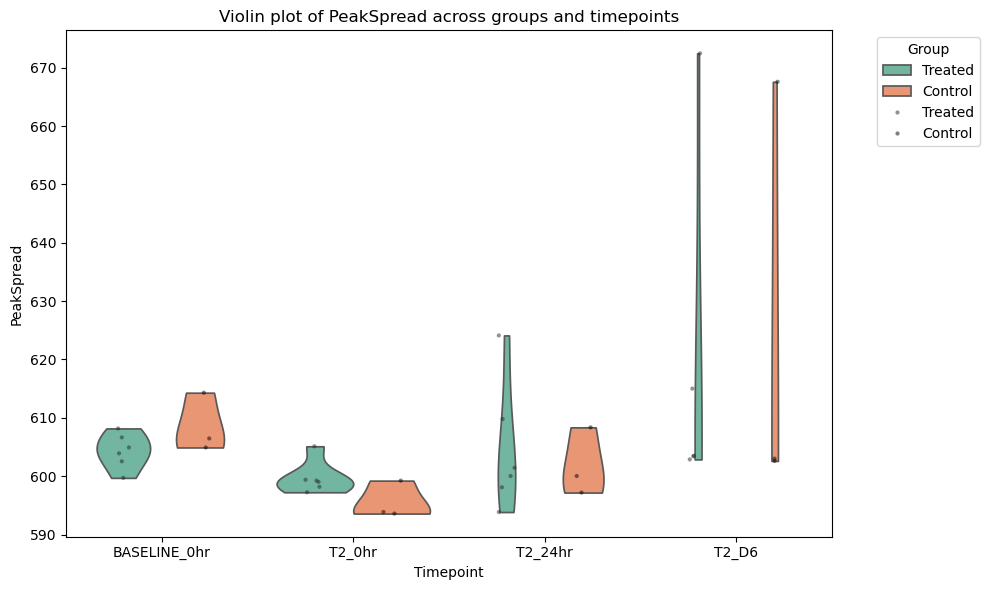

In [ ]:
# functions to visualize stats results and burst features from every angle

import seaborn as sns
import matplotlib.pyplot as plt
import os

def plot_burst_feature_violinplots(burst_features_df, metrics=None, save_dir=None):
    """
    Generate violin plots with overlaid strip plots for burst features across groups and timepoints.
    Handles mismatched column names gracefully.
    """

    # normalize column names for matching
    available_cols = {col.lower(): col for col in burst_features_df.columns}

    if metrics is None:
        metrics = [
            "BurstRate_per_min", "MeanBurstDur", "StdBurstDur",
            "SkewHistRelPeaks", "KurtHistRelPeaks", "BPI",
            "FanoFactor", "Entropy_RelPeaks", "PeakSpread"
        ]

    # normalize metrics to df columns
    matched_metrics = []
    for metric in metrics:
        key = metric.lower()
        if key in available_cols:
            matched_metrics.append(available_cols[key])
        else:
            print(f"Skipping '{metric}' (column not found).")

    if save_dir:
        save_dir = os.path.join(save_dir, "violinplots")
        os.makedirs(save_dir, exist_ok=True)

    for metric in matched_metrics:
        plt.figure(figsize=(10, 6))
        sns.violinplot(
            data=burst_features_df,
            x="Timepoint", y=metric, hue="Group",
            inner=None, palette="Set2", cut=0
        )
        sns.stripplot(
            data=burst_features_df,
            x="Timepoint", y=metric, hue="Group",
            dodge=True, jitter=True, alpha=0.5, palette="dark:k", size=3
        )
        plt.title(f"Violin plot of {metric} across groups and timepoints")
        plt.ylabel(metric)
        plt.xlabel("Timepoint")
        plt.legend(title="Group", bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()

        if save_dir:
            fname = os.path.join(save_dir, f"{metric}_violinplot.png")
            plt.savefig(fname, dpi=300)
            print(f"Saved: {fname}")

        plt.show()
plot_burst_feature_violinplots(burst_features_df, save_dir="burst_feature_visualizations")


/var/folders/5b/0knmz8lj0x91l7symv3p4q2m0000gn/T/ipykernel_20616/3266023262.py:39: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:k'` for the same effect.

  sns.stripplot(


✅ Saved: burst_feature_visualizations/violinplots/MeanBurstDur_violinplot.png


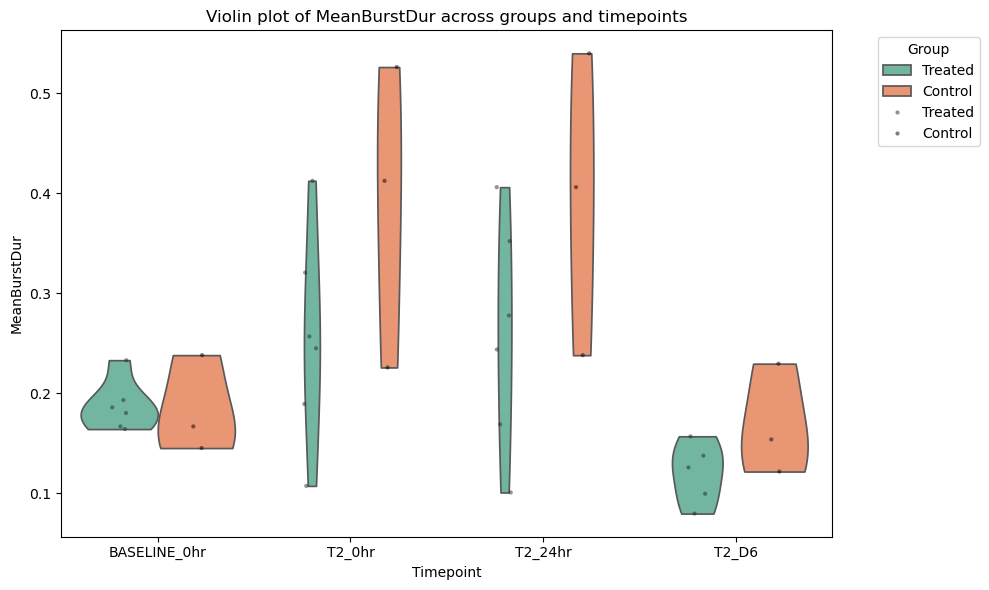

⚠️ Skipping 'BurstRatePerMin' (column not found in dataframe).


/var/folders/5b/0knmz8lj0x91l7symv3p4q2m0000gn/T/ipykernel_20616/3266023262.py:39: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:k'` for the same effect.

  sns.stripplot(


✅ Saved: burst_feature_visualizations/violinplots/SkewHistRelPeaks_violinplot.png


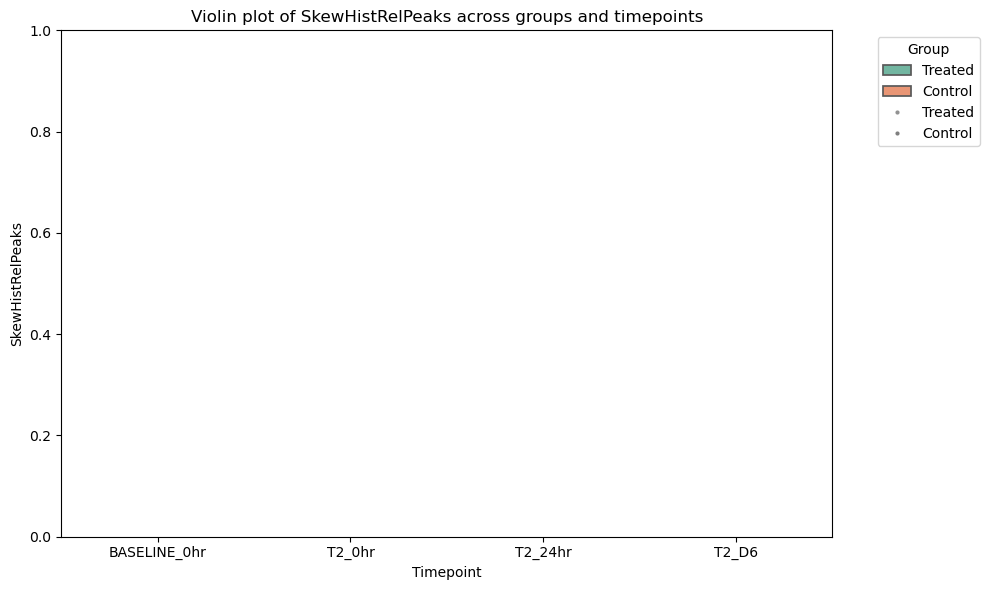

/var/folders/5b/0knmz8lj0x91l7symv3p4q2m0000gn/T/ipykernel_20616/3266023262.py:39: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:k'` for the same effect.

  sns.stripplot(


✅ Saved: burst_feature_visualizations/violinplots/KurtHistRelPeaks_violinplot.png


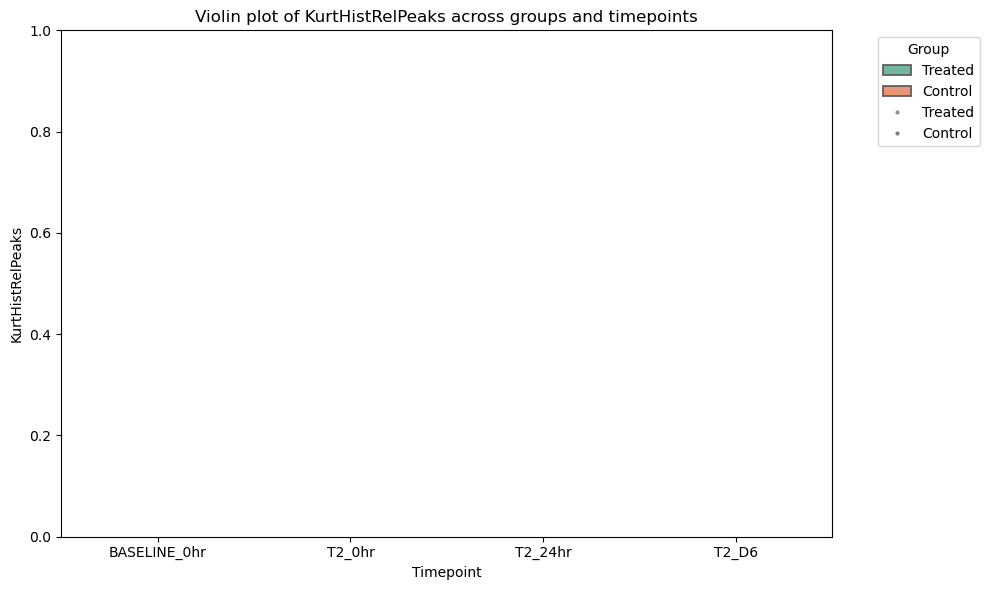

⚠️ Skipping 'SynchronyIndexHistPeaks' (column not found in dataframe).
⚠️ Skipping 'WidthHistPeaks' (column not found in dataframe).


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import os

def plot_burst_feature_violinplots(burst_features_df, metrics=None, save_dir=None):
    """
    Generate violin plots with overlaid strip plots for burst features across groups and timepoints.

    Parameters
    ----------
    burst_features_df : pd.DataFrame
        DataFrame containing burst feature metrics with columns: ["Group", "Timepoint", <metric names>]
    metrics : list, optional
        List of metrics to plot. If None, uses a default set.
    save_dir : str, optional
        Folder to save plots. If None, plots are only displayed.
    """
    if metrics is None:
        metrics = ["MeanBurstDur", "BurstRatePerMin", "SkewHistRelPeaks", 
                   "KurtHistRelPeaks", "SynchronyIndexHistPeaks", "WidthHistPeaks"]

    if save_dir:
        save_dir = os.path.join(save_dir, "violinplots")
        os.makedirs(save_dir, exist_ok=True)

    for metric in metrics:
        if metric not in burst_features_df.columns:
            print(f"Skipping '{metric}' (column not found in dataframe).")
            continue

        plt.figure(figsize=(10, 6))
        # Violin plot (distribution shape)
        sns.violinplot(
            data=burst_features_df,
            x="Timepoint", y=metric, hue="Group",
            inner=None, palette="Set2", cut=0
        )
        # Overlay individual data points
        sns.stripplot(
            data=burst_features_df,
            x="Timepoint", y=metric, hue="Group",
            dodge=True, jitter=True, alpha=0.5, color="k", size=3
        )
        plt.title(f"Violin plot of {metric} across groups and timepoints")
        plt.ylabel(metric)
        plt.xlabel("Timepoint")
        plt.legend(title="Group", bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()

        if save_dir:
            fname = os.path.join(save_dir, f"{metric}_violinplot.png")
            plt.savefig(fname, dpi=300)
            print(f"Saved: {fname}")

        plt.show()
plot_burst_feature_violinplots(burst_features_df, save_dir="burst_feature_visualizations")

/var/folders/5b/0knmz8lj0x91l7symv3p4q2m0000gn/T/ipykernel_20616/3419590834.py:21: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1.2}` instead.

  sns.barplot(


Saved: burst_feature_visualizations/MeanBurstDur_comparison.png


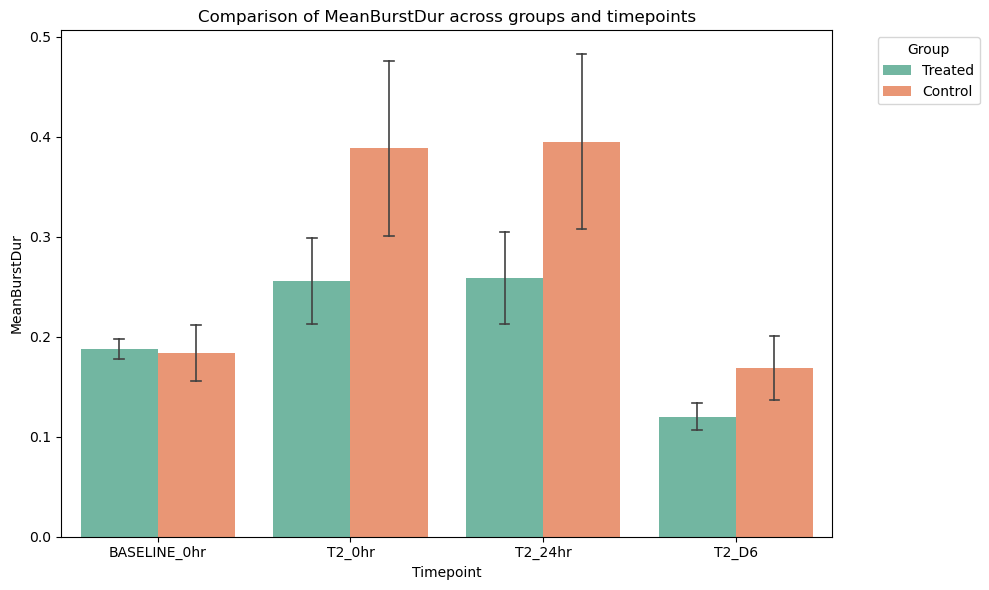

ValueError: Could not interpret value `BurstRatePerMin` for `y`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>

In [ ]:
# compare differences in burst features between groups

import seaborn as sns
import matplotlib.pyplot as plt
import os

def plot_burst_feature_comparisons(burst_features_df, 
                                   metrics=None, 
                                   save_dir=None):
    """
    Generate barplots for burst features across groups and timepoints.
    Compatible with Seaborn >=0.12.
    """
    if metrics is None:
        metrics = ["MeanBurstDur", "BurstRatePerMin", "SkewHistRelPeaks", 
                   "KurtHistRelPeaks", "SynchronyIndexHistPeaks", "WidthHistPeaks"]

    if save_dir and not os.path.exists(save_dir):
        os.makedirs(save_dir)

    for metric in metrics:
        plt.figure(figsize=(10, 6))
        sns.barplot(
            data=burst_features_df,
            x="Timepoint", y=metric, hue="Group",
            errorbar=("se", 1),   # replaces ci="se"
            capsize=0.1, errwidth=1.2, palette="Set2"
        )
        plt.title(f"Comparison of {metric} across groups and timepoints")
        plt.ylabel(metric)
        plt.xlabel("Timepoint")
        plt.legend(title="Group", bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()

        if save_dir:
            fname = os.path.join(save_dir, f"{metric}_comparison.png")
            plt.savefig(fname, dpi=300)
            print(f"Saved: {fname}")

        plt.show()
plot_burst_feature_comparisons(burst_features_df, save_dir="burst_feature_visualizations")


In [ ]:
print("Available columns:", burst_features_df.columns.tolist())

Available columns: ['Dataset', 'Group', 'Timepoint', 'BurstRate_per_min', 'MeanBurstDur', 'StdBurstDur', 'SkewBurstDur', 'KurtBurstDur', 'IBI_mean', 'IBI_std', 'IBI_CV', 'IBI_skew', 'IBI_kurt', 'BPI', 'FanoFactor', 'Entropy_RelPeaks', 'PeakSpread', 'MeanLeadWidth', 'MeanLagWidth', 'MeanTotalWidth', 'SkewHistRelPeaks', 'KurtHistRelPeaks']


/var/folders/5b/0knmz8lj0x91l7symv3p4q2m0000gn/T/ipykernel_20616/724499742.py:21: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1.2}` instead.

  sns.barplot(


✅ Saved: burst_feature_visualizations/MeanBurstDur_comparison.png


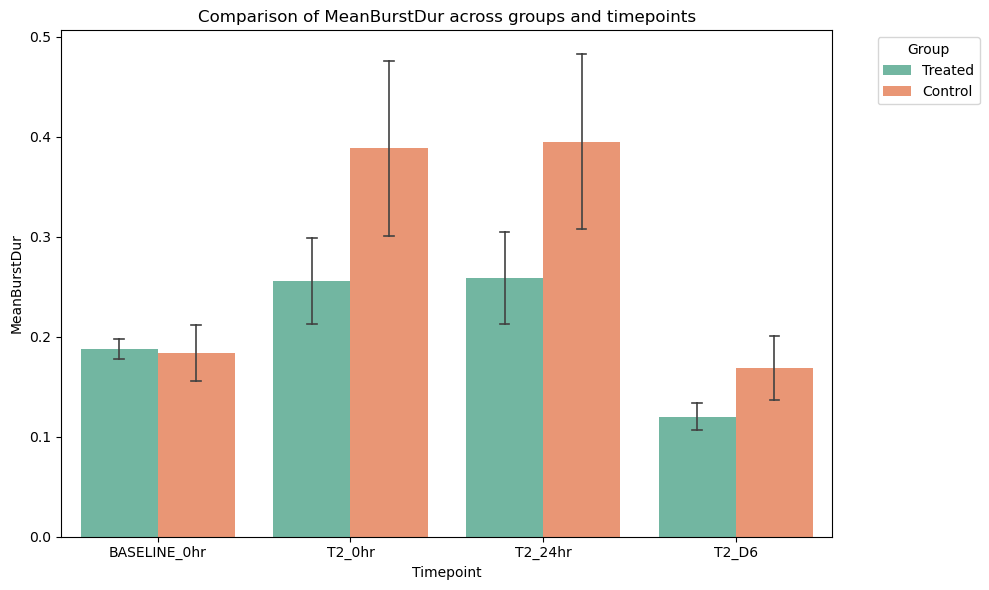

⚠️ Skipping 'BurstRatePerMin' (column not found in dataframe).


/var/folders/5b/0knmz8lj0x91l7symv3p4q2m0000gn/T/ipykernel_20616/724499742.py:21: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1.2}` instead.

  sns.barplot(


✅ Saved: burst_feature_visualizations/SkewHistRelPeaks_comparison.png


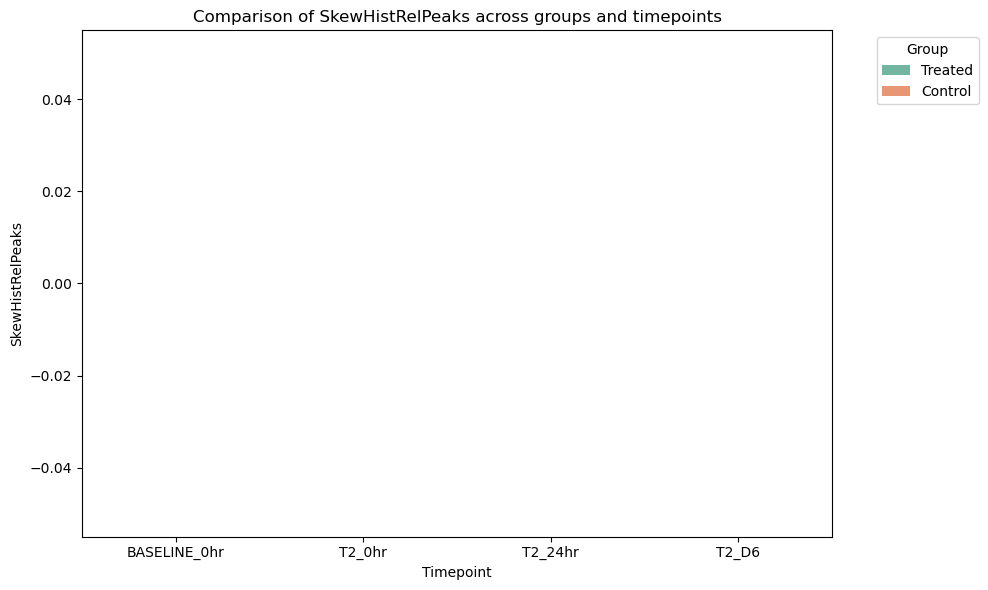

/var/folders/5b/0knmz8lj0x91l7symv3p4q2m0000gn/T/ipykernel_20616/724499742.py:21: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1.2}` instead.

  sns.barplot(


✅ Saved: burst_feature_visualizations/KurtHistRelPeaks_comparison.png


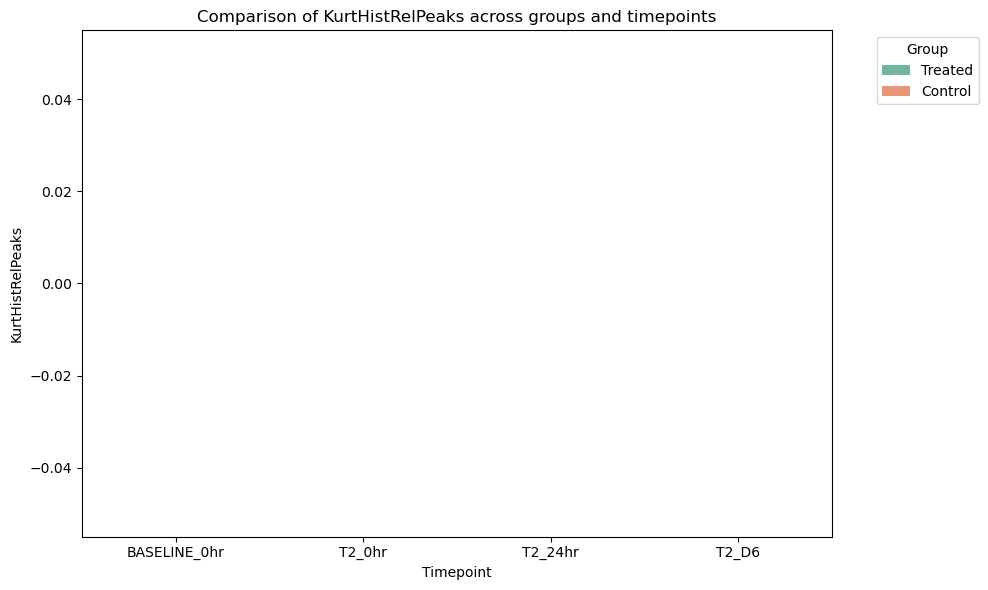

⚠️ Skipping 'SynchronyIndexHistPeaks' (column not found in dataframe).
⚠️ Skipping 'WidthHistPeaks' (column not found in dataframe).


In [ ]:
def plot_burst_feature_comparisons(burst_features_df, 
                                   metrics=None, 
                                   save_dir=None):
    """
    Generate barplots for burst features across groups and timepoints.
    Compatible with Seaborn >=0.12.
    """
    if metrics is None:
        metrics = ["MeanBurstDur", "BurstRatePerMin", "SkewHistRelPeaks", 
                   "KurtHistRelPeaks", "SynchronyIndexHistPeaks", "WidthHistPeaks"]

    if save_dir and not os.path.exists(save_dir):
        os.makedirs(save_dir)

    for metric in metrics:
        if metric not in burst_features_df.columns:
            print(f"Skipping '{metric}' (column not found in dataframe).")
            continue

        plt.figure(figsize=(10, 6))
        sns.barplot(
            data=burst_features_df,
            x="Timepoint", y=metric, hue="Group",
            errorbar=("se", 1),
            capsize=0.1, errwidth=1.2, palette="Set2"
        )
        plt.title(f"Comparison of {metric} across groups and timepoints")
        plt.ylabel(metric)
        plt.xlabel("Timepoint")
        plt.legend(title="Group", bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()

        if save_dir:
            fname = os.path.join(save_dir, f"{metric}_comparison.png")
            plt.savefig(fname, dpi=300)
            print(f"Saved: {fname}")

        plt.show()
plot_burst_feature_comparisons(burst_features_df, save_dir="burst_feature_visualizations")

/var/folders/5b/0knmz8lj0x91l7symv3p4q2m0000gn/T/ipykernel_20616/2912041711.py:32: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 'se')` for the same effect.

  sns.barplot(


TypeError: `errorbar` must be a callable, string, or (string, number) tuple

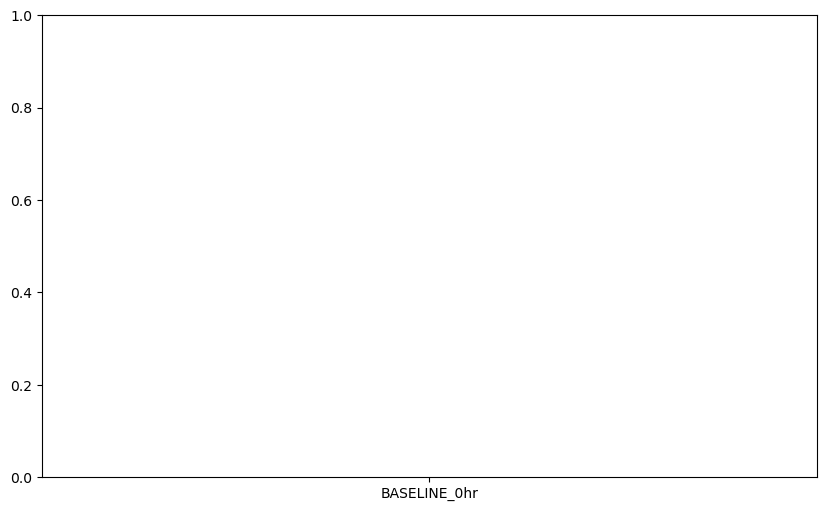

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_burst_feature_comparisons(burst_features_df, metrics=None, save_dir=None):
    """
    Plots comparisons of burst features across Group (Treated vs Control)
    and dataset timepoints using barplots and violin plots.
    """
    if metrics is None:
        metrics = [
            "BurstRate_per_min",
            "MeanBurstDur",
            "AvgPeakFR_per_unit_window",
            "BPI",
            "IBI_CV",
            "PeakSpread",
            "Entropy_RelPeaks"
        ]
    
    # Extract timepoints from Dataset name
    burst_features_df = burst_features_df.copy()
    burst_features_df["Timepoint"] = burst_features_df["Dataset"].apply(
        lambda x: next((tp for tp in ["BASELINE_0hr", "T2_0hr", "T2_24hr", "T2_D6"] if tp in x), "Unknown")
    )
    
    # Ensure save directory exists
    if save_dir:
        os.makedirs(save_dir, exist_ok=True)
    
    for metric in metrics:
        plt.figure(figsize=(10,6))
        sns.barplot(
            data=burst_features_df,
            x="Timepoint", y=metric, hue="Group",
            ci="se", capsize=0.1, errwidth=1.2, palette="Set2"
        )
        plt.title(f"Comparison of {metric} across groups and timepoints")
        plt.ylabel(metric)
        plt.xticks(rotation=45)
        plt.tight_layout()
        if save_dir:
            plt.savefig(os.path.join(save_dir, f"{metric}_barplot.png"), dpi=300)
        plt.show()
        
        # violin plot for same metric to compare
        plt.figure(figsize=(10,6))
        sns.violinplot(
            data=burst_features_df,
            x="Timepoint", y=metric, hue="Group",
            split=True, inner="quartile", palette="Set2"
        )
        plt.title(f"Distribution of {metric} across groups and timepoints")
        plt.ylabel(metric)
        plt.xticks(rotation=45)
        plt.tight_layout()
        if save_dir:
            plt.savefig(os.path.join(save_dir, f"{metric}_violinplot.png"), dpi=300)
        plt.show()

plot_burst_feature_comparisons(burst_features_df, save_dir="burst_feature_visualizations")

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import os

def plot_burst_features_by_sample_id(burst_features_df, 
                                     metrics=None, 
                                     save_dir="burst_feature_violinplots_sampleID"):
    """
    Generates violin plots for each Sample ID (aggregating all its timepoints).
    
    Parameters:
    -----------
    burst_features_df : pd.DataFrame
        Must contain columns: ['Dataset', 'Group', 'Timepoint', <metrics>...]
    metrics : list of str
        Metrics to plot. If None, all numeric columns except Dataset, Group, Timepoint are plotted.
    save_dir : str
        Directory where plots will be saved.
    """
    os.makedirs(save_dir, exist_ok=True)
    
    # --- Detect metrics automatically if not given ---
    exclude_cols = ["Dataset", "Group", "Timepoint"]
    if metrics is None:
        metrics = [col for col in burst_features_df.columns if col not in exclude_cols]
    
    # --- Extract Sample ID (prefix before first underscore) ---
    burst_features_df = burst_features_df.copy()
    burst_features_df["SampleID"] = burst_features_df["Dataset"].str.split("_").str[0]
    
    # --- Loop over unique Sample IDs ---
    sample_ids = burst_features_df["SampleID"].unique()
    
    for sample_id in sample_ids:
        sample_data = burst_features_df[burst_features_df["SampleID"] == sample_id]
        
        for metric in metrics:
            if metric not in sample_data.columns:
                print(f"Skipping '{metric}' (not in dataframe).")
                continue
            
            plt.figure(figsize=(8, 5))
            sns.violinplot(
                data=sample_data,
                x="Timepoint",
                y=metric,
                hue="Group",
                split=True,
                inner="point",
                palette="Set2"
            )
            plt.title(f"{metric} — Sample {sample_id}")
            plt.ylabel(metric)
            plt.xlabel("Timepoint")
            plt.legend(title="Group")
            plt.tight_layout()
            
            fname = os.path.join(save_dir, f"{sample_id}_{metric}_violinplot.png")
            plt.savefig(fname, dpi=300)
            plt.close()
            print(f"Saved plot: {fname}")

    print("All violin plots saved per Sample ID.")


In [ ]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def plot_sample_progression_facetgrid(burst_features_df, metric="BurstRate_per_min", save_dir="sample_progression_plots"):
    """
    Plots scatter+line plots showing metric progression across timepoints for each Sample ID.
    - One facet per unique Sample ID.
    - Different colors for Control vs Treated.
    - Uses currently loaded burst_features_df.
    """

    # Ensure output folder
    os.makedirs(save_dir, exist_ok=True)

    # Extract SampleID from Dataset column (before first "_")
    burst_features_df = burst_features_df.copy()
    burst_features_df["SampleID"] = burst_features_df["Dataset"].apply(lambda x: x.split("_")[0])

    # Check if metric exists
    if metric not in burst_features_df.columns:
        print(f"Metric '{metric}' not found in dataframe.")
        print("Available columns:", list(burst_features_df.columns))
        return

    # Define order of timepoints if known
    time_order = ["BASELINE_0hr", "T1_3hr", "T2_0hr", "T2_24hr", "T2_D6"]
    burst_features_df["Timepoint"] = pd.Categorical(
        burst_features_df["Timepoint"], 
        categories=time_order, 
        ordered=True
    )

    # Create FacetGrid
    g = sns.FacetGrid(
        burst_features_df,
        col="SampleID", col_wrap=3,
        hue="Group",
        sharey=False,
        height=4,
        aspect=1.2
    )

    # Scatter + line plot
    g.map_dataframe(sns.scatterplot, x="Timepoint", y=metric, style="Group", s=80)
    g.map_dataframe(sns.lineplot, x="Timepoint", y=metric, linewidth=1.5)

    # Adjust legend and titles
    g.add_legend()
    g.set_titles("{col_name}")
    g.set_axis_labels("Timepoint", metric)

    plt.subplots_adjust(top=0.9)
    g.fig.suptitle(f"Progression of {metric} across timepoints", fontsize=16)

    # Save figure
    save_dir = "/Users/main_mac/bioinformatics/projects/parkinsons/results"
    save_path = os.path.join(save_dir, f"{metric}_sample_progression.png")
    plt.savefig(save_path, dpi=300)
    plt.show()

    print(f"Saved facet grid plot to {save_path}")

In [ ]:
plot_sample_progression_facetgrid(
    burst_features_df,
    metric="BurstRate_per_min"
)
'''replace "BurstRate_per_min" with any column from your burst_features_df (e.g., "MeanBurstDur", "IBI_mean", "SkewHistRelPeaks").'''

works on the burst_features_df DataFrame that you generated earlier (the table of burst metrics).

Here’s how you can control which datasets are included:

1️⃣ Option A: Filter the DataFrame before plotting
You can select a subset of datasets (or groups or sample IDs) before calling the plotting function:

python
Copy
Edit
# Example: only include datasets from two specific sample IDs
subset_df = burst_features_df[
    burst_features_df['SampleID'].isin(['23128c', '24535c'])
]

plot_sample_progression_facetgrid_multi(subset_df, metrics=["BurstRate_per_min", "IBI_mean"])
Or, filter by condition (Group):

python
Copy
Edit
subset_df = burst_features_df[burst_features_df['Group'] == 'Control']
plot_sample_progression_facetgrid_multi(subset_df, metrics=["BurstRate_per_min"])
2️⃣ Option B: Filter at the dataset dictionary stage
If you want to build burst_features_df from only a specific subset of datasets:

python
Copy
Edit
selected_datasets = {
    "Control": [
        "23128c_KOLFMO_D91_Control_BASELINE_0hr",
        "23128c_KOLFMO_D92_Control_T2_0hr"
    ],
    "Treated": [
        "23128c_KOLFMO_D91_175µM_BASELINE_0hr",
        "23128c_KOLFMO_D92_175µM_T2_0hr"
    ]
}

burst_features_subset_df = compute_burst_features_full(orc, selected_datasets, config, histogram_data)

plot_sample_progression_facetgrid_multi(burst_features_subset_df, metrics=["BurstRate_per_min"])
How the function defines datasets internally
It pulls the SampleID from the "Dataset" column by splitting the filename before the first underscore.

Each facet in the plot corresponds to a unique SampleID.

The treatment group ("Control" or "Treated") is encoded in the "Group" column and used for color separation.

1️⃣ .isin(['23128c', '24535c'])
Correct – this is a filter for only those sample IDs.

Example:

python
Copy
Edit
subset_df = burst_features_df[burst_features_df['SampleID'].isin(['23128c', '24535c'])]
✅ Only datasets with SampleID = 23128c or 24535c will remain in subset_df.

This keeps all timepoints for those samples.

2️⃣ Further refinement – selecting specific timepoints
Yes, you can combine multiple conditions, for example:

python
Copy
Edit
subset_df = burst_features_df[
    (burst_features_df['SampleID'].isin(['23128c', '24535c'])) &
    (burst_features_df['Timepoint'].isin(['BASELINE_0hr', 'T2_24hr']))
]
This keeps only the selected samples AND the specified timepoints.

3️⃣ Selecting all treated samples
You can filter by the Group column:

python
Copy
Edit
treated_df = burst_features_df[burst_features_df['Group'] == 'Treated']
Or you can combine with timepoints:

python
Copy
Edit
treated_subset = burst_features_df[
    (burst_features_df['Group'] == 'Treated') &
    (burst_features_df['Timepoint'].isin(['T2_24hr', 'T2_D6']))
]
4️⃣ Using the dataset dictionary
Yes, with the dictionary you’re pre-filtering before computing features.

Example:

python
Copy
Edit
selected_datasets = {k: v for k, v in dataset_groups.items() if k == "Treated"}
burst_features_subset_df = compute_burst_features_full(orc, selected_datasets, config, histogram_data)
plot_sample_progression_facetgrid_multi(burst_features_subset_df, metrics=["BurstRate_per_min"])
This approach avoids computing features for unnecessary datasets but is slightly bulkier because you need to redefine selected_datasets.

5️⃣ What is histogram_data?
Yes – histogram_data is a list of dictionaries (from the plot_relative_unit_peak_histograms_grouped_debug function), holding relative peak times for each dataset.

We use it later to compute additional histogram-based metrics (skewness, kurtosis, etc.) in compute_burst_features_full.

✅ Summary:

Use burst_features_df filtering (.isin) for quick, flexible selection (samples, timepoints, conditions).

Use the dictionary method if you want to compute features only for a selected set of datasets (saves computation time).

histogram_data is just extra input for feature computations, not needed for plotting directly.

Would you like me to prepare a reusable “dataset filtering cell” (with dropdown-like variables) where you just set:

python
Copy
Edit
selected_samples = ["23128c", "24535c"]
selected_timepoints = ["BASELINE_0hr", "T2_24hr"]
selected_group = "Treated"
…and it automatically creates subset_df for plotting? This would make the selection step fast and avoid writing .isin manually each time.

1️⃣ Ensuring your data is not lost on kernel reset or log-off
DataFrames (burst_features_df, etc.) live only in RAM while your notebook session is active.

If you reset the kernel, all variables are erased.

✅ Solution:
Immediately save important DataFrames to .csv or .pkl (pickle) files after they are computed.

Example:

python
Copy
Edit
# Save
burst_features_df.to_csv("burst_features_full_summary.csv", index=False)
burst_features_df.to_pickle("burst_features_full_summary.pkl")

# Load later
burst_features_df = pd.read_csv("burst_features_full_summary.csv")
# or
burst_features_df = pd.read_pickle("burst_features_full_summary.pkl")
pickle preserves Python data types (sometimes better than CSV).

CSV is more universal (readable in Excel).

2️⃣ Avoiding redundant or duplicate information
Redundancy can happen if:

The compute function is run multiple times and appended instead of overwritten.

The same dataset is included twice.

✅ Prevention steps:

Check unique dataset counts:

python
Copy
Edit
burst_features_df['Dataset'].nunique()
Drop duplicates if needed:

python
Copy
Edit
burst_features_df = burst_features_df.drop_duplicates()
Before plotting, filter NaN or invalid entries:

python
Copy
Edit
clean_df = burst_features_df.dropna(subset=["BurstRate_per_min"])
This prevents ValueError issues in plots.

3️⃣ Saving and reloading CSV files
You can save any DataFrame as CSV:

python
Copy
Edit
df.to_csv("filename.csv", index=False)
And reload:

python
Copy
Edit
df = pd.read_csv("filename.csv")
This ensures your work persists across sessions and can be shared easily.

4️⃣ Generating a presentation-worthy table
You can beautify DataFrames for reports or presentations:

Option A: Pandas Styling

python
Copy
Edit
styled = df.head(20).style.background_gradient(cmap='Blues').format(precision=2)
styled
This gives you a color-highlighted, formatted table inside Jupyter.

Option B: Export to Excel with formatting

python
Copy
Edit
df.to_excel("burst_features_formatted.xlsx", index=False)
Then style in Excel (conditional formatting, borders, etc.).

Option C: Convert to LaTeX or HTML table

python
Copy
Edit
html_table = df.to_html()
latex_table = df.to_latex()
These can be inserted directly into a scientific paper or slide deck.

Always save your computed DataFrames to CSV or Pickle right after running a compute cell.

Maintain a dedicated "data" folder where you store these.

Build plots from the saved file to avoid accidental recomputation errors.

Would you like me to create a short "data management helper cell" for your notebook that does:

Saves all key DataFrames (burst_features_df, histogram_data) to CSV & pickle

Drops duplicates automatically

Reloads them safely if kernel is restarted?

DataFrames can absolutely reference and interact with each other in structured ways. You can think of multiple DataFrames like separate tables in a database. Pandas gives you powerful tools to link them by common identifiers, so you don't end up duplicating or losing information.

1️⃣ Common ways to reference DataFrames
🔹 Merge (SQL-style joins)
If your two DataFrames share a key column (e.g., "Dataset" or "SampleID"), you can merge them:

python
Copy
Edit
merged_df = pd.merge(df_burst_features, df_burst_configs, 
                     on="Dataset",  # or ['Dataset', 'Timepoint']
                     how="inner")
how="inner" → only datasets that appear in both tables

how="left" → keep all from df_burst_features, fill missing from df_burst_configs

This is like a relational database JOIN.

🔹 Lookup values across DataFrames
If you just want to add a single column from another DataFrame:

python
Copy
Edit
burst_features_df["ConfigParam"] = burst_features_df["Dataset"].map(
    df_burst_configs.set_index("Dataset")["ConfigParam"]
)
This avoids full merging if you only need one or two reference values.

🔹 Concatenate vertically or horizontally
Stack datasets: pd.concat([df1, df2], axis=0) (adds rows).

Add extra columns: pd.concat([df1, df2], axis=1) (adds side-by-side, must align on index).

2️⃣ Best practice for your case
Since you have:

DF1: burst features for each dataset (metrics results)

DF2: burst configs (which algorithm parameters produced those bursts)

You can keep them linked by Dataset and ConfigID:

python
Copy
Edit
combined_df = pd.merge(burst_features_df, burst_config_df, 
                       on=["Dataset", "ConfigID"], how="left")
This way:

Every metric is traceable to the exact config that generated it.

No duplication or ambiguity if multiple configs exist for one dataset.

3️⃣ Preventing conflicts
Always ensure unique keys:

python
Copy
Edit
burst_config_df[['Dataset','ConfigID']].duplicated().sum()
Drop duplicate rows before merging:

python
Copy
Edit
burst_features_df = burst_features_df.drop_duplicates()
This keeps your tables clean and avoids inflated sample counts in plots.

4️⃣ DataFrames are "references" by default
If you assign:

python
Copy
Edit
df2 = df1
They share memory – changes in df2 affect df1.

To make a copy:

python
Copy
Edit
df2 = df1.copy()
This distinction is important to prevent accidental overwrites.

✅ Recommendation
Treat each DataFrame as a table in a database.

Use Dataset + ConfigID as foreign keys.

Merge only when you need to analyze combined metrics.

Save both DataFrames to disk separately and keep merged results as a third file if needed.

Would you like me to write a "Data Management Helper Cell" that does all this at once:

Saves all DataFrames safely (burst features, histogram, config table).

Drops duplicates and logs counts.

On reload, auto-merges config info into the burst features table for easier plotting?




In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import os

def plot_sample_progression_facetgrid_multi(df, metrics=None, save_dir="sample_progression_plots"):
    """
    Generates FacetGrid line plots for multiple burst feature metrics over time for each sample.
    
    Parameters:
        df (pd.DataFrame): Burst features dataframe with columns:
                           ['Dataset', 'Group', 'Timepoint', <metrics>...]
        metrics (list): List of metric column names to plot.
        save_dir (str): Directory where plots will be saved.
    """
    if metrics is None:
        print("No metrics specified. Nothing plotted.")
        return

    os.makedirs(save_dir, exist_ok=True)
    
    # Extract Sample ID from Dataset name (everything before first underscore)
    df['SampleID'] = df['Dataset'].apply(lambda x: x.split('_')[0])
    
    for metric in metrics:
        if metric not in df.columns:
            print(f"Skipping '{metric}' (column not found in dataframe).")
            continue
        
        # Create facet grid by sample
        g = sns.FacetGrid(
            df, 
            col="SampleID", 
            hue="Group", 
            col_wrap=3, 
            height=3.5, 
            sharey=False
        )
        g.map(sns.lineplot, "Timepoint", metric, marker="o")
        g.add_legend()
        g.set_titles(col_template="{col_name}")
        g.fig.suptitle(f"Progression of {metric} per Sample", y=1.05)
        g.set_xticklabels(rotation=45)
        
        plt.tight_layout()
        save_path = os.path.join(save_dir, f"{metric}_facetgrid.png")
        plt.savefig(save_path, dpi=300, bbox_inches="tight")
        plt.close()
        print(f"Saved: {save_path}")


In [ ]:
'''This will: 
(1) loop through the metrics I specify
(2) create one PNG file per metric showing each SampleID as its own facet with timepoints on the X-axis
(3) keep control vs treated separated by color-coded lines'''

metrics_to_plot = ["BurstRate_per_min", "MeanBurstDur", "IBI_mean"]
plot_sample_progression_facetgrid_multi(burst_features_df, metrics=metrics_to_plot)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter, CoxPHFitter # installed lifelines but may need restart

def extract_ibi_data(orc, dataset_groups, config):
    """
    Extracts IBIs for each dataset and labels them by Group and Timepoint.
    Returns a DataFrame with columns: [Group, Dataset, Timepoint, IBI, Event]
    """
    records = []
    bin_size = config.get("bin_size_ms", 5.0) / 1000.0

    for group_name, datasets in dataset_groups.items():
        for dataset_key in datasets:
            try:
                detector = orc.get_burst_detector(dataset_key, config)
                times, smoothed, peaks, peak_times, bursts, burst_windows = detector.compute_population_rate_and_bursts()

                if peak_times is None or len(peak_times) < 2:
                    continue

                ibis = np.diff(peak_times)  # in seconds
                timepoint = next((tp for tp in ["BASELINE_0hr", "T2_0hr", "T2_24hr", "T2_D6"] if tp in dataset_key), "Unknown")

                for ibi in ibis:
                    records.append({
                        "Group": group_name,
                        "Dataset": dataset_key,
                        "Timepoint": timepoint,
                        "IBI": ibi,
                        "Event": 1  # all events observed (no events censored)
                    })
            except Exception as e:
                print(f"Error extracting IBIs from {dataset_key}: {e}")

    return pd.DataFrame(records)

def plot_kaplan_meier(df):
    """
    Generates Kaplan-Meier survival curves for Treated vs Control across all IBIs.
    """
    kmf = KaplanMeierFitter()
    plt.figure(figsize=(8,6))

    for group in df["Group"].unique():
        kmf.fit(durations=df.loc[df["Group"]==group, "IBI"],
                event_observed=df.loc[df["Group"]==group, "Event"],
                label=group)
        kmf.plot_survival_function(ci_show=True)

    plt.title("Kaplan-Meier Survival Curves for IBIs")
    plt.xlabel("Time since last burst (s)")
    plt.ylabel("Survival probability (no next burst)")
    plt.grid(True)
    plt.show()

def run_cox_model(df):
    """
    Runs a Cox proportional hazards regression to test treatment effect on hazard of next burst.
    """
    # convert categorical columns to dummy vars
    df_encoded = pd.get_dummies(df[["Group", "Timepoint", "IBI", "Event"]], drop_first=True)
    cph = CoxPHFitter()
    cph.fit(df_encoded, duration_col="IBI", event_col="Event")
    cph.print_summary()  # hazard ratios, p-values
    return cph

ibi_df = extract_ibi_data(orc, dataset_groups, config)
print(f"Extracted {len(ibi_df)} IBIs from dataset.")

if not ibi_df.empty:
    plot_kaplan_meier(ibi_df)
    cph_model = run_cox_model(ibi_df)

ModuleNotFoundError: No module named 'lifelines'

In [ ]:
# burst feature plots

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# load feature summary
df = pd.read_csv("burst_features_full_summary.csv")

# create save folder
save_dir = "burst_feature_plots_fixed"
os.makedirs(save_dir, exist_ok=True)

metrics = [
    "BurstRate_per_min", "MeanBurstDur", "StdBurstDur", "SkewBurstDur", "KurtBurstDur",
    "IBI_mean", "IBI_std", "IBI_CV", "IBI_skew", "IBI_kurt",
    "BPI", "FanoFactor", "Entropy_RelPeaks",
    "PeakSpread", "MeanLeadWidth", "MeanLagWidth", "MeanTotalWidth",
    "SkewHistRelPeaks", "KurtHistRelPeaks"
]

sns.set(style="whitegrid", palette="muted", context="talk")

for metric in metrics:
    if metric not in df.columns:
        print(f"⚠️ Skipping {metric} (not found in dataframe)")
        continue

    # drop NaNs, check data availability
    data = df.dropna(subset=[metric, "Group", "Timepoint"])
    if data.empty or data["Group"].nunique() < 1 or data["Timepoint"].nunique() < 1:
        print(f"Skipping {metric} (insufficient data)")
        continue

    
    # BOX
    
    plt.figure(figsize=(12, 6))
    ax = sns.boxplot(x="Timepoint", y=metric, hue="Group", data=data, showfliers=False, dodge=True)
    sns.stripplot(x="Timepoint", y=metric, hue="Group", data=data,
                  dodge=True, jitter=True, alpha=0.4, linewidth=0.5, palette="dark:.3", legend=False)

    plt.title(f"{metric} by Group and Timepoint")
    plt.xticks(rotation=30)

    # make sure no duplicate legends!

    handles, labels = ax.get_legend_handles_labels()
    unique = dict(zip(labels, handles))
    plt.legend(unique.values(), unique.keys())
    plt.tight_layout()
    plt.savefig(os.path.join(save_dir, f"Boxplot_{metric}.png"), dpi=300)
    plt.close()
    
    # VIOLIN
    
    plt.figure(figsize=(12, 6))
    ax = sns.violinplot(x="Timepoint", y=metric, hue="Group", data=data, split=True, inner="quartile")
    plt.title(f"{metric} by Group and Timepoint (Violin Plot)")
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.savefig(os.path.join(save_dir, f"Violin_{metric}.png"), dpi=300)
    plt.close()

    print(f"Saved boxplot and violin plot for {metric}")

print("All feature plots saved in:", save_dir)

✅ Saved boxplot and violin plot for BurstRate_per_min
✅ Saved boxplot and violin plot for MeanBurstDur
✅ Saved boxplot and violin plot for StdBurstDur
✅ Saved boxplot and violin plot for SkewBurstDur
✅ Saved boxplot and violin plot for KurtBurstDur
✅ Saved boxplot and violin plot for IBI_mean
✅ Saved boxplot and violin plot for IBI_std
✅ Saved boxplot and violin plot for IBI_CV
✅ Saved boxplot and violin plot for IBI_skew
✅ Saved boxplot and violin plot for IBI_kurt
✅ Saved boxplot and violin plot for BPI
✅ Saved boxplot and violin plot for FanoFactor
✅ Saved boxplot and violin plot for Entropy_RelPeaks
✅ Saved boxplot and violin plot for PeakSpread
✅ Saved boxplot and violin plot for MeanLeadWidth
✅ Saved boxplot and violin plot for MeanLagWidth
✅ Saved boxplot and violin plot for MeanTotalWidth
⚠️ Skipping SkewHistRelPeaks (insufficient data)
⚠️ Skipping KurtHistRelPeaks (insufficient data)
✅ All fixed feature plots saved in: burst_feature_plots_fixed


In [ ]:
# map everything in dataframes to sample ID

import seaborn as sns
import matplotlib.pyplot as plt
import os

def plot_burst_features_by_sample_id(burst_features_df, 
                                     metrics=None, 
                                     save_dir="burst_feature_violinplots_sampleID"):
    """
    Generates violin plots for each Sample ID (aggregating all its timepoints).
    
    Parameters:
    -----------
    burst_features_df : pd.DataFrame
        Must contain columns: ['Dataset', 'Group', 'Timepoint', <metrics>...]
    metrics : list of str
        Metrics to plot. If None, all numeric columns except Dataset, Group, Timepoint are plotted.
    save_dir : str
        Directory where plots will be saved.
    """
    os.makedirs(save_dir, exist_ok=True)
    
    # detect metrics automatically 
    exclude_cols = ["Dataset", "Group", "Timepoint"]
    if metrics is None:
        metrics = [col for col in burst_features_df.columns if col not in exclude_cols]
    
    # extract sample ID from dataset key
    burst_features_df = burst_features_df.copy()
    burst_features_df["SampleID"] = burst_features_df["Dataset"].str.split("_").str[0]
    
    # loop over unique sample IDs 
    sample_ids = burst_features_df["SampleID"].unique()
    
    for sample_id in sample_ids:
        sample_data = burst_features_df[burst_features_df["SampleID"] == sample_id]
        
        for metric in metrics:
            if metric not in sample_data.columns:
                print(f"Skipping '{metric}' (not in dataframe).")
                continue
            
            plt.figure(figsize=(8, 5))
            sns.violinplot(
                data=sample_data,
                x="Timepoint",
                y=metric,
                hue="Group",
                split=True,
                inner="point",
                palette="Set2"
            )
            plt.title(f"{metric} — Sample {sample_id}")
            plt.ylabel(metric)
            plt.xlabel("Timepoint")
            plt.legend(title="Group")
            plt.tight_layout()
            
            fname = os.path.join(save_dir, f"{sample_id}_{metric}_violinplot.png")
            plt.savefig(fname, dpi=300)
            plt.close()
            print(f"Saved plot: {fname}")

    print("All violin plots saved per Sample ID.")

In [ ]:
# facet grid of groups over time

import os
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

''' replace "BurstRate_per_min" with any column from your burst_features_df (e.g., "MeanBurstDur", "IBI_mean", "SkewHistRelPeaks".'''

def plot_sample_progression_facetgrid_multi(df, metrics=None, save_dir="sample_progression_plots"):
    """
    Generates FacetGrid line plots for multiple burst feature metrics over time for each sample.
    
    Parameters:
        df (pd.DataFrame): Burst features dataframe with columns:
                           ['Dataset', 'Group', 'Timepoint', <metrics>...]
        metrics (list): List of metric column names to plot.
        save_dir (str): Directory where plots will be saved.
    """
    if metrics is None:
        print("No metrics specified. Nothing plotted.")
        return

    os.makedirs(save_dir, exist_ok=True)
    
    # get sample ID from dataset key
    df['SampleID'] = df['Dataset'].apply(lambda x: x.split('_')[0])
    
    for metric in metrics:
        if metric not in df.columns:
            print(f"Skipping '{metric}' (column not found in dataframe).")
            continue
        
        # create facet grid by sample
        g = sns.FacetGrid(
            df, 
            col="SampleID", 
            hue="Group", 
            col_wrap=3, 
            height=3.5, 
            sharey=False
        )
        g.map(sns.lineplot, "Timepoint", metric, marker="o")
        g.add_legend()
        g.set_titles(col_template="{col_name}")
        g.fig.suptitle(f"Progression of {metric} per Sample", y=1.05)
        g.set_xticklabels(rotation=45)
        
        plt.tight_layout()
        save_path = os.path.join(save_dir, f"{metric}_facetgrid.png")
        plt.savefig(save_path, dpi=300, bbox_inches="tight")
        plt.close()
        print(f"Saved: {save_path}")

metrics_to_plot = ["BurstRate_per_min", "MeanBurstDur", "IBI_mean"]
plot_sample_progression_facetgrid_multi(burst_features_df, metrics=metrics_to_plot)

In [ ]:
# plotting and facet grid ui 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact, widgets

def plot_facet_interactive(metric="BurstRate_per_min", 
                           experiment_group=None, 
                           sample_ids=None, 
                           timepoints=None):
    """
    Interactive plot of burst features filtered by experiment group, sample IDs, and timepoints.
    Works on the burst_features_df that you already computed.
    """
    if burst_features_df.empty:
        print("burst_features_df is empty. Compute features first.")
        return

    df = burst_features_df.copy()
    
    # filter by experiment
    if experiment_group and experiment_group in dataset_groups:
        datasets_in_group = dataset_groups[experiment_group]
        df = df[df["Dataset"].isin(datasets_in_group)]
    
    # filter by sample ID(s)
    if sample_ids:
        df = df[df["Dataset"].str.contains('|'.join(sample_ids))]
    
    # filter by timepoints
    if timepoints:
        df = df[df["Timepoint"].isin(timepoints)]
    
    if df.empty:
        print("No data available for current selection.")
        return
    
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=df, x="Timepoint", y=metric, hue="Dataset", marker="o")
    plt.title(f"{metric} over time")
    plt.ylabel(metric)
    plt.xlabel("Timepoint")
    plt.xticks(rotation=45)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# metrics
available_metrics = [col for col in burst_features_df.columns if col not in ["Dataset", "Group", "Timepoint"]]

interact(
    plot_facet_interactive,
    metric=widgets.Dropdown(options=available_metrics, value=available_metrics[0], description="Metric:"),
    experiment_group=widgets.Dropdown(options=[None] + list(dataset_groups.keys()), value=None, description="Experiment:"),
    sample_ids=widgets.SelectMultiple(options=list(set(burst_features_df["Dataset"].str.split("_").str[0])), description="Sample IDs:"),
    timepoints=widgets.SelectMultiple(options=list(burst_features_df["Timepoint"].unique()), description="Timepoints:")
);


interactive(children=(Dropdown(description='Metric:', options=('BurstRate_per_min', 'MeanBurstDur', 'StdBurstD…

In [ ]:
'''

Select:

Metric: e.g., "BurstRate_per_min" or "MeanBurstDur"

Experiment Group: "maxone_run1", "maxtwo_newconfig1", etc.

Sample IDs: e.g., "23128c", "24535c" (you can select multiple)

Timepoints: one or more recordings

A line plot appears, showing the chosen burst feature across timepoints for your selected samples.

Each sample ID gets its own line, so you can compare them clearly.
'''


In [ ]:
# metrics
available_metrics = [col for col in burst_features_df.columns if col not in ["Dataset", "Group", "Timepoint"]]

interact(
    plot_facet_interactive,
    metric=widgets.Dropdown(options=available_metrics, value=available_metrics[0], description="Metric:"),
    experiment_group=widgets.Dropdown(options=[None] + list(dataset_groups.keys()), value=None, description="Experiment:"),
    sample_ids=widgets.SelectMultiple(options=list(set(burst_features_df["Dataset"].str.split("_").str[0])), description="Sample IDs:"),
    timepoints=widgets.SelectMultiple(options=list(burst_features_df["Timepoint"].unique()), description="Timepoints:"))

interactive(children=(Dropdown(description='Metric:', options=('BurstRate_per_min', 'MeanBurstDur', 'StdBurstD…

<function __main__.plot_facet_interactive(metric='BurstRate_per_min', experiment_group=None, sample_ids=None, timepoints=None)>

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact, widgets

def plot_facet_interactive(metric="BurstRate_per_min", 
                           experiment_group=None, 
                           sample_ids=None, 
                           timepoints=None):
    """
    Interactive plot of burst features filtered by experiment group, sample IDs, and timepoints.
    Works on the burst_features_df that you already computed.
    """
    if burst_features_df.empty:
        print("burst_features_df is empty. Compute features first.")
        return

    df = burst_features_df.copy()
    
    # filter by experiment group (if provided)
    if experiment_group and experiment_group in dataset_groups:
        datasets_in_group = dataset_groups[experiment_group]
        df = df[df["Dataset"].isin(datasets_in_group)]
    
    # Filter by sample ID(s)
    if sample_ids:
        df = df[df["Dataset"].str.contains('|'.join(sample_ids))]
    
    # Filter by timepoints
    if timepoints:
        df = df[df["Timepoint"].isin(timepoints)]
    
    if df.empty:
        print("⚠️ No data available for current selection.")
        return
    
    # Plot
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=df, x="Timepoint", y=metric, hue="Dataset", marker="o")
    plt.title(f"{metric} over time")
    plt.ylabel(metric)
    plt.xlabel("Timepoint")
    plt.xticks(rotation=45)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()


import seaborn as sns
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact

# -----------------------
# Interactive plotting UI
# -----------------------
# Simplify dataset labels for plotting
burst_features_df['DatasetShort'] = burst_features_df['Dataset'].str.split('_').str[0]

def update_plot(plot_type, metric):
    plt.figure(figsize=(10, 6))

    if plot_type == 'Line':
        sns.lineplot(
            data=burst_features_df,
            x='Timepoint', y=metric,
            hue='DatasetShort', style='Group', marker='o'
        )

    elif plot_type == 'Scatter':
        sns.scatterplot(
            data=burst_features_df,
            x='Timepoint', y=metric,
            hue='Group', style='DatasetShort', s=80
        )
        sns.lineplot(
            data=burst_features_df,
            x='Timepoint', y=metric,
            hue='Group', estimator='mean', ci=None,
            lw=2, legend=False, color='black', linestyle='--'
        )

    elif plot_type == 'Violin':
        sns.violinplot(
            data=burst_features_df,
            x='Timepoint', y=metric,
            hue='Group', split=True
        )

    elif plot_type == 'Histogram':
        sns.histplot(
            data=burst_features_df,
            x=metric, hue='Group',
            bins=30, kde=True, element='step'
        )

    elif plot_type == 'Bar':
        sns.barplot(
            data=burst_features_df,
            x='Timepoint', y=metric,
            hue='Group', errorbar=('se', 1)
        )

    elif plot_type == 'Box':
        sns.boxplot(
            data=burst_features_df,
            x='Timepoint', y=metric,
            hue='Group'
        )

    plt.title(f"{metric} by Group and Timepoint")
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.legend(title="Sample ID", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

# Dropdown widgets
plot_type_widget = widgets.Dropdown(
    options=['Line', 'Scatter', 'Violin', 'Histogram', 'Bar', 'Box'],
    value='Line',
    description='Plot type:'
)

metric_widget = widgets.Dropdown(
    options=[col for col in burst_features_df.columns if col not in ['Dataset', 'DatasetShort', 'Group', 'Timepoint']],
    description='Metric:'
)

interact(update_plot, plot_type=plot_type_widget, metric=metric_widget)

interactive(children=(Dropdown(description='Plot type:', options=('Line', 'Scatter', 'Violin', 'Histogram', 'B…

<function __main__.update_plot(plot_type, metric)>

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact

# Shorten dataset names for cleaner legends
burst_features_df['DatasetShort'] = burst_features_df['Dataset'].str.split('_').str[0]

# --- Widgets ---
sample_id_widget = widgets.SelectMultiple(
    options=sorted(burst_features_df['DatasetShort'].unique()),
    value=tuple(sorted(burst_features_df['DatasetShort'].unique()[:3])),  # pre-select first 3
    description='Sample IDs',
    layout=widgets.Layout(width='40%')
)

plot_type_widget = widgets.Dropdown(
    options=['Line', 'Scatter', 'Violin', 'Histogram', 'Bar', 'Box'],
    value='Line',
    description='Plot type:'
)

metric_widget = widgets.Dropdown(
    options=[col for col in burst_features_df.columns if col not in ['Dataset','DatasetShort','Group','Timepoint']],
    value='BurstRate_per_min',
    description='Metric:'
)

# --- Plotting Function ---
def update_plot(plot_type, metric, sample_ids):
    filtered_df = burst_features_df[burst_features_df['DatasetShort'].isin(sample_ids)]

    plt.figure(figsize=(10, 6))

    if plot_type == 'Line':
        sns.lineplot(
            data=filtered_df,
            x='Timepoint', y=metric,
            hue='DatasetShort', style='Group', marker='o'
        )

    elif plot_type == 'Scatter':
        sns.scatterplot(
            data=filtered_df,
            x='Timepoint', y=metric,
            hue='DatasetShort', style='Group', s=80
        )

    elif plot_type == 'Violin':
        sns.violinplot(
            data=filtered_df,
            x='Timepoint', y=metric,
            hue='Group', split=True
        )
        # Show mean points
        sns.stripplot(
            data=filtered_df,
            x='Timepoint', y=metric,
            hue='Group', dodge=True, color='black', size=4,
            marker='o', alpha=0.7
        )
        plt.legend([],[], frameon=False)

    elif plot_type == 'Histogram':
        sns.histplot(
            data=filtered_df,
            x=metric, hue='DatasetShort',
            bins=20, kde=True, element='step', stat='count'
        )

    elif plot_type == 'Bar':
        sns.barplot(
            data=filtered_df,
            x='Timepoint', y=metric,
            hue='DatasetShort', errorbar=('se', 1)
        )

    elif plot_type == 'Box':
        sns.boxplot(
            data=filtered_df,
            x='Timepoint', y=metric,
            hue='DatasetShort'
        )

    plt.title(f"{metric} by Sample ID and Timepoint")
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.legend(title="Sample ID", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

# --- Interactive UI ---
widgets.interact(
    update_plot,
    plot_type=plot_type_widget,
    metric=metric_widget,
    sample_ids=sample_id_widget
)


interactive(children=(Dropdown(description='Plot type:', options=('Line', 'Scatter', 'Violin', 'Histogram', 'B…

<function __main__.update_plot(plot_type, metric, sample_ids)>

In [ ]:
# Enhanced Burst Feature UI


import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
import pandas as pd


# plot_burst_feature_comparisons(burst_features_df, save_dir="burst_feature_visualizations")
# interactive_plot_ui(burst_features_df)  

def plot_ui_v2(df):
    """
    ** Interactive UI for visualizing burst feature metrics with multiple plot types.
    ** Manages groups/subgroups of/within samples and maintains Treated vs Control distinctions
    """

    # keep after the column names
    available_metrics = [col for col in df.columns 
                         if col not in ['Dataset', 'Group', 'Timepoint', 'SampleID']]
    
    # define dropdown widgets - metrics, plot types
    metric_dropdown = widgets.Dropdown(
        options=available_metrics,
        description='Metric:',
        value=available_metrics[0]
    )

    plot_type_dropdown = widgets.Dropdown(
        options=['Line', 'Scatter', 'Violin', 'Histogram', 'Bar', 'Box'],
        description='Plot Type:',
        value='Line'
    )

    # the central function 

    def update_plot(metric, plot_type):
        plt.figure(figsize=(10, 6))
        sns.set(style="whitegrid")

        if plot_type == 'Line':
            sns.lineplot(data=df, x='Timepoint', y=metric,
                         hue='Dataset', style='Group', marker='o')
            plt.title(f"{metric} over Time by Dataset & Group")

        elif plot_type == 'Scatter':
            sns.scatterplot(data=df, x='Timepoint', y=metric,
                            hue='Group', style='Dataset', s=80)
            sns.lineplot(data=df, x='Timepoint', y=metric,
                         hue='Group', estimator='mean', ci=None,
                         lw=2, legend=False, color='black', linestyle='--')
            plt.title(f"Scatter of {metric} by Group and Dataset")

        elif plot_type == 'Violin':
            sns.violinplot(data=df, x='Timepoint', y=metric, hue='Group',
                           split=True, inner='box', palette='Set2')
            sns.stripplot(data=df, x='Timepoint', y=metric, hue='Group',
                          dodge=True, color='k', alpha=0.4, linewidth=0.5)
            plt.title(f"Distribution of {metric} by Group and Time")
            plt.legend([],[], frameon=False)  # Remove duplicate legends

        elif plot_type == 'Histogram':
            sns.histplot(data=df, x=metric, hue='Group',
                         element='step', stat='density', common_norm=False,
                         palette='Set2', alpha=0.5)
            sns.kdeplot(data=df, x=metric, hue='Group', lw=2)
            plt.title(f"Histogram of {metric} by Group")

        elif plot_type == 'Bar':
            sns.barplot(data=df, x='Timepoint', y=metric, hue='Group',
                        errorbar='se', palette='Set2', capsize=0.1)
            plt.title(f"Average {metric} by Group and Time")

        elif plot_type == 'Box':
            sns.boxplot(data=df, x='Timepoint', y=metric, hue='Group',
                        palette='Set2', showcaps=True, fliersize=3)
            plt.title(f"Boxplot of {metric} by Group and Time")

        plt.ylabel(metric)
        plt.xlabel("Timepoint")
        plt.tight_layout()
        plt.show()

    # Display interactive UI
    widgets.interact(update_plot, metric=metric_dropdown, plot_type=plot_type_dropdown)

# --- Run the new interactive plot UI
plot_ui_v2(burst_features_df)


interactive(children=(Dropdown(description='Metric:', options=('BurstRate_per_min', 'MeanBurstDur', 'StdBurstD…

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from ipywidgets import interact

# Ensure consistent style
sns.set_style("whitegrid")

# Dropdown widgets
plot_type_dropdown = widgets.Dropdown(
    options=['Line', 'Scatter', 'Violin', 'Box', 'Bar', 'Histogram'],
    value='Line',
    description='Plot Type:'
)

metric_dropdown = widgets.Dropdown(
    options=[col for col in burst_features_df.columns if col not in ['Dataset', 'Group', 'SampleID', 'Timepoint']],
    value='BurstRate_per_min',
    description='Metric:'
)

facet_toggle = widgets.ToggleButtons(
    options=['Single Plot', 'Facet by SampleID'],
    value='Single Plot',
    description='View Mode:'
)

# =========================
# Plotting function
# =========================
def update_plot(plot_type, metric, view_mode):
    plt.clf()
    fig = plt.figure(figsize=(10, 6))
    
    df = burst_features_df.copy()

    # -----------------------------
    # SINGLE-PLOT MODE
    # -----------------------------
    if view_mode == 'Single Plot':
        if plot_type == 'Line':
            sns.lineplot(data=df, x='Timepoint', y=metric, hue='Group', style='Dataset',
                         marker='o', lw=2)
        elif plot_type == 'Scatter':
            sns.scatterplot(data=df, x='Timepoint', y=metric, hue='Group', style='Dataset', s=80)
            sns.lineplot(data=df, x='Timepoint', y=metric, hue='Group', estimator='mean', ci=None,
                         lw=2, legend=False, color='black', linestyle='--')
        elif plot_type == 'Violin':
            sns.violinplot(data=df, x='Timepoint', y=metric, hue='Group', split=True, inner='quartile')
        elif plot_type == 'Box':
            sns.boxplot(data=df, x='Timepoint', y=metric, hue='Group')
        elif plot_type == 'Bar':
            sns.barplot(data=df, x='Timepoint', y=metric, hue='Group', errorbar='se', capsize=0.1)
        elif plot_type == 'Histogram':
            sns.histplot(data=df, x=metric, hue='Group', element='step', kde=True, common_norm=False, alpha=0.5)
        
        plt.title(f"{metric} across Groups & Timepoints", fontsize=14)
        plt.legend(title='Group', bbox_to_anchor=(1.02, 1), loc='upper left')
        plt.tight_layout()
        plt.show()

    # -----------------------------
    # FACET MODE (One panel per SampleID)
    # -----------------------------
    else:
        if plot_type in ['Line', 'Scatter']:
            g = sns.FacetGrid(df, col='SampleID', hue='Group', col_wrap=3, sharey=False, height=4)
            if plot_type == 'Line':
                g.map(sns.lineplot, 'Timepoint', metric, marker='o')
            else:
                g.map(sns.scatterplot, 'Timepoint', metric, s=70)
            g.add_legend(title="Group", bbox_to_anchor=(1.05, 1), loc='upper left')
        elif plot_type in ['Violin', 'Box', 'Bar']:
            g = sns.FacetGrid(df, col='SampleID', col_wrap=3, sharey=False, height=4)
            if plot_type == 'Violin':
                g.map_dataframe(sns.violinplot, x='Timepoint', y=metric, hue='Group', split=True, inner='quartile')
            elif plot_type == 'Box':
                g.map_dataframe(sns.boxplot, x='Timepoint', y=metric, hue='Group')
            else:
                g.map_dataframe(sns.barplot, x='Timepoint', y=metric, hue='Group', errorbar='se', capsize=0.1)
            g.add_legend(title="Group", bbox_to_anchor=(1.05, 1), loc='upper left')
        elif plot_type == 'Histogram':
            g = sns.FacetGrid(df, col='SampleID', hue='Group', col_wrap=3, sharey=False, height=3)
            g.map(sns.histplot, metric, element='step', kde=True, common_norm=False, alpha=0.5)
            g.add_legend(title="Group", bbox_to_anchor=(1.05, 1), loc='upper left')
        
        plt.subplots_adjust(top=0.9)
        g.fig.suptitle(f"{metric} Faceted by SampleID", fontsize=16)
        plt.show()

# Create interactive UI
interact(update_plot, plot_type=plot_type_dropdown, metric=metric_dropdown, view_mode=facet_toggle)


interactive(children=(Dropdown(description='Plot Type:', options=('Line', 'Scatter', 'Violin', 'Box', 'Bar', '…

<function __main__.update_plot(plot_type, metric, view_mode)>

<Figure size 640x480 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from ipywidgets import interact

# Ensure consistent style
sns.set_style("whitegrid")

# Dropdown widgets
plot_type_dropdown = widgets.Dropdown(
    options=['Line', 'Scatter', 'Violin', 'Box', 'Bar', 'Histogram'],
    value='Line',
    description='Plot Type:'
)

metric_dropdown = widgets.Dropdown(
    options=[col for col in burst_features_df.columns if col not in ['Dataset', 'Group', 'SampleID', 'Timepoint']],
    value='BurstRate_per_min',
    description='Metric:'
)

facet_toggle = widgets.ToggleButtons(
    options=['Single Plot', 'Facet by SampleID'],
    value='Single Plot',
    description='View Mode:'
)

# =========================
# Plotting function
# =========================
def update_plot(plot_type, metric, view_mode):
    plt.clf()
    fig = plt.figure(figsize=(10, 6))
    
    df = burst_features_df.copy()

    # -----------------------------
    # SINGLE-PLOT MODE
    # -----------------------------
    if view_mode == 'Single Plot':
        if plot_type == 'Line':
            sns.lineplot(data=df, x='Timepoint', y=metric, hue='Group', style='Dataset',
                         marker='o', lw=2)
        elif plot_type == 'Scatter':
            sns.scatterplot(data=df, x='Timepoint', y=metric, hue='Group', style='Dataset', s=80)
            sns.lineplot(data=df, x='Timepoint', y=metric, hue='Group', estimator='mean', ci=None,
                         lw=2, legend=False, color='black', linestyle='--')
        elif plot_type == 'Violin':
            sns.violinplot(data=df, x='Timepoint', y=metric, hue='Group', split=True, inner='quartile')
        elif plot_type == 'Box':
            sns.boxplot(data=df, x='Timepoint', y=metric, hue='Group')
        elif plot_type == 'Bar':
            sns.barplot(data=df, x='Timepoint', y=metric, hue='Group', errorbar='se', capsize=0.1)
        elif plot_type == 'Histogram':
            sns.histplot(data=df, x=metric, hue='Group', element='step', kde=True, common_norm=False, alpha=0.5)
        
        plt.title(f"{metric} across Groups & Timepoints", fontsize=14)
        plt.legend(title='Group', bbox_to_anchor=(1.02, 1), loc='upper left')
        plt.tight_layout()
        plt.show()

    # -----------------------------
    # FACET MODE (One panel per SampleID)
    # -----------------------------
    else:
        if plot_type in ['Line', 'Scatter']:
            g = sns.FacetGrid(df, col='SampleID', hue='Group', col_wrap=3, sharey=False, height=4)
            if plot_type == 'Line':
                g.map(sns.lineplot, 'Timepoint', metric, marker='o')
            else:
                g.map(sns.scatterplot, 'Timepoint', metric, s=70)
            g.add_legend(title="Group", bbox_to_anchor=(1.05, 1), loc='upper left')
        elif plot_type in ['Violin', 'Box', 'Bar']:
            g = sns.FacetGrid(df, col='SampleID', col_wrap=3, sharey=False, height=4)
            if plot_type == 'Violin':
                g.map_dataframe(sns.violinplot, x='Timepoint', y=metric, hue='Group', split=True, inner='quartile')
            elif plot_type == 'Box':
                g.map_dataframe(sns.boxplot, x='Timepoint', y=metric, hue='Group')
            else:
                g.map_dataframe(sns.barplot, x='Timepoint', y=metric, hue='Group', errorbar='se', capsize=0.1)
            g.add_legend(title="Group", bbox_to_anchor=(1.05, 1), loc='upper left')
        elif plot_type == 'Histogram':
            g = sns.FacetGrid(df, col='SampleID', hue='Group', col_wrap=3, sharey=False, height=3)
            g.map(sns.histplot, metric, element='step', kde=True, common_norm=False, alpha=0.5)
            g.add_legend(title="Group", bbox_to_anchor=(1.05, 1), loc='upper left')
        
        plt.subplots_adjust(top=0.9)
        g.fig.suptitle(f"{metric} Faceted by SampleID", fontsize=16)
        plt.show()

# Create interactive UI
interact(update_plot, plot_type=plot_type_dropdown, metric=metric_dropdown, view_mode=facet_toggle)


interactive(children=(Dropdown(description='Plot Type:', options=('Line', 'Scatter', 'Violin', 'Box', 'Bar', '…

<function __main__.update_plot(plot_type, metric, view_mode)>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from ipywidgets import interact

# Ensure consistent style
sns.set_style("whitegrid")

# Dropdown widgets
plot_type_dropdown = widgets.Dropdown(
    options=['Line', 'Scatter', 'Violin', 'Box', 'Bar', 'Histogram'],
    value='Line',
    description='Plot Type:'
)

metric_dropdown = widgets.Dropdown(
    options=[col for col in burst_features_df.columns if col not in ['Dataset', 'Group', 'SampleID', 'Timepoint']],
    value='BurstRate_per_min',
    description='Metric:'
)

facet_toggle = widgets.ToggleButtons(
    options=['Single Plot', 'Facet by SampleID'],
    value='Single Plot',
    description='View Mode:'
)

# =========================
# Plotting function
# =========================
def update_plot(plot_type, metric, view_mode):
    plt.clf()
    fig = plt.figure(figsize=(10, 6))
    
    df = burst_features_df.copy()

    # -----------------------------
    # SINGLE-PLOT MODE
    # -----------------------------
    if view_mode == 'Single Plot':
        if plot_type == 'Line':
            sns.lineplot(data=df, x='Timepoint', y=metric, hue='Group', style='Dataset',
                         marker='o', lw=2)
        elif plot_type == 'Scatter':
            sns.scatterplot(data=df, x='Timepoint', y=metric, hue='Group', style='Dataset', s=80)
            sns.lineplot(data=df, x='Timepoint', y=metric, hue='Group', estimator='mean', ci=None,
                         lw=2, legend=False, color='black', linestyle='--')
        elif plot_type == 'Violin':
            sns.violinplot(data=df, x='Timepoint', y=metric, hue='Group', split=True, inner='quartile')
        elif plot_type == 'Box':
            sns.boxplot(data=df, x='Timepoint', y=metric, hue='Group')
        elif plot_type == 'Bar':
            sns.barplot(data=df, x='Timepoint', y=metric, hue='Group', errorbar='se', capsize=0.1)
        elif plot_type == 'Histogram':
            sns.histplot(data=df, x=metric, hue='Group', element='step', kde=True, common_norm=False, alpha=0.5)
        
        plt.title(f"{metric} across Groups & Timepoints", fontsize=14)
        plt.legend(title='Group', bbox_to_anchor=(1.02, 1), loc='upper left')
        plt.tight_layout()
        plt.show()

    # -----------------------------
    # FACET MODE (One panel per SampleID)
    # -----------------------------
    else:
        if plot_type in ['Line', 'Scatter']:
            g = sns.FacetGrid(df, col='SampleID', hue='Group', col_wrap=3, sharey=False, height=4)
            if plot_type == 'Line':
                g.map(sns.lineplot, 'Timepoint', metric, marker='o')
            else:
                g.map(sns.scatterplot, 'Timepoint', metric, s=70)
            g.add_legend(title="Group", bbox_to_anchor=(1.05, 1), loc='upper left')
        elif plot_type in ['Violin', 'Box', 'Bar']:
            g = sns.FacetGrid(df, col='SampleID', col_wrap=3, sharey=False, height=4)
            if plot_type == 'Violin':
                g.map_dataframe(sns.violinplot, x='Timepoint', y=metric, hue='Group', split=True, inner='quartile')
            elif plot_type == 'Box':
                g.map_dataframe(sns.boxplot, x='Timepoint', y=metric, hue='Group')
            else:
                g.map_dataframe(sns.barplot, x='Timepoint', y=metric, hue='Group', errorbar='se', capsize=0.1)
            g.add_legend(title="Group", bbox_to_anchor=(1.05, 1), loc='upper left')
        elif plot_type == 'Histogram':
            g = sns.FacetGrid(df, col='SampleID', hue='Group', col_wrap=3, sharey=False, height=3)
            g.map(sns.histplot, metric, element='step', kde=True, common_norm=False, alpha=0.5)
            g.add_legend(title="Group", bbox_to_anchor=(1.05, 1), loc='upper left')
        
        plt.subplots_adjust(top=0.9)
        g.fig.suptitle(f"{metric} Faceted by SampleID", fontsize=16)
        plt.show()

# Create interactive UI
interact(update_plot, plot_type=plot_type_dropdown, metric=metric_dropdown, view_mode=facet_toggle)


interactive(children=(Dropdown(description='Plot Type:', options=('Line', 'Scatter', 'Violin', 'Box', 'Bar', '…

<function __main__.update_plot(plot_type, metric, view_mode)>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from ipywidgets import interact

sns.set_style("whitegrid")

# Dropdown widgets
plot_type_dropdown = widgets.Dropdown(
    options=['Line', 'Scatter', 'Violin', 'Box', 'Bar', 'Histogram'],
    value='Line',
    description='Plot Type:'
)

metric_dropdown = widgets.Dropdown(
    options=[col for col in burst_features_df.columns if col not in ['Dataset', 'Group', 'SampleID', 'Timepoint']],
    value='BurstRate_per_min',
    description='Metric:'
)

facet_toggle = widgets.ToggleButtons(
    options=['Single Plot', 'Facet by SampleID'],
    value='Single Plot',
    description='View Mode:'
)

def update_plot(plot_type, metric, view_mode):
    plt.clf()
    fig = plt.figure(figsize=(10, 6))
    
    df = burst_features_df.copy()
    time_order = ['BASELINE_0hr', 'T2_0hr', 'T2_24hr', 'T2_D6']  # ensure same order

    # -----------------------------
    # SINGLE-PLOT MODE
    # -----------------------------
    if view_mode == 'Single Plot':
        if plot_type == 'Line':
            sns.lineplot(data=df, x='Timepoint', y=metric, hue='Group', marker='o', lw=2, hue_order=['Control','Treated'])
            sns.scatterplot(data=df, x='Timepoint', y=metric, hue='Group', s=80, hue_order=['Control','Treated'], legend=False)
        elif plot_type == 'Scatter':
            sns.scatterplot(data=df, x='Timepoint', y=metric, hue='Group', s=80, hue_order=['Control','Treated'])
            sns.lineplot(data=df, x='Timepoint', y=metric, hue='Group', estimator='mean', ci=None,
                         lw=2, legend=False, color='black', linestyle='--')
        elif plot_type == 'Violin':
            sns.violinplot(data=df, x='Timepoint', y=metric, hue='Group', split=True, inner='quartile')
        elif plot_type == 'Box':
            sns.boxplot(data=df, x='Timepoint', y=metric, hue='Group')
        elif plot_type == 'Bar':
            sns.barplot(data=df, x='Timepoint', y=metric, hue='Group', errorbar='se', capsize=0.1)
        elif plot_type == 'Histogram':
            sns.histplot(data=df, x=metric, hue='Group', element='step', kde=True, common_norm=False, alpha=0.5)
        
        plt.title(f"{metric} across Groups & Timepoints", fontsize=14)
        plt.legend(title='Group', bbox_to_anchor=(1.02, 1), loc='upper left')
        plt.tight_layout()
        plt.show()

    # -----------------------------
    # FACET MODE
    # -----------------------------
    else:
        g = sns.FacetGrid(df, col='SampleID', hue='Group', col_wrap=3, sharey=False, height=4, hue_order=['Control','Treated'])
        
        if plot_type == 'Line':
            g.map_dataframe(sns.lineplot, x='Timepoint', y=metric, marker='o', lw=2)
            g.map_dataframe(sns.scatterplot, x='Timepoint', y=metric, s=80)
        elif plot_type == 'Scatter':
            g.map_dataframe(sns.scatterplot, x='Timepoint', y=metric, s=80)
        elif plot_type == 'Violin':
            g.map_dataframe(sns.violinplot, x='Timepoint', y=metric, hue='Group', split=True, inner='quartile')
        elif plot_type == 'Box':
            g.map_dataframe(sns.boxplot, x='Timepoint', y=metric, hue='Group')
        elif plot_type == 'Bar':
            g.map_dataframe(sns.barplot, x='Timepoint', y=metric, hue='Group', errorbar='se', capsize=0.1)
        elif plot_type == 'Histogram':
            g.map_dataframe(sns.histplot, x=metric, element='step', kde=True, common_norm=False, alpha=0.5)
        
        # Ensure all panels have same order and labels
        for ax in g.axes.flat:
            ax.set_xticks(range(len(time_order)))
            ax.set_xticklabels(time_order, rotation=45)
        
        g.add_legend(title="Group", bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.subplots_adjust(top=0.9)
        g.fig.suptitle(f"{metric} Faceted by SampleID", fontsize=16)
        plt.show()

interact(update_plot, plot_type=plot_type_dropdown, metric=metric_dropdown, view_mode=facet_toggle)


interactive(children=(Dropdown(description='Plot Type:', options=('Line', 'Scatter', 'Violin', 'Box', 'Bar', '…

<function __main__.update_plot(plot_type, metric, view_mode)>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from ipywidgets import interact

sns.set_style("whitegrid")

plot_type_dropdown = widgets.Dropdown(
    options=['Line', 'Scatter', 'Violin', 'Box', 'Bar', 'Histogram'],
    value='Line',
    description='Plot Type:'
)

metric_dropdown = widgets.Dropdown(
    options=[col for col in burst_features_df.columns if col not in ['Dataset', 'Group', 'SampleID', 'Timepoint']],
    value='BurstRate_per_min',
    description='Metric:'
)

def update_single_plot(plot_type, metric):
    plt.figure(figsize=(10, 6))
    df = burst_features_df.copy()
    time_order = ['BASELINE_0hr', 'T2_0hr', 'T2_24hr', 'T2_D6']
    
    # Consistent color per SampleID
    palette = dict(zip(df['SampleID'].unique(),
                       sns.color_palette("tab10", n_colors=df['SampleID'].nunique())))
    
    if plot_type == 'Line':
        sns.lineplot(data=df, x='Timepoint', y=metric, hue='SampleID',
                     style='Group', marker='o', lw=2, palette=palette)
    
    elif plot_type == 'Scatter':
        sns.scatterplot(data=df, x='Timepoint', y=metric, hue='SampleID',
                        style='Group', s=80, palette=palette)
    
    elif plot_type == 'Violin':
        sns.violinplot(data=df, x='Timepoint', y=metric, hue='SampleID',
                       dodge=True, palette=palette, inner='point')
    
    elif plot_type == 'Box':
        sns.boxplot(data=df, x='Timepoint', y=metric, hue='SampleID',
                    palette=palette)
    
    elif plot_type == 'Bar':
        sns.barplot(data=df, x='Timepoint', y=metric, hue='SampleID',
                    errorbar='se', capsize=0.1, palette=palette)
    
    elif plot_type == 'Histogram':
        sns.histplot(data=df, x=metric, hue='SampleID', kde=True,
                     element='step', alpha=0.4, palette=palette)
    
    # Force legend with Sample IDs
    plt.legend(title='Sample ID', bbox_to_anchor=(1.02, 1), loc='upper left')
    
    plt.title(f"{metric} by SampleID and Group")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


interact(update_single_plot, plot_type=plot_type_dropdown, metric=metric_dropdown)


interactive(children=(Dropdown(description='Plot Type:', options=('Line', 'Scatter', 'Violin', 'Box', 'Bar', '…

<function __main__.update_single_plot(plot_type, metric)>

In [106]:
def update_single_plot(plot_type, metric):
    plt.figure(figsize=(10, 6))
    df = burst_features_df.copy()
    time_order = ['BASELINE_0hr', 'T2_0hr', 'T2_24hr', 'T2_D6']
    
    # Consistent color per SampleID
    palette = dict(zip(df['SampleID'].unique(),
                       sns.color_palette("tab10", n_colors=df['SampleID'].nunique())))
    
    if plot_type == 'Line':
        sns.lineplot(data=df, x='Timepoint', y=metric, hue='SampleID',
                     style='Group', marker='o', lw=2, palette=palette)
    
    elif plot_type == 'Scatter':
        sns.scatterplot(data=df, x='Timepoint', y=metric, hue='SampleID',
                        style='Group', s=80, palette=palette)
    
    elif plot_type == 'Violin':
        sns.violinplot(data=df, x='Timepoint', y=metric, hue='SampleID',
                       dodge=True, palette=palette, inner='point')
    
    elif plot_type == 'Box':
        sns.boxplot(data=df, x='Timepoint', y=metric, hue='SampleID',
                    palette=palette)
    
    elif plot_type == 'Bar':
        sns.barplot(data=df, x='Timepoint', y=metric, hue='SampleID',
                    errorbar='se', capsize=0.1, palette=palette)
    
    elif plot_type == 'Histogram':
        sns.histplot(data=df, x=metric, hue='SampleID', kde=True,
                     element='step', alpha=0.4, palette=palette)
    
    # Force legend with Sample IDs
    plt.legend(title='Sample ID', bbox_to_anchor=(1.02, 1), loc='upper left')
    
    plt.title(f"{metric} by SampleID and Group")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [108]:
import ipywidgets as widgets
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# Dropdown selectors
plot_type_dropdown = widgets.Dropdown(
    options=['Line', 'Scatter', 'Bar', 'Box', 'Violin', 'Histogram'],
    value='Line',
    description='Plot Type:'
)

metric_dropdown = widgets.Dropdown(
    options=sorted(burst_features_df.columns.drop(['Dataset','DatasetShort','SampleID','Timepoint','Group'])),
    value='BurstRate_per_min',
    description='Metric:'
)

output_plot = widgets.Output()

def update_single_plot(plot_type, metric):
    with output_plot:
        output_plot.clear_output()
        
        df = burst_features_df.copy()
        palette = sns.color_palette("tab10", df['SampleID'].nunique())

        plt.figure(figsize=(10,6))

        # ---- Plot Types ----
        if plot_type == 'Line':
            sns.lineplot(data=df, x='Timepoint', y=metric, hue='SampleID',
                         style='Group', marker='o', palette=palette)
            
        elif plot_type == 'Scatter':
            sns.scatterplot(data=df, x='Timepoint', y=metric, hue='SampleID',
                            style='Group', s=100, palette=palette)
            
        elif plot_type == 'Bar':
            sns.barplot(data=df, x='Timepoint', y=metric, hue='SampleID',
                        palette=palette)
            
        elif plot_type == 'Box':
            sns.boxplot(data=df, x='Timepoint', y=metric, hue='SampleID',
                        palette=palette, dodge=True)
            sns.stripplot(data=df, x='Timepoint', y=metric, hue='SampleID',
                          dodge=True, palette=palette, marker='o',
                          linewidth=1, edgecolor='black', size=6,
                          legend=False)
            
        elif plot_type == 'Violin':
            sns.violinplot(data=df, x='Timepoint', y=metric, hue='SampleID',
                           palette=palette, dodge=True, cut=0, inner=None)
            sns.stripplot(data=df, x='Timepoint', y=metric, hue='SampleID',
                          dodge=True, palette=palette, marker='o',
                          linewidth=1, edgecolor='black', size=6,
                          legend=False)
            
        elif plot_type == 'Histogram':
            for sid in df['SampleID'].unique():
                sns.histplot(df[df['SampleID']==sid][metric], kde=True, label=sid,
                             alpha=0.4, bins=10)
            plt.xlabel(metric)
            plt.ylabel("Count")

        plt.title(f"{metric} by SampleID and Group")
        plt.xticks(rotation=30)
        plt.legend(title="Sample ID", bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        plt.show()

widgets.interact(update_single_plot,
                 plot_type=plot_type_dropdown,
                 metric=metric_dropdown)

display(output_plot)


interactive(children=(Dropdown(description='Plot Type:', options=('Line', 'Scatter', 'Bar', 'Box', 'Violin', '…

Output()

In [109]:
# --- Widgets ---
plot_type_dropdown = widgets.Dropdown(
    options=['Line', 'Scatter', 'Bar', 'Box', 'Violin', 'Histogram'],
    value='Line',
    description='Plot Type:'
)

metric_dropdown = widgets.Dropdown(
    options=sorted(burst_features_df.columns.drop(['Dataset','DatasetShort','SampleID','Timepoint','Group'])),
    value='BurstRate_per_min',
    description='Metric:'
)

dataset_selector = widgets.SelectMultiple(
    options=burst_features_df['SampleID'].unique(),
    value=tuple(burst_features_df['SampleID'].unique()),
    description='Sample IDs:',
    layout=widgets.Layout(width='40%', height='120px')
)

output_plot = widgets.Output()

# --- Function ---
def update_single_plot(plot_type, metric, selected_datasets):
    with output_plot:
        output_plot.clear_output()
        
        # Filter dataframe
        df = burst_features_df[burst_features_df['SampleID'].isin(selected_datasets)].copy()
        if df.empty:
            print("⚠️ No data for selected datasets.")
            return
        
        palette = sns.color_palette("tab10", df['SampleID'].nunique())

        plt.figure(figsize=(10,6))

        # Plot Types
        if plot_type == 'Line':
            sns.lineplot(data=df, x='Timepoint', y=metric, hue='SampleID',
                         style='Group', marker='o', palette=palette)
        elif plot_type == 'Scatter':
            sns.scatterplot(data=df, x='Timepoint', y=metric, hue='SampleID',
                            style='Group', s=100, palette=palette)
        elif plot_type == 'Bar':
            sns.barplot(data=df, x='Timepoint', y=metric, hue='SampleID',
                        palette=palette)
        elif plot_type == 'Box':
            sns.boxplot(data=df, x='Timepoint', y=metric, hue='SampleID',
                        palette=palette, dodge=True)
            sns.stripplot(data=df, x='Timepoint', y=metric, hue='SampleID',
                          dodge=True, palette=palette, marker='o',
                          linewidth=1, edgecolor='black', size=6,
                          legend=False)
        elif plot_type == 'Violin':
            sns.violinplot(data=df, x='Timepoint', y=metric, hue='SampleID',
                           palette=palette, dodge=True, cut=0, inner=None)
            sns.stripplot(data=df, x='Timepoint', y=metric, hue='SampleID',
                          dodge=True, palette=palette, marker='o',
                          linewidth=1, edgecolor='black', size=6,
                          legend=False)
        elif plot_type == 'Histogram':
            for sid in df['SampleID'].unique():
                sns.histplot(df[df['SampleID']==sid][metric], kde=True, label=sid,
                             alpha=0.4, bins=10)
            plt.xlabel(metric)
            plt.ylabel("Count")

        plt.title(f"{metric} by SampleID and Group")
        plt.xticks(rotation=30)
        plt.legend(title="Sample ID", bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        plt.show()

# --- Interactive UI ---
widgets.interact(update_single_plot,
                 plot_type=plot_type_dropdown,
                 metric=metric_dropdown,
                 selected_datasets=dataset_selector)

display(output_plot)


interactive(children=(Dropdown(description='Plot Type:', options=('Line', 'Scatter', 'Bar', 'Box', 'Violin', '…

Output()

## Dataframes Best Practices

DataFrames can reference and interact with each other in structured ways. Multiple DataFrames are like separate tables in a database. Pandas has tools to link them by common identifiers, to prevent duplicating or losing information.

In [ ]:
# Common ways to reference DataFrames
'''
Merge (SQL-style joins):
    If two DataFrames share a key column (like "Dataset" or "SampleID"), they can be merged:

    `how="inner"` → only datasets that appear in both tables
    `how="left"` → keep all from df_burst_features, fill missing from df_burst_configs

    This is like a relational database JOIN.
'''

merged_df = pd.merge(df_burst_features, df_burst_configs, 
                     on="Dataset",  # or ['Dataset', 'Timepoint']
                     how="inner")

In [ ]:
# Lookup values across DataFrames - to add a single column from another DataFrame. This avoids full merging if you only need one or two reference values.

burst_features_df["ConfigParam"] = burst_features_df["Dataset"].map(
    df_burst_configs.set_index("Dataset")["ConfigParam"]
)

### Concatenate vertically or horizontally
Stack datasets: `pd.concat([df1, df2], axis=0)` (adds rows).
Add extra columns: `pd.concat([df1, df2], axis=1)` (adds side-by-side, must align on index).

Since I have:
DF1: burst features for each dataset (metrics results)
DF2: burst configs (which algorithm parameters produced those bursts)
keep them linked by Dataset and ConfigID

In [ ]:
'''This way, every metric is traceable to the exact config that generated it--no duplication or ambiguity if multiple configs exist for one dataset.'''

combined_df = pd.merge(burst_features_df, burst_config_df, 
                       on=["Dataset", "ConfigID"], how="left")

In [ ]:
# Prevent conflicts by always ensuring unique keys:

burst_config_df[['Dataset','ConfigID']].duplicated().sum()

In [ ]:
'''Drop duplicate rows before merging. This keeps your tables clean and avoids inflated sample counts in plots.'''

burst_features_df = burst_features_df.drop_duplicates()

DataFrames are "references" by default

If you assign:

`df2 = df1`
They share memory – changes in df2 affect df1.

To make a copy:

`df2 = df1.copy()`
This distinction is important to prevent accidental overwrites.

Best Practices:
    Treat each DataFrame as a table in a database.
    Use Dataset + ConfigID as foreign keys.
    Merge only when you need to analyze combined metrics.
    Save both DataFrames to disk separately and keep merged results as a third file if needed.